In [ ]:
# Importing some basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.pipeline import Pipeline as i_Pipeline
from copy import deepcopy

# Showing values in pandas objects to three decimal places
pd.options.display.float_format = '{:.3f}'.format

# Displaying all columns in a pandas dataframe (without truncating)
pd.set_option('display.max_columns', None) 

## =======================

# A. Loading the data and dataset description

The dataset was originally uploaded on the Zenodo website by Hellebrandová (2023). It was the outcome of a project, carried out by a group of researchers in the Research Institute of Forestry and Hunting founded by the Ministry of Agriculture in the Czech Republic, with a view to developing and verifying spatial models of various forest soil properties in this country (Šrámek et al. 2020, p.7). As an aggregate product accumulated from multiple data sources with a certain degree of homogeneity, the dataset contains a total of 17187 records, each of which represents a soil sample, and 47 variables, which provide relevant information, including their sampling sites, vegetation forms, the contents of some chemical substances, and the measurement methods. 

In [2]:
# Loading the dataset (Assuming the CSV file is stored in the same folder as this notebook)
soil_original = pd.read_csv("Agregated_Soil_Database.csv", delimiter = ";")
soil_original

seq Sampling_Site_ID         Data_Source Layer       Date     Year   
0          1            10000  FMI_typological db   M03  13.8.2010 2010.000  \
1          2             10-3  FMI_typological db   M03  12.6.2014 2014.000   
2          3            10325  FMI_typological db   M03   2.9.2010 2010.000   
3          4             11-3  FMI_typological db   M03  12.6.2014 2014.000   
4          5            11316  FMI_typological db   M03  13.8.2010 2010.000   
...      ...              ...                 ...   ...        ...      ...   
17182  17183           8_0006            FGMRI db   M38  24.4.2020 2020.000   
17183  17184          10_0032            FGMRI db   M38  23.4.2020 2020.000   
17184  17185          10_0033            FGMRI db   M38  23.4.2020 2020.000   
17185  17186          10_0034            FGMRI db   M38  23.4.2020 2020.000   
17186  17187           8_0002            FGMRI db   M38  24.4.2020 2020.000   

        Long    Lat  Altitude  Slope  Aspect  Aver_Temp  Annul_Prec   
0     49.170 17.200   361.000  6.340 287.570      8.050     638.700  \
1     48.800 15.990   285.000  2.820 199.650      8.580     572.260   
2     49.180 17.130   319.000 19.400  24.080      8.280     626.440   
3     49.030 16.130   373.000  5.050 129.180      8.070     605.060   
4     49.210 17.090   385.000  3.490 180.380      7.920     646.060   
...      ...    ...       ...    ...     ...        ...         ...   
17182 49.970 14.140   272.000 24.110 253.620      8.500     491.260   
17183 49.970 14.800   419.000  7.460 175.860      7.920     625.190   
17184 49.970 15.030   290.000  8.780  25.320      8.540     575.090   
17185 49.830 14.580   309.000  4.510 130.320      8.610     546.790   
17186 49.970 13.910   420.000  2.460  36.670      7.470     589.200   

      Forest_type  FVZ ES EC      SST  GSC  pH_H2O   
0       Deciduous    2  B  H  Z5Z6P9x   LV   5.170  \
1      Coniferous    1  X  Z       C3   CH   6.530   
2       Deciduous    2  B  H     D5P3   LV   5.860   
3           Mixed    2  B  S  M5P3P9x  KAM   4.790   
4       Deciduous    2  B  H       C5   LV   5.180   
...           ...  ... .. ..      ...  ...     ...   
17182   Deciduous    2  H  A  Z5Z9xP6   LV   8.640   
17183  Coniferous    3  K  K     M1Z3  KAM   3.960   
17184       Mixed    3  K  K   M5P1P4   LP   5.060   
17185  Coniferous    2  K  K       C3   PG   5.550   
17186  Coniferous    3  B  H  D1P5P9x  KAM   5.180   

                           pH_H2O_method  pH_exch   
0      Soil reaction in water suspension    3.660  \
1      Soil reaction in water suspension    5.930   
2      Soil reaction in water suspension    4.540   
3      Soil reaction in water suspension    3.790   
4      Soil reaction in water suspension    3.730   
...                                  ...      ...   
17182  Soil reaction in water suspension    7.650   
17183  Soil reaction in water suspension    3.730   
17184  Soil reaction in water suspension    4.080   
17185  Soil reaction in water suspension    4.650   
17186  Soil reaction in water suspension    4.990   

                          pH_exch_method  Ca_exch      Ca_exch_method   
0        Soil reaction in KCl suspension  796.550  0.1M BaCl2 extract  \
1        Soil reaction in KCl suspension 1703.320  0.1M BaCl2 extract   
2        Soil reaction in KCl suspension 1727.360  0.1M BaCl2 extract   
3        Soil reaction in KCl suspension  492.960  0.1M BaCl2 extract   
4        Soil reaction in KCl suspension 1128.460  0.1M BaCl2 extract   
...                                  ...      ...                 ...   
17182  Soil reaction in CaCl2 suspension 4011.900    1M NH4Cl extract   
17183  Soil reaction in CaCl2 suspension   26.910    1M NH4Cl extract   
17184  Soil reaction in CaCl2 suspension 1372.660    1M NH4Cl extract   
17185  Soil reaction in CaCl2 suspension 1821.660    1M NH4Cl extract   
17186  Soil reaction in CaCl2 suspension 1570.560    1M NH4Cl extract   

       Mg_exch      Mg_exch_method  K_exch  

In [3]:
# Obtaining some initial information (column names, data types and nullability) of the dataset
soil_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17187 entries, 0 to 17186
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   seq               17187 non-null  int64  
 1   Sampling_Site_ID  17187 non-null  object 
 2   Data_Source       17187 non-null  object 
 3   Layer             17187 non-null  object 
 4   Date              7939 non-null   object 
 5   Year              16954 non-null  float64
 6   Long              17187 non-null  float64
 7   Lat               17187 non-null  float64
 8   Altitude          12254 non-null  float64
 9   Slope             17165 non-null  float64
 10  Aspect            17165 non-null  float64
 11  Aver_Temp         17187 non-null  float64
 12  Annul_Prec        17187 non-null  float64
 13  Forest_type       17169 non-null  object 
 14  FVZ               17187 non-null  int64  
 15  ES                17169 non-null  object 
 16  EC                17169 non-null  object

As documented by Komprdová et al. (2021, pp. 3-15), the list of variables and their descriptions are shown below.

- *Seq*: The identification value of each soil sample.

- *Sampling_Site_ID*: The identification value for the sampling site of each soil sample.

- *Data_Source*: The data source from which information about a soil sample was retrieved.

- *Layer*: The mineral layer where soil units were sampled (There are three unique layers recorded: the upper organic soil horizon (FH), the upper mineral layer at the depth of 0-30cm (M03), and the deeper mineral soil layer at the depth of 30-80 cm).

- *Date*: The date on which information of a soil sample was added in the database.

- *Year*: The year extracted from the ‘Date’ variable.

- *Long*, *Lat*, *Altitude*, *Slope*, *Aspect*: The geographical and terrain characteristics (longitude, latitude, altitude, slope, and aspect respectively) of the soil-sampling site.

- *Aver_Temp*, *Aver_Prec*: Two meteorological attributes (average temperature and precipitation respectively) of the soil-sampling site.

- *Forest_type*: The type of forest where soil samples were taken.

- *FVZ*: The forest vegetation zone of the soil-sampling site. There are 9 different zones.

- *ES*: The edaphic series. Each soil sample can belong to one edaphic series.

- *EC*: The edaphic categories, which are the sub-groups in edaphic series. Each soil sample can belong to one edaphic category.

- *SST*: A technical formula representing vegetation types and the proportion of their distribution in a soil-sampling site.

- *GSC*: The topographic index of wetness or moisture of a soil unit.

- *pH_H2O*: A soil sample’s content of potential hydrogen (pH) in a chemical test in which water is the suspension medium.

- *pH_H2O_method*: The method used to measure the content of pH in chemical reactions with water.

- *pH_exch*, *Ca_exch*, *Mg_exch*, *K_exch*, *P_pa*: The exchangeable contents of potential hydrogen (pH), calcium (Ca), magnesium (Mg), potassium (K), and phosphorus (P) respectively in a soil unit.

- *pH_exch_method*, *Ca_exch_method*, *Mg_exch_method*, *K_exch_method*, *P_pa_method*: The methods used to measure the exchangeable contents of potential hydrogen (pH), calcium (Ca), magnesium (Mg), potassium (K), and phosphorus (P) respectively in a soil unit.

- *Ca_tot*, *Mg_tot*, *K_tot*, *P_tot*, *C_tot*, *N_tot*: The total contents of calcium (Ca), magnesium (Mg), potassium (K), phosphorus (P), carbon (C), and nitrogen (N) respectively in a soil unit.

- *Ca_tot_method*, *Mg_tot_method*, *K_tot_method*, *P_tot_method*, *C_tot_method*, *N_tot_method*: The methods used to measure the total contents of calcium (Ca), magnesium (Mg), potassium (K), phosphorus (P), carbon (C), and nitrogen (N) respectively in a soil sample.

- *CEC*, *BS*: The cation exchange capacity (CEC) and base saturation (BS) respectively in a soil sample.

- *CEC_method*, *BS_method*: The methods used to measure the cation exchange capacity (CEC) and base saturation (BS) respectively in a soil sample.

In this dataset, the target variable is 'Forest_type', whereas the other variables act as the potential predictors. The 'Forest_type' variable was already known to have three unique categories, so the prediction task of this project falls under the supervised-learning paradigm, and each soil sample belongs to only one forest type, so it is a multiclass classification task, in which the target variable holds more than two unique values (Castelli, Vanneschi & Largo 2019, p.342).

## =======================

# B. Data cleaning

##### 1. Cleaning variable names to make them follow the conventional naming standard

Initially, the names of variables in the dataset were set to follow capital case. To keep the dataset consistently organised for greater searchability and smoother data processing, those variable names are modified to snake case to comply with the naming convention in Python. 

In [4]:
# Cleaning variable names to make them all follow the naming convention in Python (snake case)
soil = soil_original.rename(columns = lambda col_name: col_name.lower())

# Displaying the new column names
soil.columns

Index(['seq', 'sampling_site_id', 'data_source', 'layer', 'date', 'year',
       'long', 'lat', 'altitude', 'slope', 'aspect', 'aver_temp', 'annul_prec',
       'forest_type', 'fvz', 'es', 'ec', 'sst', 'gsc', 'ph_h2o',
       'ph_h2o_method', 'ph_exch', 'ph_exch_method', 'ca_exch',
       'ca_exch_method', 'mg_exch', 'mg_exch_method', 'k_exch',
       'k_exch_method', 'p_pa', 'p_pa_method', 'ca_tot', 'ca_tot_method',
       'mg_tot', 'mg_tot_method', 'k_tot', 'k_tot_method', 'p_tot',
       'p_tot_method', 'c_tot', 'c_tot_method', 'n_tot', 'n_tot_method', 'cec',
       'cec_method', 'bs', 'bs_method'],
      dtype='object')

##### 2. Dropping unnecessary variables

The two leftmost columns in the dataset, 'seq' and 'sampling_site_id', are just for the purpose of identifying unique soil units and their sampling sites, so they can be assumed to have no predictive effect on forest types. The same assumption can be made on the column 'data_source' as it just specifies which database a soil sample was retrieved from. For the 'Date' and 'Year’ columns, they provide temporal information on when a soil sample was entered into a database, not the actual time of collecting the soil unit, and temporal variables could be considered not to be the primary focus of this project, so those two columns will be removed as well.

In [5]:
# Dropping unnecessary columns
soil = soil.iloc[:, 3:].drop(columns = ['date', 'year'], axis = 1)

##### 3. Investigating missing values

The dataset contains many missing values scattered across different columns. Most of them are left totally blank and can be recognised by the software as a conventional data type for missing values, which is Nan, abbreviated for “Not a number”. 

In [6]:
# Investigating the missing values in each feature
soil_null_check = pd.DataFrame(soil.isnull().sum()).rename(columns = {0: 'count of missing values'})
soil_null_check

count of missing values
layer                                 0
long                                  0
lat                                   0
altitude                           4933
slope                                22
aspect                               22
aver_temp                             0
annul_prec                            0
forest_type                          18
fvz                                   0
es                                   18
ec                                   18
sst                                  19
gsc                                   0
ph_h2o                                7
ph_h2o_method                         7
ph_exch                               2
ph_exch_method                        2
ca_exch                            4920
ca_exch_method                      290
mg_exch                            4923
mg_exch_method                      293
k_exch                             4922
k_exch_method                       283
p_pa                               6268
p_pa_method                        5788
ca_tot                             1099
ca_tot_method                       952
mg_tot                              597
mg_tot_method                       401
k_tot                               588
k_tot_method                        392
p_tot                               727
p_tot_method                        527
c_tot                              1514
c_tot_method                       1514
n_tot                                69
n_tot_method                       1500
cec                               10766
cec_method                         1984
bs                                 9273
bs_method                          9273

However, a closer investigation on the dataset points out that some other missing values were recorded as a string " NULL " with redundant leading and trailing whitespaces. These values will be converted to Nan so that all absent values would follow the standard missing-data type and it would be easier to keep track of them. The final numbers of missing values in each column of the dataset are displayed below.

In [7]:
# Some missing values are saved with redundant spaces, so they will also be counted
soil = soil.replace(" NULL ", np.NaN)

soil_null_check = pd.DataFrame(soil.isnull().sum()).rename(columns = {0: 'count of missing values'})
soil_null_check

count of missing values
layer                                 0
long                                  0
lat                                   0
altitude                           4933
slope                                22
aspect                               22
aver_temp                             0
annul_prec                            0
forest_type                          18
fvz                                   0
es                                   18
ec                                   18
sst                                  19
gsc                                   0
ph_h2o                                7
ph_h2o_method                         7
ph_exch                               2
ph_exch_method                        2
ca_exch                            4920
ca_exch_method                     9071
mg_exch                            4923
mg_exch_method                     9074
k_exch                             4922
k_exch_method                      9065
p_pa                               6268
p_pa_method                        6268
ca_tot                             1099
ca_tot_method                      1099
mg_tot                              597
mg_tot_method                       597
k_tot                               588
k_tot_method                        588
p_tot                               727
p_tot_method                        727
c_tot                              1514
c_tot_method                       1514
n_tot                                69
n_tot_method                       1500
cec                               10766
cec_method                        10766
bs                                 9273
bs_method                          9273

The positions of missing values in each column are visually demonstrated in the graph below. 

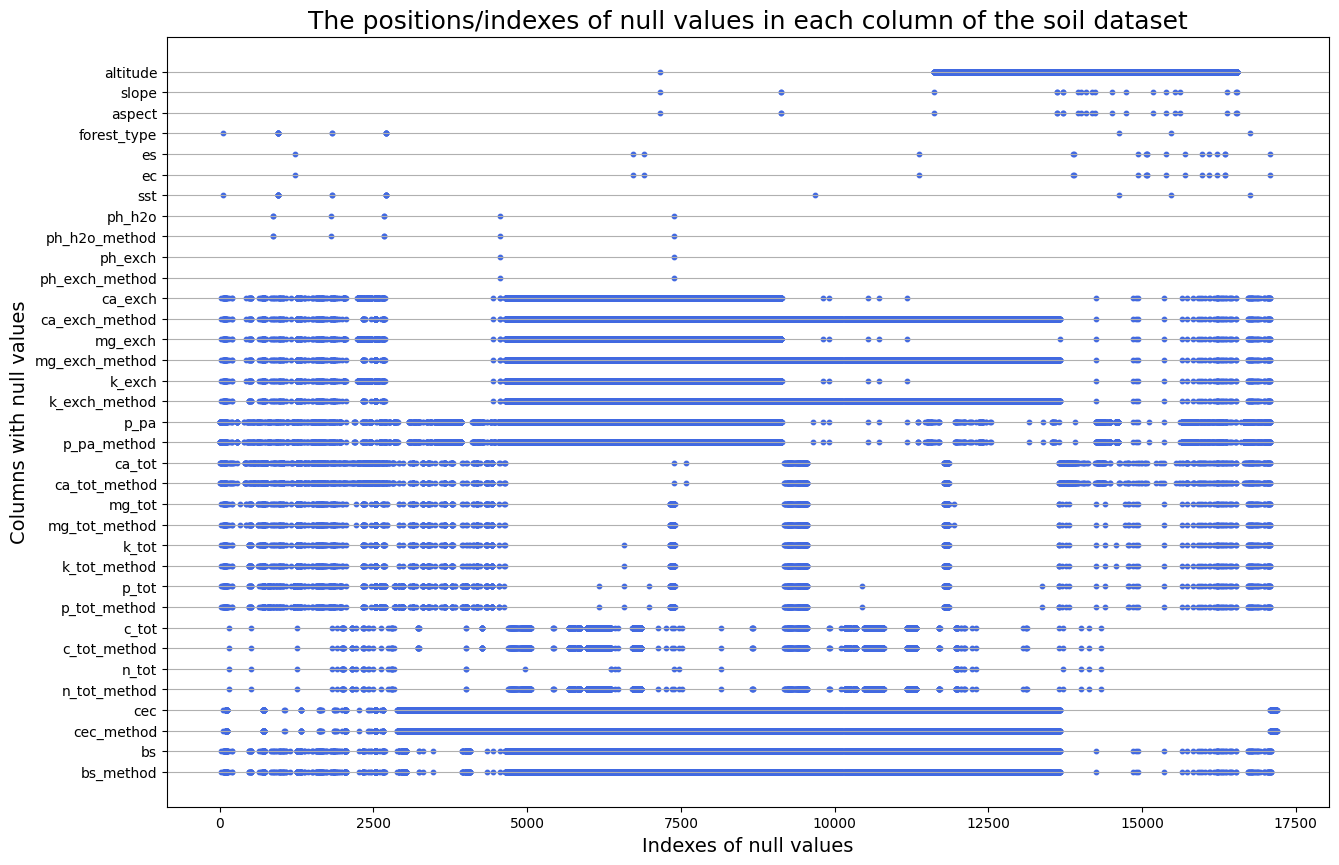

In [8]:
# Displaying the positions (rows/indexes) of null values in each column 
soil_null_cols = list(soil_null_check[soil_null_check['count of missing values'] > 0].index)

soil_null_indexes_dict = {}
for col in soil_null_cols[::-1]:
    soil_null_indexes_dict[col] = soil.loc[soil[col].isnull()].index.values.tolist()
    
fig, ax = plt.subplots(figsize = (15, 10))
i = 0
for col_with_nulls, null_indexes in soil_null_indexes_dict.items():
    ax.scatter(null_indexes, [i] * len(null_indexes), s = 10, c = ['royalblue'])
    i += 1
ax.grid(axis = "y", which = 'major')
ax.set_xlabel("Indexes of null values", fontdict = {'size': 14})
ax.set_ylabel("Columns with null values", fontdict = {'size': 14})
ax.set_yticks(ticks = range(len(soil_null_indexes_dict)))
ax.set_yticklabels(labels = list(soil_null_indexes_dict.keys()))
ax.set_title("The positions/indexes of null values in each column of the soil dataset", fontdict = {'size': 18})
plt.show()

As shown above, variables representing the exchangeable contents of calcium, magnesium, and potassium appear to have missing values almost at the same observations, and their measurement methods also have missing values at similar positions. Besides, in all the other chemical attributes except the total content of nitrogen, missing values tend to occur in pair with their corresponding measurement methods. Apart from that, some data values are also left unavailable in pair between 'slope' and 'aspect', between 'es' and 'ec', and between 'forest_type' and 'sst'.

As the first action taken to deal with missing values, all the records where data go missing in the 'forest_type' column will be removed. It is the target of prediction in this project, so the effort to imputie missing values in that column might distort the prediction outcomes produced later. Also, as absent data values in that column are present on 18 observations, which occupy only a small proportion of the entire dataset, it is safe to remove those records, considering the trade-off for positive gains in prediction results. Missing values in the other variables will further be handled at the stage of data preprocessing with various imputation techniques.

In [9]:
# Dropping records with missing values in the target variable 'forest_type'
soil = soil[soil['forest_type'].notna()]

##### 3. Removing redundant spaces in some string values

Scattered across the dataset, many string values have redundant leading and trailing whitespaces, which even generate data duplication in some columns, especially in those representing chemical measurement methods. For example, the 'p_pa_method' column has two distinct values 
" P_aa recalculation " and "P_aa recalculation" (one with redundant whitespaces and one without), or the 'ca_tot_method', 'mg_tot_method', 'k_tot_method', and 'p_tot_method' all have two distinct values " aqua regia extract " and "aqua regia extract". Therefore, data duplicates in this dataset will directly be tackled by trimming off redundant whitespaces in those string values.


In [10]:
# Checking redundant spaces in string values of some columns
for col in ['ph_h2o_method', 'ph_exch_method', 'ca_exch_method', 'mg_exch_method', 'k_exch_method', 'p_pa_method', 'ca_tot_method', 'mg_tot_method', 'k_tot_method', 'p_tot_method', 'c_tot_method', 'n_tot_method', 'cec_method', 'bs_method']:
    print(col)
    print(soil[col].unique())

ph_h2o_method
['Soil reaction in water suspension' nan
 ' Soil reaction in water suspension ']
ph_exch_method
['Soil reaction in KCl suspension' 'Soil reaction in CaCl2 suspension' nan]
ca_exch_method
['0.1M BaCl2 extract' nan 'extract of 1 % citric acid' '1M NH4Cl extract'
 ' 0.1M BaCl2 extract ']
mg_exch_method
['0.1M BaCl2 extract' nan 'extract of 1 % citric acid' '1M NH4Cl extract'
 ' 0.1M BaCl2 extract ']
k_exch_method
['0.1M BaCl2 extract' nan 'extract of 1 % citric acid' '1M NH4Cl extract'
 ' 0.1M BaCl2 extract ']
p_pa_method
[' P_aa recalculation ' nan 'extract by weak acids' 'Mehlich III extract'
 'P_aa recalculation']
ca_tot_method
['20% HCl extract' nan 'aqua regia extract' ' 2M HNO3 extract '
 ' aqua regia extract ']
mg_tot_method
['20% HCl extract' nan 'aqua regia extract' ' 2M HNO3 extract '
 ' aqua regia extract ']
k_tot_method
['20% HCl extract' nan 'aqua regia extract' ' 2M HNO3 extract '
 ' aqua regia extract ']
p_tot_method
['20% HCl extract' nan 'aqua regia extract'

In [11]:
# Stripping redundant white space in string values
soil = soil.applymap(lambda value: value.strip() if type(value) == str else value)

##### 4. Extracting more information from the column of SST formulas

The 'sst' variable provides information about the plant-species compositions or the vegetation structures existing in a sampling site where a soil unit was taken. If this column is treated as a categorical feature, then the dataset will be made extremely sparse when being processed into machine learning models as they contain 1098 unique values, and only little information can be obtained from it. Thus, this variable will receive closer attention in the data cleaning stage. 

More specifically, each value in the 'sst' column contains a formula that demonstrate the vegetation types, each of which is preceded by a letter indicating their corresponding proportion of existence in a soil sampling site. There are a total of 18 different vegetation types, denoted as "0", "1", "1e", "2", "2e", "3", "3e", "4", "4k", "5", "5e", "6", "7", "7e", "8", "9", "9e", and "9x", while five letters are used to indicate their distribution percentages in a soil sampling site, "C" stands for 91%-100%, "D" for 71%-90%, "M" for 51%-70%, "Z" for 31%-50%, and "P" for 11%-30% (Macků 2001, pp. 69-70). Taking the first record as an example, the value in the 'sst' column is "Z5Z6P9x", which means the vegetation types 5 and 6 each occupy 31%-50% of the soil sampling site, and the vegetation type 9x takes place in 11%-30% of it, while the other vegetation types are not found there.

To facilitate the analyses and the construction of prediction models, a new column is created for each vegetation type, and the column names are formatted as 'veg_#' where # is a vegetation type index, such as 'veg_0', 'veg_1', 'veg_1e' and so on. Each cell in these columns will hold an approximate average of the distribution proportion of the corresponding vegetation type for an observation. To illustrate, for the first observation with the SST formula "Z5Z6P9x", the columns 'veg_5' and 'veg_6' will both hold the value of 0.4 (The letter Z denotes 31%-50%, so the average is calculated to be roughly 40%), the column 'veg_9x' will hold the value of 0.2, and all the other 'veg#' columns hold the value of 0. However, because each sampling site experiences only few vegetation types, the 'veg_#' columns will contain a lot of cells with zeros, which makes the variance of those features comparatively low. This problem will be explained and addressed in the data preprocessing stage.


In [12]:
import re

# Using regular expressions to prepare for decomposing SST formulas
rx = re.compile(r'([A-Z])(\d*[a-z]*)')

# Extracting the unique vegetation types from the SSt formulas
sst_veg_type_unique = []
for sst_value in soil['sst']:
    if sst_value is not np.NaN:
        for percentage_key, veg_type in rx.findall(sst_value):
            if veg_type not in sst_veg_type_unique:
                sst_veg_type_unique.append(veg_type)

In [13]:
# Initialising columns corresponding to each of the vegetation types
for veg_type in sorted(sst_veg_type_unique):
    soil['veg_' + veg_type] = None

# Defining a function to decompose SST formulas into components
def decompose_sst(sst_formula):
    if sst_formula is not np.nan:
        sst_decomposed_dict = {}
        for percentage_key, veg_type in rx.findall(sst_formula):
            sst_decomposed_dict[veg_type] = percentage_key
        return sst_decomposed_dict
    else:
        return np.nan

# Adding a new column representing the decomposed SST formula
soil['sst_decomposed'] = soil['sst'].apply(lambda sst_value: decompose_sst(sst_value))

In [14]:
# Defining a function to pass the corresponding percentage to each vegetation type
def match_veg_type_with_percentage(veg_type, sst_decomposed_dict):
    if sst_decomposed_dict is not np.nan:
        for veg_type_key, percentage_key in sst_decomposed_dict.items():
            if veg_type == veg_type_key:
                if percentage_key == "C":
                    return 0.95
                elif percentage_key == "D":
                    return 0.8
                elif percentage_key == "M":
                    return 0.6
                elif percentage_key == "Z":
                    return 0.4
                elif percentage_key == "P":
                    return 0.2
            else: # If a vegetation type is not present in a SST formula, return 0
                return 0.0
    else:
        return 0.0

# Adding percentage values to vegetation types in the corresponding columns
for veg_type in sst_veg_type_unique:
    column_to_modify = 'veg_' + str(veg_type)
    soil[column_to_modify] = soil['sst_decomposed'].apply(
        lambda sst_decomposed_value: match_veg_type_with_percentage(veg_type, sst_decomposed_value))
    

In [15]:
# Dropping the original SST column and the decomposed SST column
soil.drop(columns = ['sst', 'sst_decomposed'], axis = 1, inplace = True)

##### 5. Making the values in categorical variables neater by encoding them to numerical values and changing their data type to 'category'

The next data cleaning step is to convert values in categorical predictors, excluding the 'sst' column, from strings of charaters to numerical values starting from zero. This numerical encoding is meant to be performed on predictor variables only, not the target variable 'forest_type'. Although characters representing classes in categorical features have been encoded to numerical values, this is not meant to be a data preprocessing step. Rather, it is just to make the values in those variables neater by having elongated strings of characters replaced by whole numbers. The order of numerical values used to encode the features do not matter because they contain nominal categories without any natural order and those columns will further be encoded in a preprocessing step later. Subsequently, those categorical variables will be cast to 'category' data type for consistency and memory-saving purposes. 

In [16]:
# Extracting quantitative and categorical predictors for the task
soil_categorical_predictors = list(soil.select_dtypes('object').drop('forest_type', axis = 1).columns) + ['fvz']
soil_quantitative_predictors = list(soil.select_dtypes(['int64', 'float64']).drop('fvz', axis = 1).columns)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Using Label Encoder to clean values in the categorical predictors
for predictor in soil_categorical_predictors:
    soil_label_encoder = LabelEncoder()
    soil[predictor] = np.where(~soil[predictor].isna(),
                               soil_label_encoder.fit_transform(soil[predictor]), 
                               np.NaN) # Keeping missing values as np.NaN
    soil[predictor] = soil[predictor].astype('Int64') # Avoiding unnecessary floats caused by missing vales (if any)

In [18]:
# Changing categorical variables to the dtype 'category'
for predictor in (['forest_type'] + soil_categorical_predictors):
    soil[predictor] = soil[predictor].astype('category')

In [19]:
# Moving the 'forest_type' column to the leftmost position for easy reference
soil = soil[['forest_type'] + [col for col in list(soil.columns) if col != 'forest_type']]

In [20]:
# Displaying some information about the dataset after being cleaned
soil.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17169 entries, 0 to 17186
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   forest_type     17169 non-null  category
 1   layer           17169 non-null  category
 2   long            17169 non-null  float64 
 3   lat             17169 non-null  float64 
 4   altitude        12238 non-null  float64 
 5   slope           17147 non-null  float64 
 6   aspect          17147 non-null  float64 
 7   aver_temp       17169 non-null  float64 
 8   annul_prec      17169 non-null  float64 
 9   fvz             17169 non-null  category
 10  es              17151 non-null  category
 11  ec              17151 non-null  category
 12  gsc             17169 non-null  category
 13  ph_h2o          17162 non-null  float64 
 14  ph_h2o_method   17162 non-null  category
 15  ph_exch         17167 non-null  float64 
 16  ph_exch_method  17167 non-null  category
 17  ca_exch         1

## =======================

# C. Data splitting

To adhere to the standard machine learning workflow, the dataset is divided into two parts, called training data and testing data, under a ratio of 80:20. To be more precise, 80% of all observations (13735 records) constitute the so-called training dataset, which will be used for all processes relating to training prediction models. Meanwhile, the testing dataset, which will be held out to objectively evaluate a chosen classifier, is composed of the remaining 20% of observations (3434 records) in the original dataset. To emphasise, simulating the data that comes from the future or has not been encountered before, the testing dataset will be kept completely independent of any model-training procedures, from exploratory analysis and data preprocessing to hyperparameter tuning and model selection. It will only be used to conduct evaluation after an optimal classifier is built and selected.

In [21]:
from sklearn.model_selection import train_test_split

# Data splitting with a 80:20 ratio
soil_train, soil_test = train_test_split(
    soil, train_size = 0.80, 
    random_state = 2408, 
    stratify = soil.forest_type)

In [22]:
# Specifying the response variable and the predictor variables in each set
soil_y_train = soil_train.forest_type
soil_X_train = soil_train.drop('forest_type', axis = 1)

soil_y_test = soil_test.forest_type
soil_X_test = soil_test.drop('forest_type', axis = 1)

# Displaying the training dataset with predictor variables 
soil_X_train

layer   long    lat  altitude  slope  aspect  aver_temp  annul_prec fvz   
11844     1 50.230 16.470       NaN 10.830 248.040      4.300     799.570   6  \
3351      1 50.870 15.250   641.000 30.610 237.560      5.720     716.970   5   
13103     1 49.280 16.510       NaN  5.860  34.520      8.080     576.470   2   
298       1 49.050 14.540   514.000  4.270 229.000      7.570     750.210   3   
376       1 49.100 13.450   882.000 10.720  46.400      5.390    1032.370   5   
...     ...    ...    ...       ...    ...     ...        ...         ...  ..   
2015      0 50.420 13.250   397.000  0.830 145.610      6.970     619.250   1   
8177      0 49.890 17.190   592.000 28.720 226.590      6.340     710.910   3   
14737     1 49.610 12.930       NaN  7.840 304.290      7.060     662.620   2   
12542     1 49.880 18.160       NaN  9.430  34.080      8.130     621.550   2   
10440     1 48.710 14.110   731.000  0.970 242.650      6.270     933.990   5   

      es  ec gsc  ph_h2o ph_h2o_method  ph_exch ph_exch_method  ca_exch   
11844  5  20  11   3.600             0    2.800              0  219.450  \
3351   6  23  11   4.560             0    3.930              1   17.570   
13103  0  17   9   5.180             0    4.270              0  548.310   
298    0  17   5   4.950             0    3.710              1 1523.320   
376    3  12   5   4.620             0    4.070              1  194.970   
...   ..  ..  ..     ...           ...      ...            ...      ...   
2015   6  24   0   6.480             0    6.220              1 9161.830   
8177   0  17   5   3.900             0    3.200              0      NaN   
14737  4  14  10   4.920             0    3.700              1  436.180   
12542  0   1   5   4.390             0    3.790              0  122.350   
10440  0  17   3   4.540             0    3.930              0   76.420   

      ca_exch_method  mg_exch mg_exch_method  k_exch k_exch_method   p_pa   
11844            NaN   94.370            NaN  65.470           NaN  7.820  \
3351               1    8.070              1  19.100             1  1.620   
13103            NaN   40.520            NaN 101.670           NaN 13.650   
298                0  238.900              0 163.570             0  7.560   
376                2   51.630              2  70.890             2  3.120   
...              ...      ...            ...     ...           ...    ...   
2015               0  921.200              0 883.610             0 82.050   
8177             NaN      NaN            NaN     NaN           NaN    NaN   
14737              0  121.030              0 101.890             0  2.590   
12542            NaN    5.000            NaN  47.120           NaN  9.180   
10440            NaN    5.000            NaN  31.790           NaN  3.430   

      p_pa_method    ca_tot ca_tot_method   mg_tot mg_tot_method    k_tot   
11844           0       NaN           NaN      NaN           NaN      NaN  \
3351            2   168.550             2 1862.550             2  877.910   
13103           0   710.190             1  805.820             1  112.570   
298             1  2022.160             0 8804.910             0 6087.240   
376             1   493.140             0 7616.850             0 4706.390   
...           ...       ...           ...      ...           ...      ...   
2015            1 18582.030             0 9227.070             0 5062.120   
8177          NaN  1820.000             1  542.180             1 1174.660   
14737           1  1986.850             0 3324.960             0 1643.110   
12542           0    92.570             1  468.850             1    5.000   
10440           0    57.890             1  841.170             1   80.050   

      k_tot_method    p_tot p_tot_method  c_tot c_tot_method  n_tot   
11844          NaN      NaN          NaN 11.410            0  0.490  \
3351             2  206.300            2  4.210            2  0.230   
13103            1  167.080            1  2.190            0  0.160  

## =======================

# D. Exploratory data analysis

After the data gets cleansed, exploratory analysis will be performed with several visualisations to gain some initial insights about the dataset. According to Géron (2022, p.60), exploratory analysis should not involve the testing data, so it will be based on the training data only. The visualisations produced at the stage of exploratory analysis will support in making some general inferences about individual variables and their inter-relationships.

#### 1. Inspecting the target variable 'forest_type'

The pie chart below shows that there is a significant class imbalance in the training dataset as the 'Coniferous' class clearly outnumbers the other two. This imbalance could be inferred onto the testing data as well because the data splitting was stratified by the 'forest_type' variable.

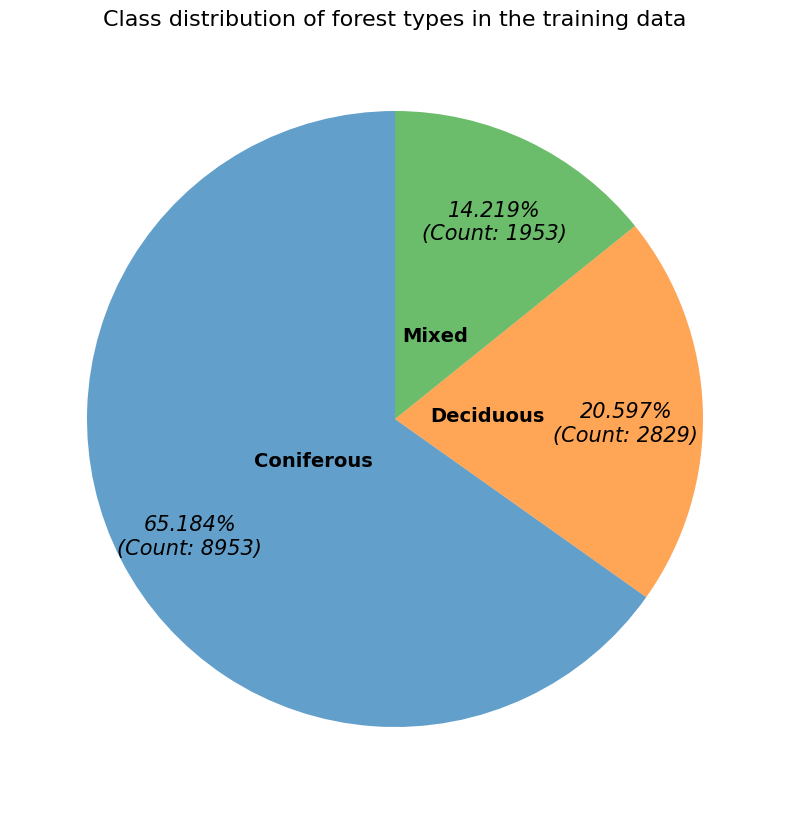

In [23]:
# Using a pie chart that to depict class distribution in the target variable
def get_autopct(unique_count):
    def autopct_calc(pct):
        total_count = sum(unique_count)
        val = int(round(pct * total_count/100.0))
        return '\n{p:.3f}%\n(Count: {v:d})'.format(p = pct, v = val)
    return autopct_calc

plt.figure(figsize = (10,10))
patches, texts, autotexts = plt.pie(
    x = soil_train['forest_type'].value_counts().values, 
    labels = soil_train['forest_type'].value_counts().index,
    autopct = get_autopct(soil_train['forest_type'].value_counts().values),
    startangle = 90, labeldistance = 0.3, pctdistance = 0.75,
    wedgeprops = {"alpha": 0.7})

# Customising the class labels
for text in texts:
    text.set_horizontalalignment('center')
    text.set_fontweight('bold')
    text.set_fontsize(14)

# Customising the percentage labels
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_fontstyle('italic')
    autotext.set_fontsize(15)

plt.title(label = "Class distribution of forest types in the training data", fontdict = {"fontsize": 16})
plt.show()

#### 2. Inspecting the value distribution in each quantitative feature 

The set of histograms below show the value distribution of each quantitative feature in the training dataset. The 'long', 'lat', 'n_tot', 'bs' features have a multimodal distribution, whereas the 'aspect' feature has a uniform distribution (equal spread and no clear peaks). Meanwhile, the distribution of the 'aver_temp' feature is left-skewed, and the distribution of all the other numerical features are right-skewed.

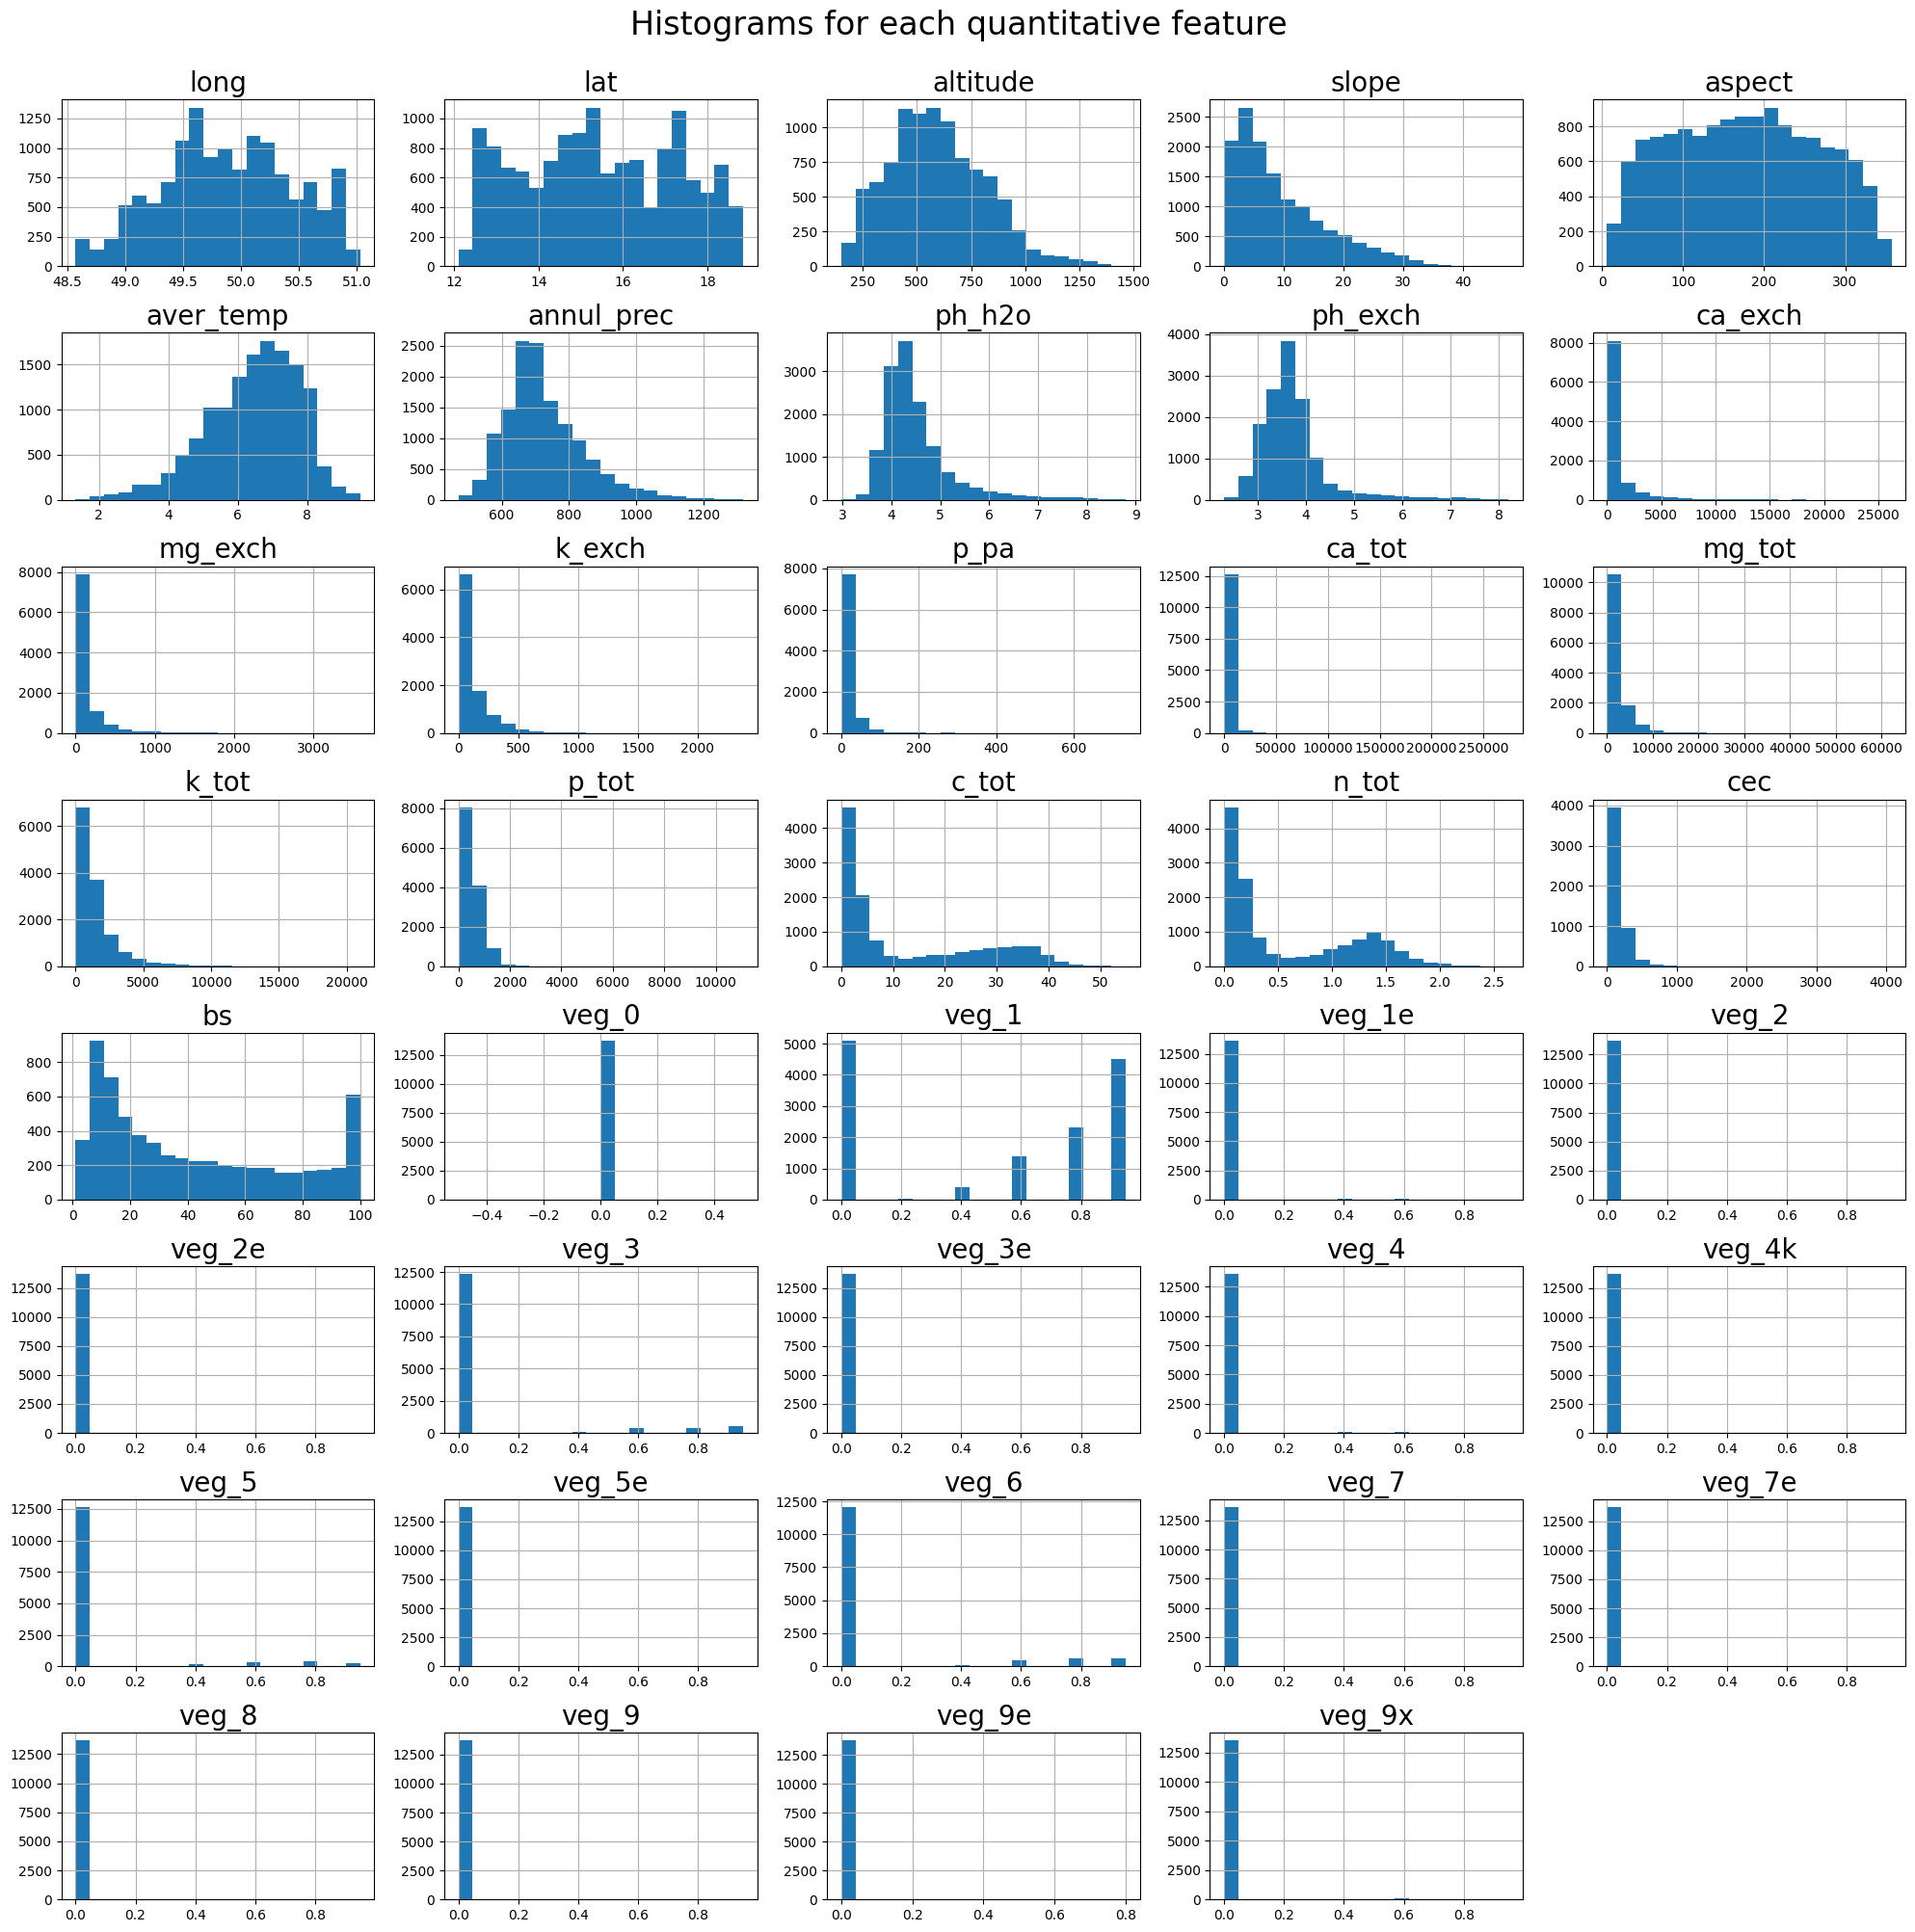

In [24]:
# Showing a histogram for each quantitative feature
soil_hist = soil_train.hist(layout = (8,5), bins = 20, figsize = (20,20))
for x in soil_hist.ravel():
    x.title.set_size(20) 
plt.suptitle("Histograms for each quantitative feature", fontsize = 24, y = 1)
plt.tight_layout()
plt.show()

#### 3. Inspecting the class distribution in each categorical feature

It can be seen below that some categorical features have a certain number of infrequent classes (which are the categories that occur infrequently in the dataset), such as 'fvz', 'es', 'ec', and 'gsc'.

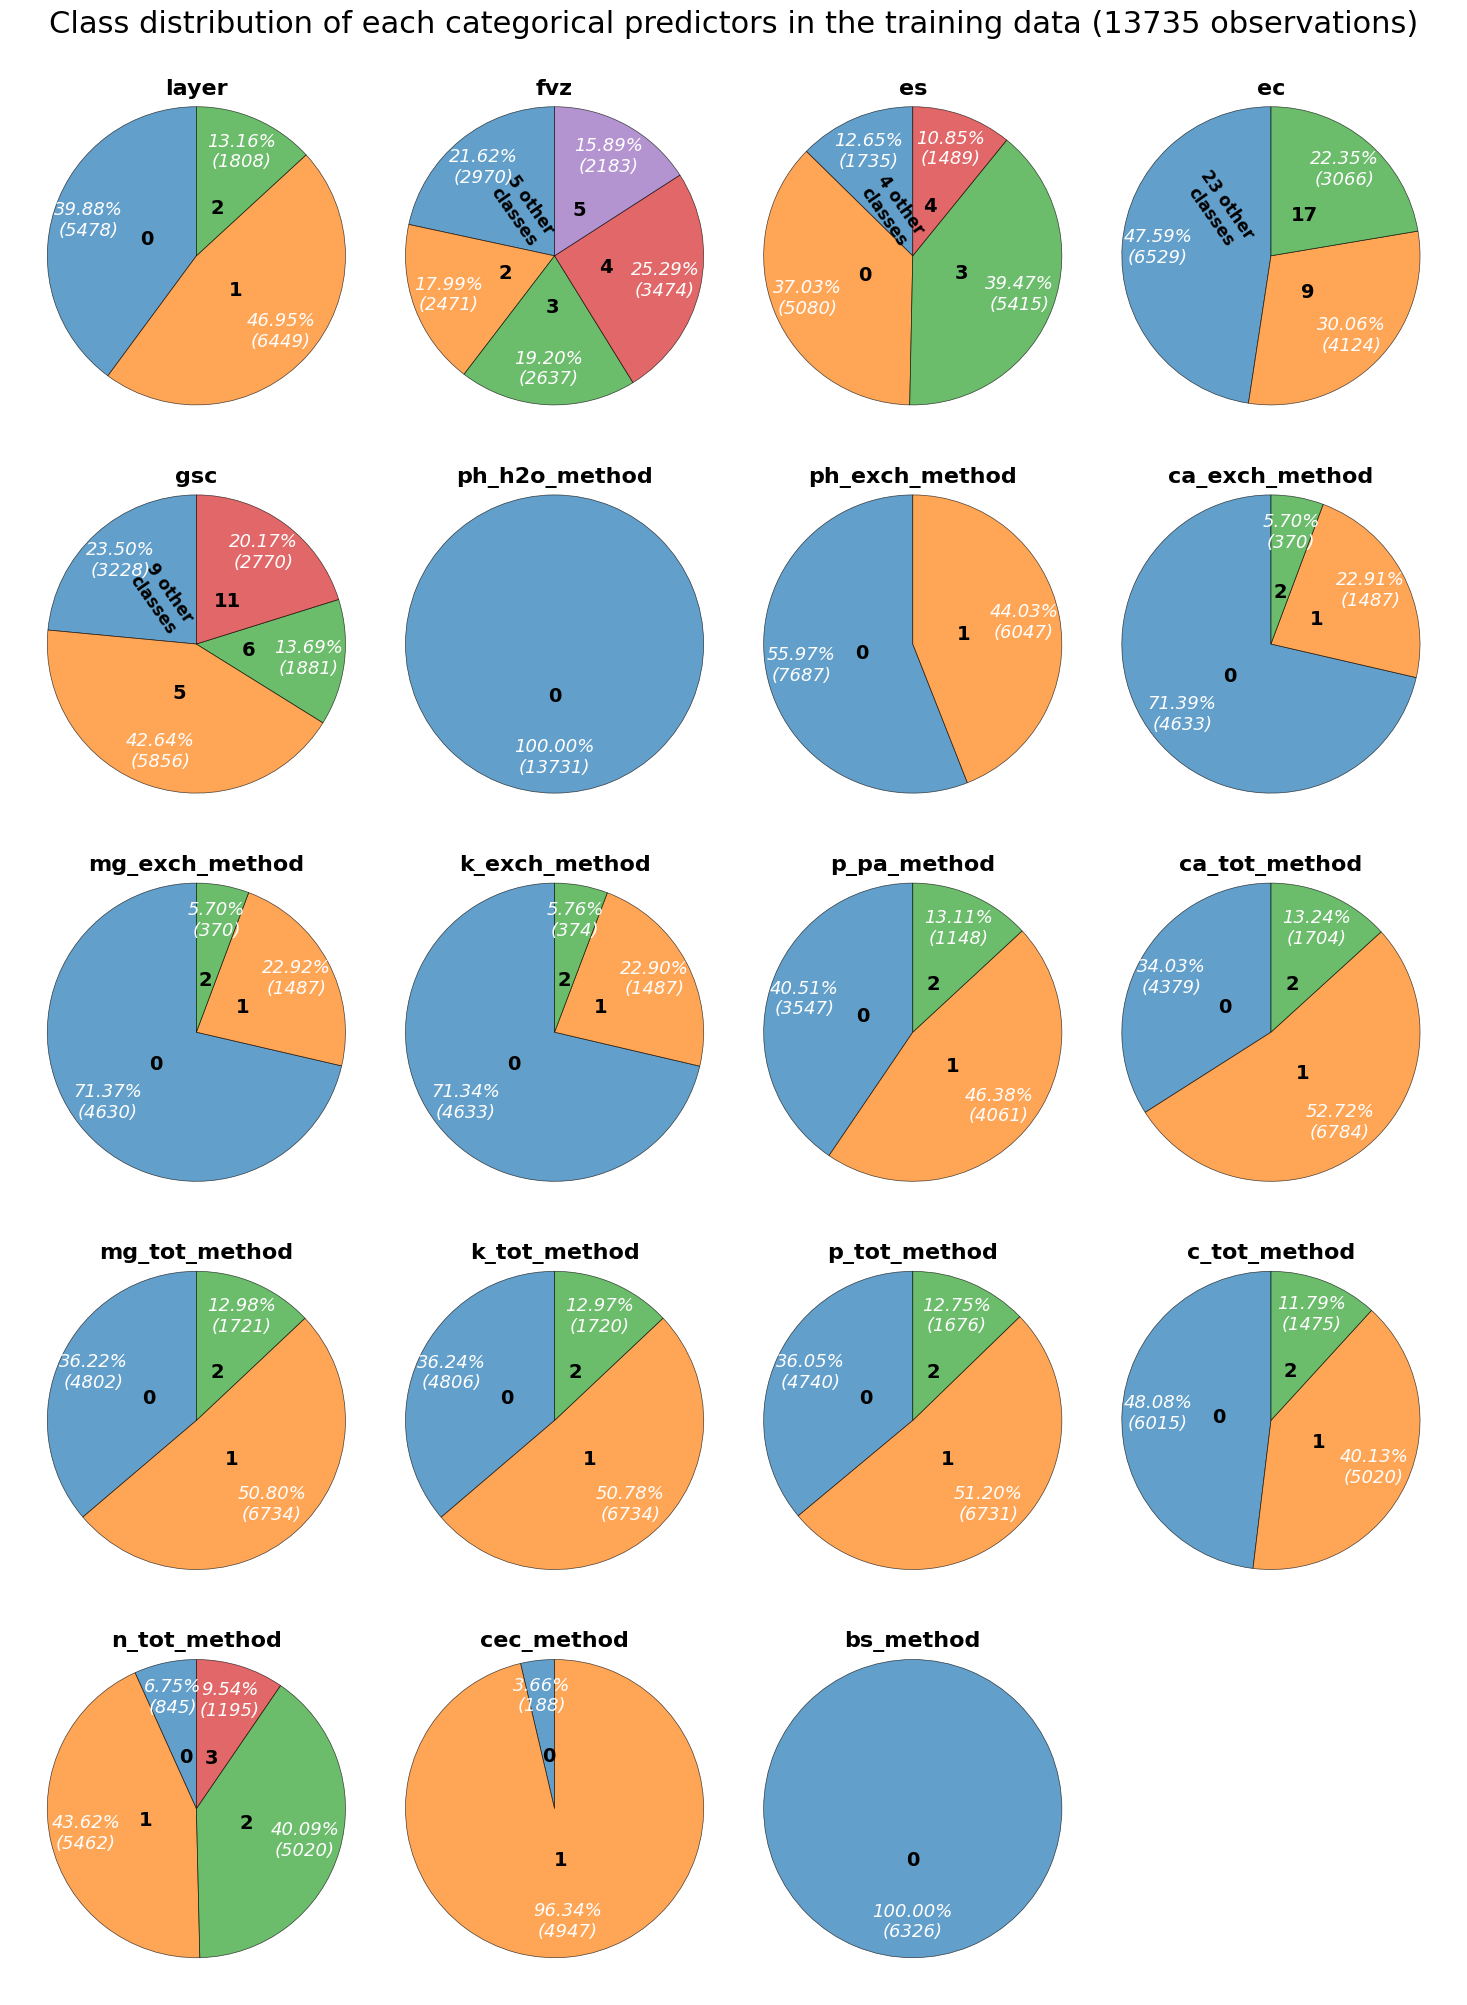

In [25]:
from matplotlib.pyplot import subplot2grid

# Function to customise percentage labels in pie charts
def make_autopct(unique_count):
    def my_autopct(pct):
        total_count = sum(unique_count)
        val = int(round(pct * total_count/100.0))
        pct_return = '{p:.2f}%\n({v:d})'.format(p = pct, v = val)
        return pct_return
    return my_autopct

categorical_predictors_list = [col for col in soil_train.select_dtypes(['category']).columns if col != 'forest_type']
categorical_predictor_index = 0
plt.figure(figsize = (20,20))

for fig_row_index in range(0,5):
    for fig_col_index in range(0,4):
        if categorical_predictor_index == len(categorical_predictors_list):
            break

        categorical_col = categorical_predictors_list[categorical_predictor_index]
        groupby_count = pd.DataFrame({'Class': soil_train.groupby(categorical_col).size().index,
                                      'Count': soil_train.groupby(categorical_col).size().values})
        if len(groupby_count) >= 5:
            groupby_count['infreq_lump'] = groupby_count['Count'].apply(
                lambda count_value: True if count_value <= (0.1 * groupby_count['Count'].sum()) else False)
            
            infreq_class_df = pd.DataFrame({'Class': [str(len(groupby_count[groupby_count['infreq_lump'] == True])) + " other\nclasses"], 
                                            'Count': [groupby_count[groupby_count['infreq_lump'] == True]['Count'].sum()]})

            groupby_count = pd.concat([infreq_class_df, groupby_count[groupby_count['infreq_lump'] == False]])

        ax = plt.subplot2grid((5,4), (fig_row_index, fig_col_index))
        patches, texts, autotexts = plt.pie(
            x = groupby_count['Count'].values, 
            labels = groupby_count['Class'],
            autopct = make_autopct(groupby_count['Count']),
            startangle = 90, labeldistance = 0.35, pctdistance = 0.76)
        
        for wedge in patches:
            wedge.set_linewidth(0.5)
            wedge.set_edgecolor('black')
            wedge.set_alpha(0.7)

        # Customize class labels (bold, black)
        for text in texts:
            text.set_horizontalalignment('center')
            text.set_fontweight('bold')
            if len(text.get_text()) > 5: # Rotated if for collapsed classes
                text.set_rotation(-55)
                text.set_y(0.3)
                text.set_fontsize(12)
            else:
                text.set_fontsize(14)

        # Customize percentage labels (italic, white)
        for autotext in autotexts:
            autotext.set_horizontalalignment('center')
            autotext.set_fontstyle('italic')
            autotext.set_color('white')
            autotext.set_fontsize(13)

        plt.title(label = categorical_col, fontdict = {"fontsize": 16, "fontweight": "bold"}, y = 0.91)
        categorical_predictor_index += 1

plt.suptitle(t = "Class distribution of each categorical predictors in the training data (" + str(len(soil_train)) + " observations)", 
             fontsize = 22, y = 1)
plt.tight_layout()
plt.subplots_adjust(wspace = -0.6)
plt.show()

#### 4. Inspecting the association between the target variable 'forest_type' and each quantitative feature

The side-by-side box plots below help visualise how the values of each quantitative feature are distributed in each forest type. 'veg_1' appears to have the most discriminative effect on the three classes of 'forest_type' as its corresponding box plots show the least amount of overlapping.

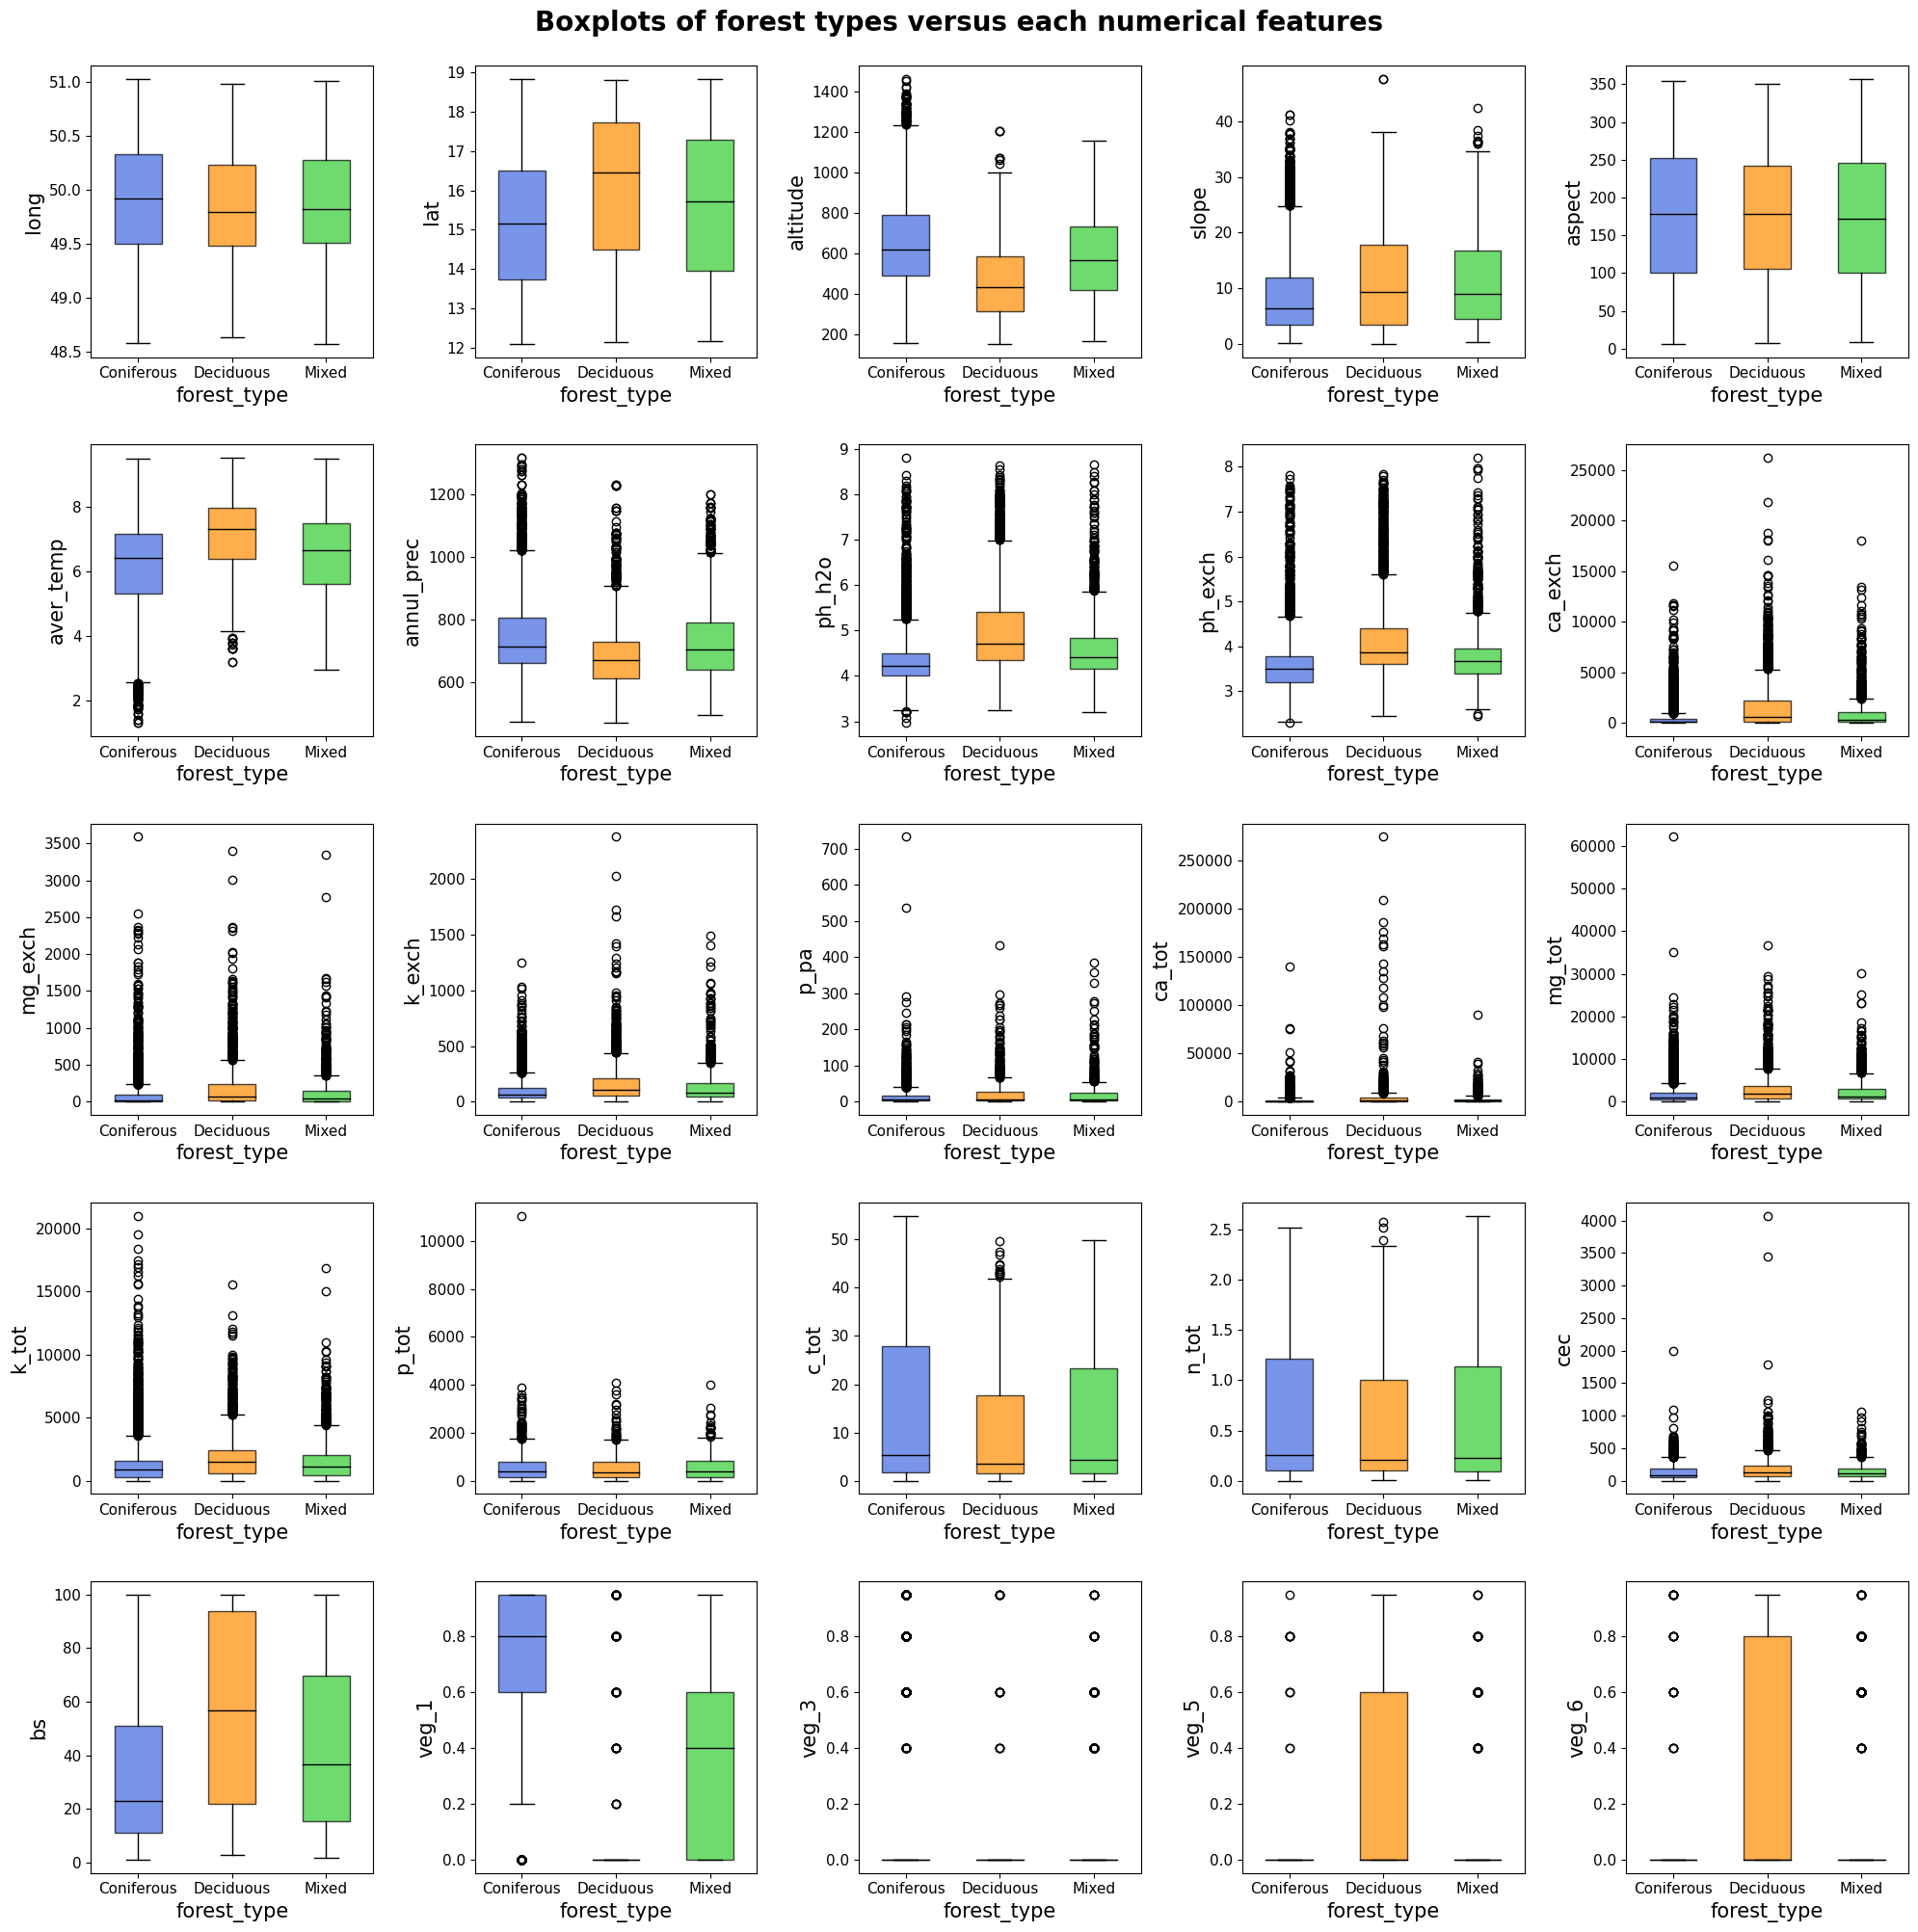

In [26]:
soil_nemric_predictors_to_plot = [
    col_name for col_name in soil_train.select_dtypes(['float64', 'int64']).columns 
    if col_name not in ['veg_0', 'veg_1e', 'veg_2', 'veg_2e', 'veg_3e', 'veg_4', 'veg_4k', 'veg_5e', 'veg_7', 'veg_7e', 'veg_8', 'veg_9', 'veg_9e', 'veg_9x']]

numeric_predictor_index = 0
plt.figure(figsize = (20,20))

for fig_row_index in range(0,5):
    for fig_col_index in range(0,5):
        current_col = soil_nemric_predictors_to_plot[numeric_predictor_index]
        
        each_forest_type_value = {}
        for forest_type_class in soil_train['forest_type'].unique():
            each_forest_type_value[forest_type_class] = np.array(
                [val for val in soil_train[soil_train['forest_type'] == forest_type_class][current_col].values if not np.isnan(val)])
        
        ax = plt.subplot2grid((5,5), (fig_row_index, fig_col_index))

        # Creating plot
        box_plot = ax.boxplot(x = list(each_forest_type_value.values()), 
                              labels = list(each_forest_type_value.keys()), widths = 0.5,
                              patch_artist = True, medianprops = dict(color = 'black'))
        ax.set_ylabel(current_col)
        ax.set_xlabel('forest_type')

        colors = ['royalblue', 'darkorange', 'limegreen']
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)

        ax.set_ylabel(current_col, fontsize = 15)
        ax.set_xlabel("forest_type", fontsize = 15)
        ax.tick_params(axis = 'both', labelsize = 11)
        
        numeric_predictor_index += 1

plt.suptitle(t = "Boxplots of forest types versus each numerical features", size = 20, weight = "bold", y = 1)        
plt.tight_layout()
plt.subplots_adjust(hspace = 0.3, wspace = 0.36)
plt.show()

#### 5. Inspecting the association between the target variable 'forest_type' and each categorical feature

The association between 'forest_type' and each categorical feature can be visualised with stacked percentage bar charts. From the charts below, it is difficult to tell if any categorical feature graphically show a strong association with 'forest_type', provided that the class 'Coniferous' outnumbers the other forest types.

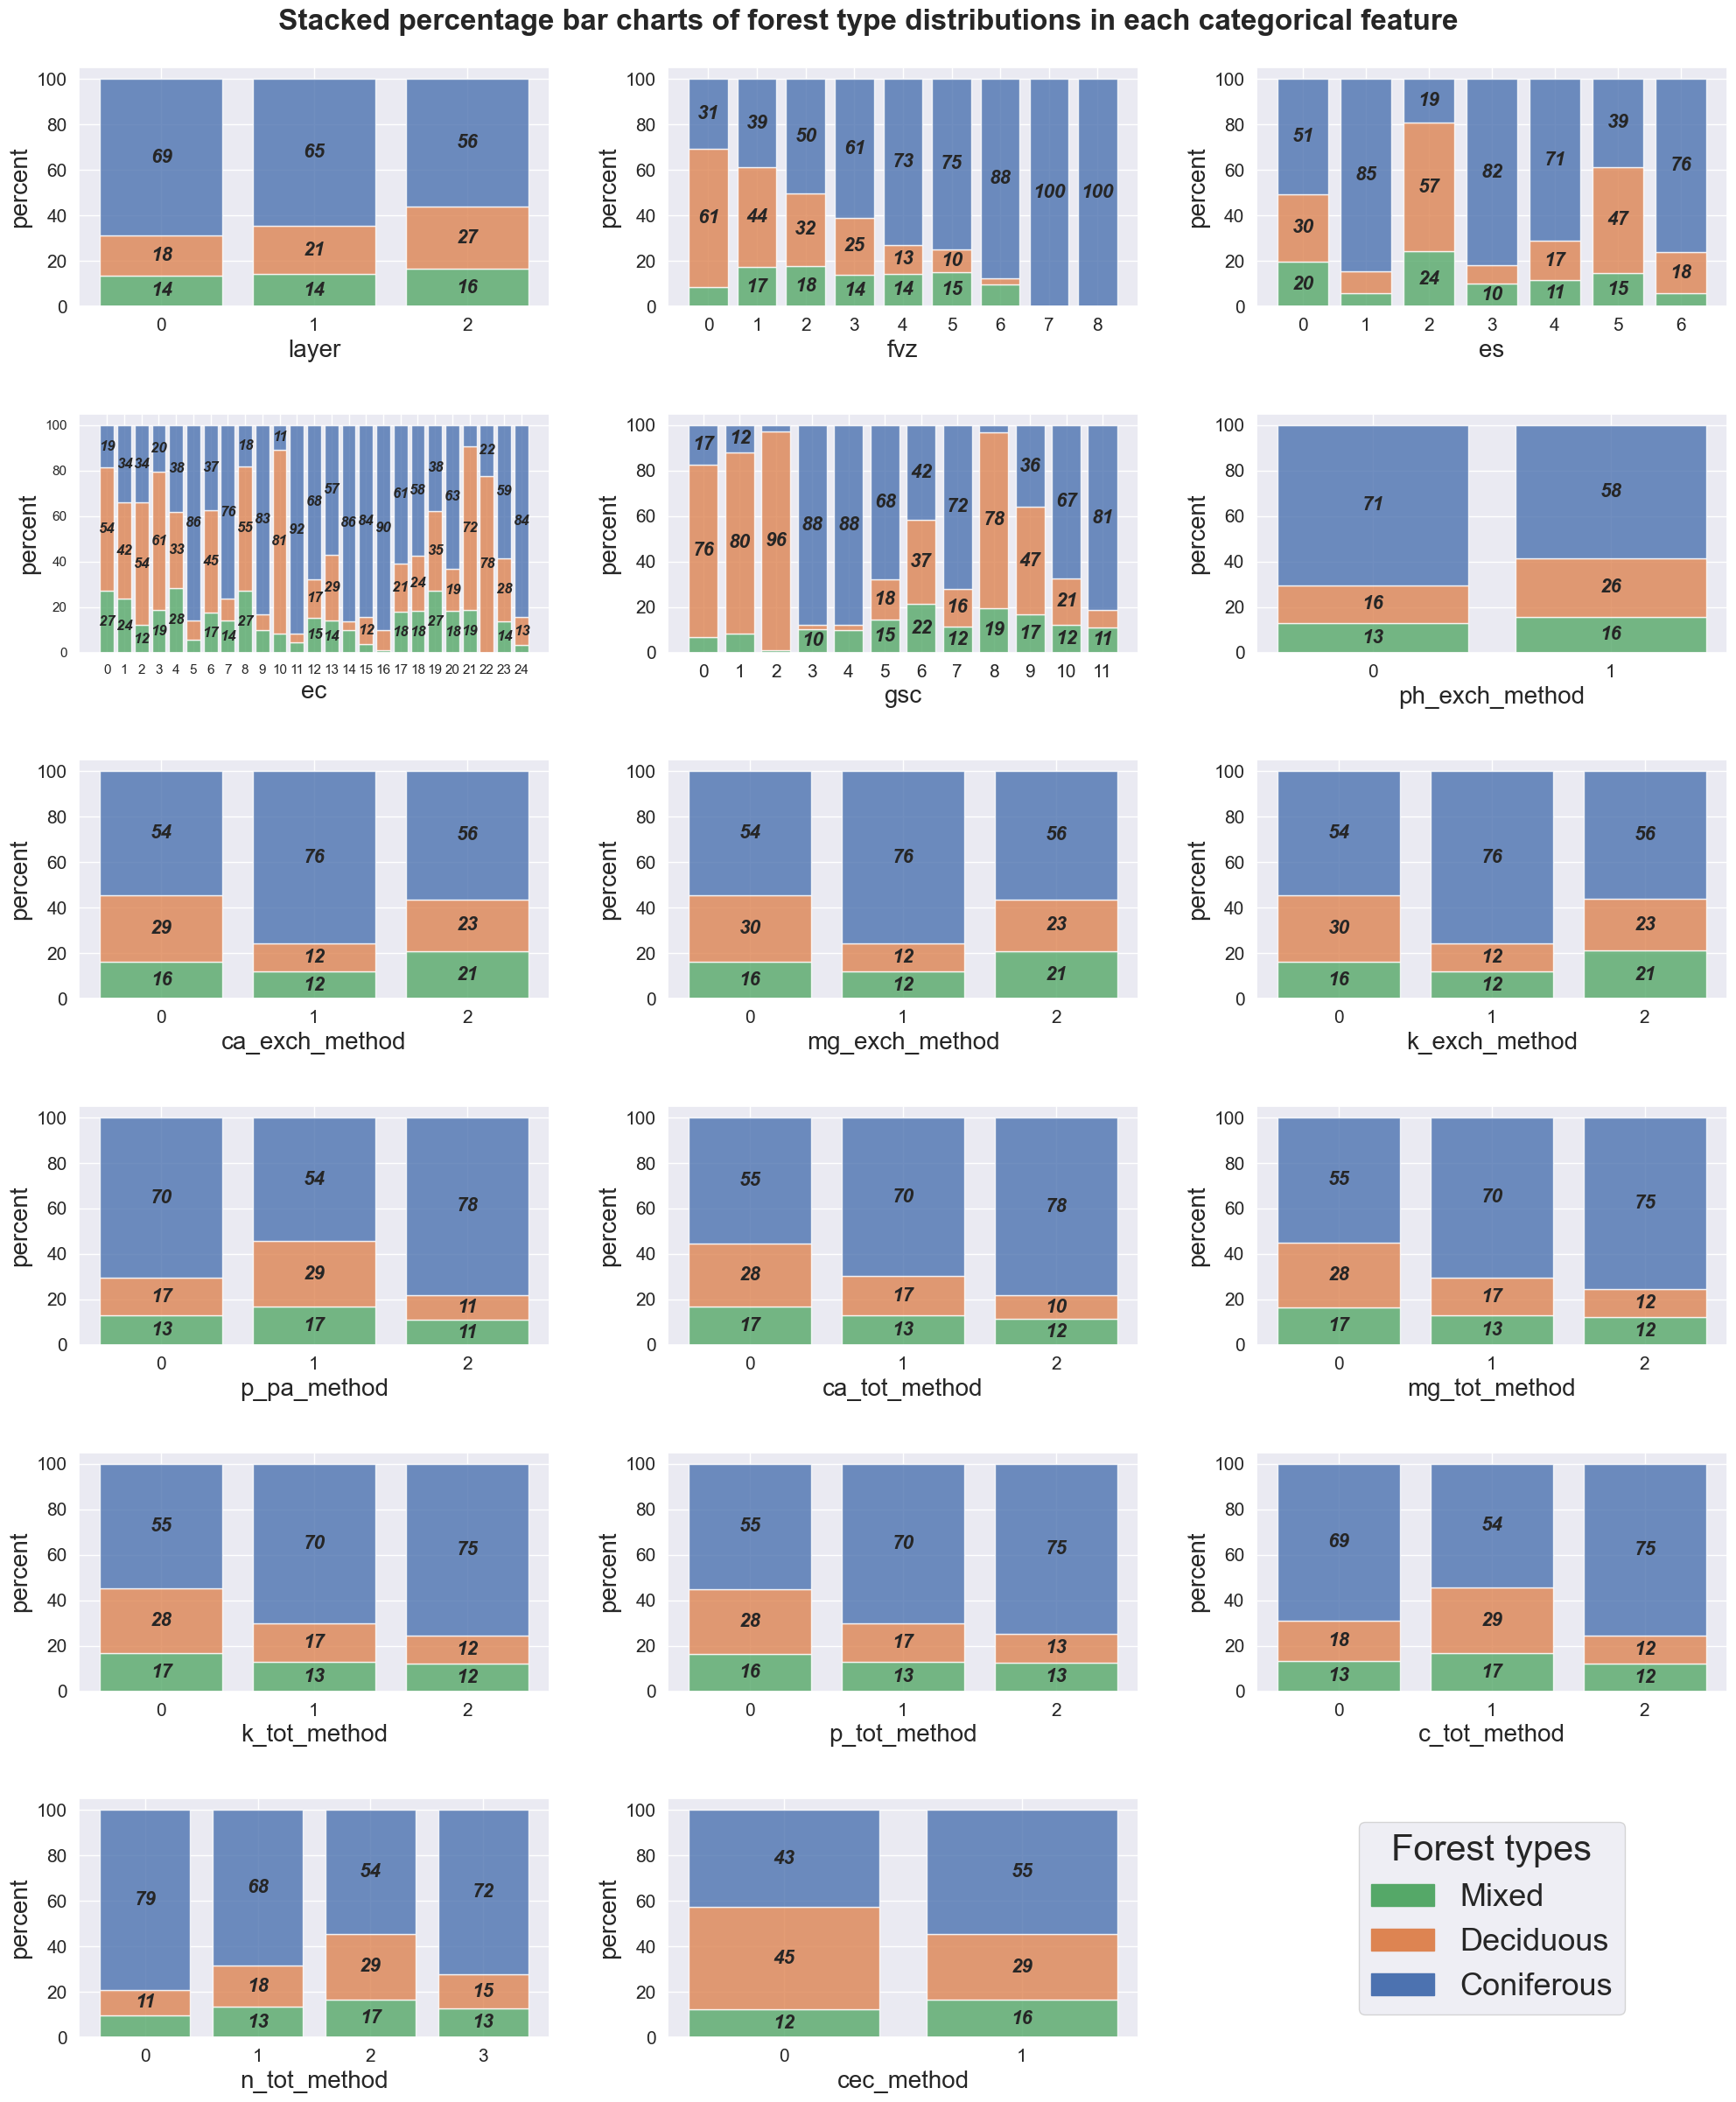

In [ ]:
import matplotlib.patches as mpatches

# Excluding feature with constant values
soil_categorical_predictors_to_plot = [
    col_name for col_name in soil_train.select_dtypes(['category']).columns 
    if col_name not in ['forest_type', 'ph_h2o_method', 'bs_method']]

unique_forest_type_count = len(soil_train['forest_type'].unique())
categorical_feature_index = 0
plt.figure(figsize = (20,24))

for fig_row_index in range(0,6):
    for fig_col_index in range(0,3):
        if categorical_feature_index == len(soil_categorical_predictors_to_plot):
            ax = plt.subplot2grid((6,3), (fig_row_index, fig_col_index))
            colors_to_use = plt.rcParams['axes.prop_cycle'].by_key()['color'][::-1][-unique_forest_type_count:]

            forest_type_legend_colors = []
            for forest_type_i in range(unique_forest_type_count):
                forest_type_legend_colors.append(
                    mpatches.Patch(
                        color = colors_to_use[forest_type_i], 
                        label = soil_train['forest_type'].unique()[::-1][forest_type_i]))
            ax.axis('off')
            ax.legend(handles = forest_type_legend_colors, title = "Forest types", 
                      fontsize = 26, title_fontsize = 30, loc = 'center')

        else:
            current_col = soil_categorical_predictors_to_plot[categorical_feature_index]
            pair_crosstab = pd.crosstab(soil_train[current_col], soil_train['forest_type'])
            pair_crosstab_pct_row_wise = pair_crosstab[pair_crosstab.columns[::-1]].div(pair_crosstab.sum(axis = 1), axis = 0).mul(100)
            
            colors_to_use = plt.rcParams['axes.prop_cycle'].by_key()['color'][::-1][-unique_forest_type_count:]
            class_color_index = 0
            bottom_param = np.zeros(len(pair_crosstab_pct_row_wise.index))
            ax = plt.subplot2grid((6,3), (fig_row_index, fig_col_index))

            for class_name, pct_list in pair_crosstab_pct_row_wise.to_dict(orient = 'list').items():
                ax.bar(
                    x = [str(val) for val in pair_crosstab_pct_row_wise.index], 
                    height = pct_list, bottom = bottom_param, label = class_name, 
                    color = colors_to_use[class_color_index], alpha = 0.8)
                class_color_index += 1
                bottom_param += pct_list

            # formating the data labels
            for c in ax.containers:
                pct_labels = [round(v.get_height()) if v.get_height() > 10 else '' for v in c]
                if len(pair_crosstab_pct_row_wise.index) <= 15:
                    ax.bar_label(c, labels = pct_labels, label_type = 'center', weight = "bold", style = "italic", size = 16)
                else:
                    ax.bar_label(c, labels = pct_labels, label_type = 'center', weight = "bold", style = "italic")

            ax.set_ylabel("percent", fontsize = 20)
            ax.set_xlabel(current_col, fontsize = 20)
            ax.tick_params(axis = 'both', labelsize = 15 if len(soil_train[current_col].unique()) < 15 else 11)
            categorical_feature_index += 1 

plt.suptitle(t = "Stacked percentage bar charts of forest type distributions in each categorical feature", size = 24, weight = "bold", y = 1) 
plt.tight_layout()
plt.subplots_adjust(hspace = 0.45, wspace = 0.25)
plt.show()

#### 6. Investigating pairwise correlations among the quantitative features

Normally, the linear relationships between quantitative predictors can be graphically examined with pairwise scatterplots. However, there are too many quantitative features in the dataset, so scatterplots are not suitable. Instead, the magnitude of their linearity can be assessed with a heatmap based on the Pearson correlation scores. As a brief explanation, a Pearson coefficient, ranging from -1 to 1, measures how strongly correlated two numerical variables are, a Pearson correlation score of 0 indicates no linear relationship, while a score approaching 1 or -1 denotes a stronger positive or negative correlation respectively (Schober, Boer & Schwarte 2018, pp. 1763-1764). Below, the Pearson correlation coefficients will be computed for all pairwise relationships among quantitative variables and then presented on a heatmap with red colors denoting negative correlations and blue colors denoting positive correlations.

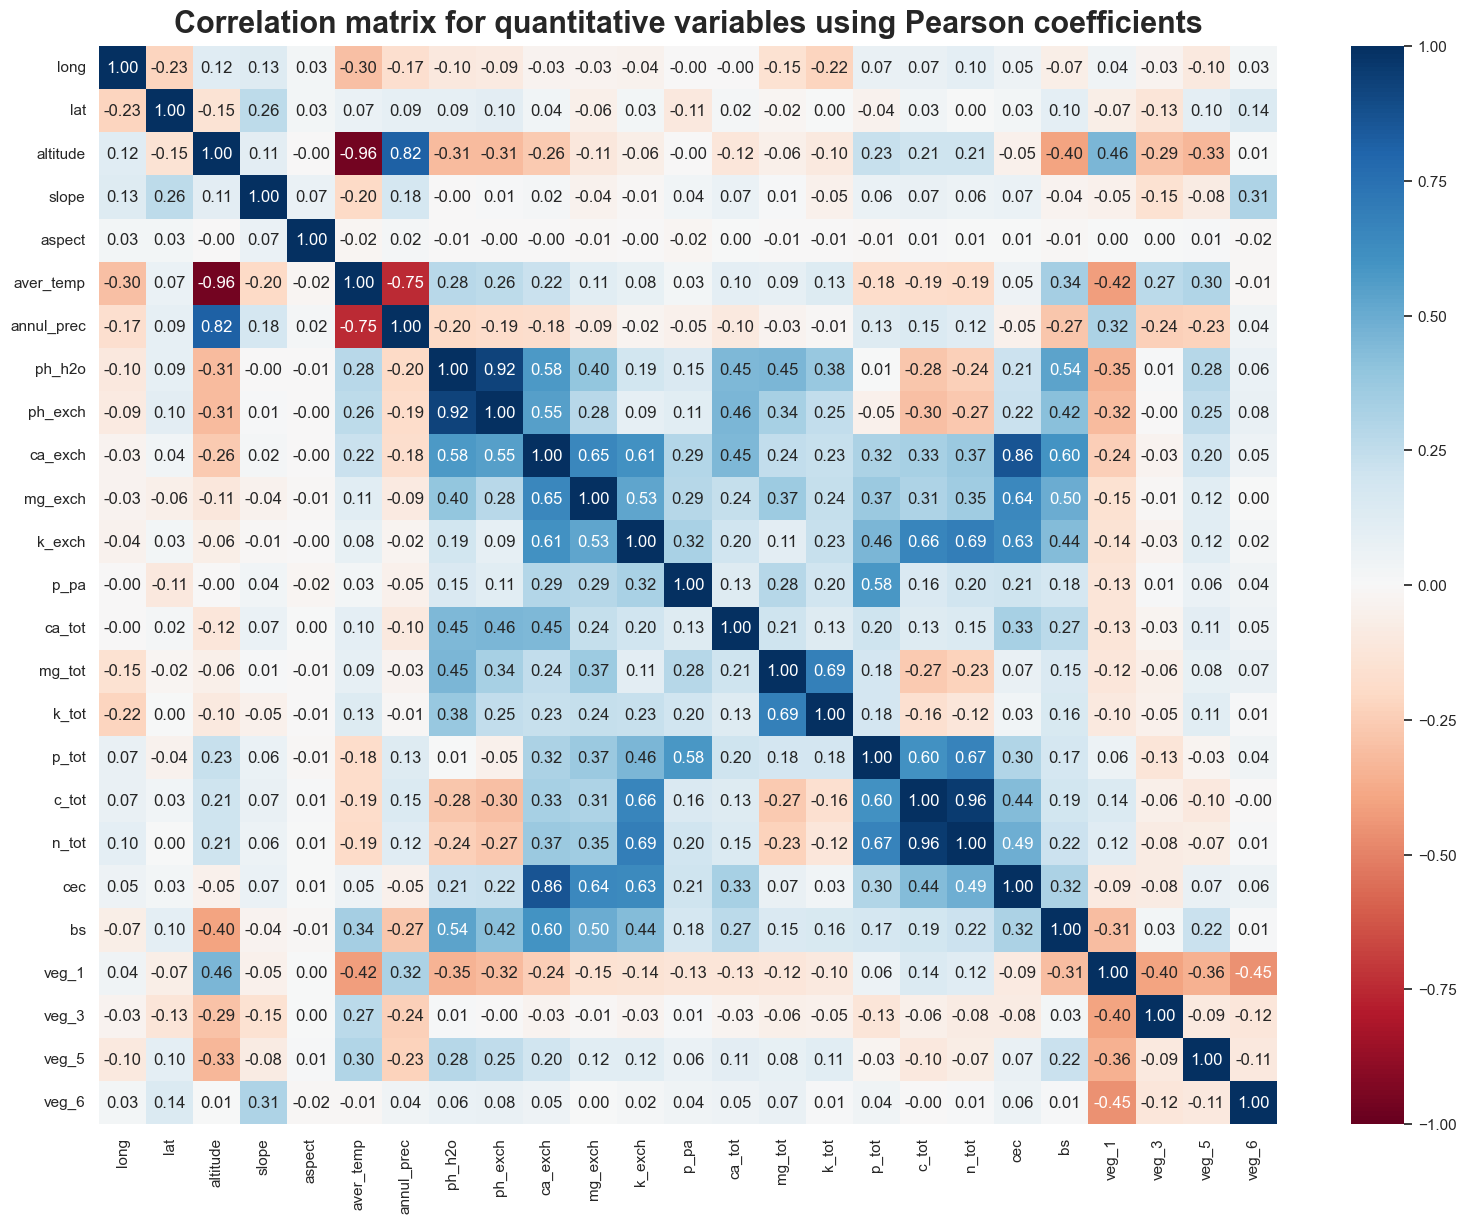

In [99]:
soil_train_corr_matrix = soil_train[soil_nemric_predictors_to_plot].corr()

# Producing a heatmap from that correlation matrix
sns.set(rc = {'figure.figsize': (19, 14)}) # For better display and readability
sns.heatmap(soil_train_corr_matrix, vmax = 1.0, vmin = -1.0, fmt = '.2f', annot = True, cmap = "RdBu")
plt.title(label = "Correlation matrix for quantitative variables using Pearson coefficients", 
          fontdict = {'weight': "bold", 'size': 22}, y = 1.005)
plt.show()

As visualised above, many strong correlations exist among the quantitative features in the dataset, such as between 'altitude' and 'aver_temp' (negative), between 'altitude' and 'aver_prec' (positive), between 'ph_h2o' and 'ph_exch' (positive), or between 'ca_exch' and 'cec' (positive). 

#### 7. Investigating pairwise associations among the quantitative features

Likewise, the association strengths between categorical variables, including the target 'forest_type', can be statistically demonstrated with a heatmap, but based on the Cramer’s V test. Because most categorical predictors in the current data contain more than two classes, the Cramer’s V statistic would be suitable for evaluating their pairwise correlations, it is calculated based on a chi-square test, which assesses the independence between two categorical variables by checking whether the frequency occurrence of one variable is dependent on the other, or whether a class in one variable tends to occur in conjunction with a class in the other variable (Ben-Shachar et al. 2023, pp. 2-3). Cramer's V statistics range from 0 (denoting no association at all) to 1 (a complete association).

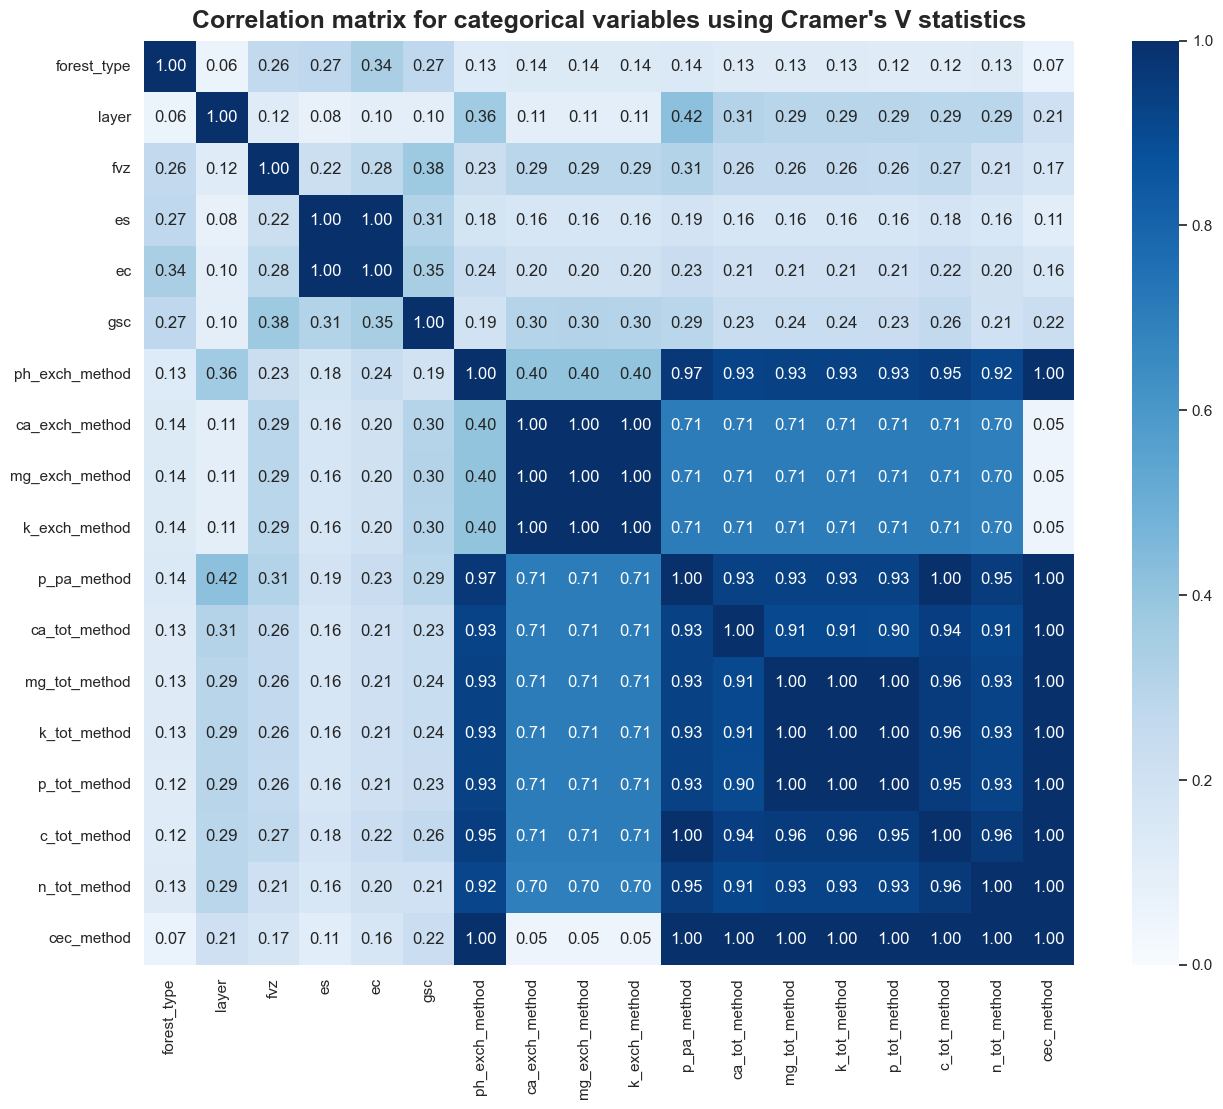

In [30]:
from scipy.stats import chi2_contingency

def calculate_cramers_v(array_1, array_2):
    """
    This function calculates the Cramer's V statistic for a given pair of categorical variables.
    
    Parameters:
    'array_1', 'array_2': the two data arrays representing two categorical features of interest
    """

    # Creating an array representing a contingency table for the two input variables
    contingency_table = np.array(pd.crosstab(array_1, array_2)) 

    # Extracting the test statistic from the Chi-squared test
    chi2_stat = chi2_contingency(contingency_table)[0] 
    
    # Getting the total number of observations
    total_n_obs = np.sum(contingency_table) 
    
    # Taking the lower value between the columns and the rows of the contigency table
    min_dimension = min(contingency_table.shape) - 1 

    # Applying the Cramer's V formula
    cramers_v_result = np.sqrt((chi2_stat / total_n_obs) / min_dimension)

    return cramers_v_result

def cramers_v_matrix(data, categorical_predictors_list):
    """
    This function returns a matrix of the Cramer's V statistics 
    computed for each pair of categorical variables in a dataset.
    
    Parameters:
    'data': a dataframe of interest
    'categorical_predictors_list': a list specifying the names of categorical features in the given dataset
    """

    # Initialising an empty list representing the rows in the correlation matrix
    matrix_rows = []

    for categorical_predictor_1 in categorical_predictors_list:
        # Initialising empty columns for the current matrix row
        cols_of_current_row = []

        for categorical_predictor_2 in categorical_predictors_list:
            # Performing the Cramer's V calculation on the two current categorical predictors
            cramers_v_calc = calculate_cramers_v(data[categorical_predictor_1], data[categorical_predictor_2])

            cols_of_current_row.append(cramers_v_calc) # Appending each column to the current matrix row

        matrix_rows.append(cols_of_current_row) # Appending all matrix columns to the corresponding matrix rows

    # Converting the matrix to a dataframe format
    final_cramers_v_matrix = pd.DataFrame(
        data = np.array(matrix_rows),
        columns = categorical_predictors_list, 
        index = categorical_predictors_list) 
    
    return final_cramers_v_matrix

# Computing the Cramer's V statistic matrix for the training data (including the target variable 'forest_type')
soil_train_cramers_v_corr_matrix = cramers_v_matrix(soil_train, ['forest_type'] + soil_categorical_predictors_to_plot)

# Producing a heatmap from that Cramer's V matrix
sns.set(rc = {'figure.figsize': (15, 12)}) # For better display and readability
sns.heatmap(soil_train_cramers_v_corr_matrix, vmax = 1.0, vmin = 0, fmt = '.2f', annot = True, cmap = "Blues")
plt.title(label = "Correlation matrix for categorical variables using Cramer's V statistics", 
          fontdict = {'weight': "bold", 'size': 18}, y = 1.005)
plt.show()

Many strong associations exist among the categorical features in the dataset as well. Almost all methods for measuring different chemicals in soil are strongly associated with each other. As expected, 'es' and 'ec' are also completely associated. However, once again, 'forest_type' does not appear to be associated with any of the categorical predictors.

## =======================

# E. Data preprocessing

The following preprocessing steps are set up on the training data, and most of them will get applied to the testing data. To avoid confusion, those preprocessing steps would not be instantiated and learnt again on the testing dataset. Instead, the preprocessing estimators will compute necessary parameters from the training data only, then these parameters will get synchronised onto the testing data so that both datasets are presented in a consistent structure while the testing data remains unbiased.

It is worth mentioning that not all of the preprocessing steps below are needed for every classifier built later, for example, the Decision Tree and Random Forest models do not require the removal of zero-variance features, but the other models do, or the Support Vector Classifier and K-Nearest Neighbour models require the training data to be made more symmetric, but the others do not (Kuhn & Silge 2022, p.546). However, all prediction models should be fed with the same data inputs to become comparable, and using a preprocessing step when not required is actually not detrimental to the training process, so all of the following preprocessing steps will be performed at the stage of fitting models.


This section defines and demonstrates each preprocessing step. After being defined, each preprocessing step will be experimented on the training dataset, just for **demonstration purpose** only, to show the effects they make on the data. For hyperparameter tuning and cross validation, those preprocessing steps are not meant to be executed on the entire training data, but they will only be implemented on the training splits, then get synchronised on to the corresponding validation split.

#### 1. Imputing missing values

For quantitative predictors in the dataset, an imperative imputation method will be applied, using the default estimator built in the sklearn library. The order of imputation is from the left to the right of the dataframe, which means the first column to be imputed being 'altitude', 

In [31]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Creating a custom imputer to handle missing values in categorical features
class CustomQuantitativeFeaturesIterativeImputer(BaseEstimator, TransformerMixin):
    def __init__(self, iter_imputer_spec):
        self.iter_imputer_spec = iter_imputer_spec

    def fit(self, X, y = None):
        self.quantitative_features_in_ = list(X.select_dtypes(['float64', 'int64']).columns)
        self.iter_imputer_spec.fit(X[self.quantitative_features_in_])

        # Obtaining the output features' names
        self.features_out_ = list(X.columns)
        return self
    
    def transform(self, X):
        X_output = deepcopy(X)
        X_output[self.quantitative_features_in_] = self.iter_imputer_spec.transform(X_output[self.quantitative_features_in_])
        return X_output
      
    def get_feature_names_out(self):
        return self.features_out_

The imputation techniques applied to categorical predictors are simpler. For each categorical feature with many missing values (1000 or more), those absent values will be considered as a separate class; meanwhile, for each categorical feature with fewer missing values (less than 1000), they will be substituted by the mode or the most frequently-occurring value among non-missing data points.

In [32]:
from sklearn.impute import SimpleImputer

# Creating a custom imputer to handle missing values in categorical features
class CustomCategoricalFeaturesImputer(BaseEstimator, TransformerMixin):
    def __init__(self, mode_simple_imputer_spec, nan_threshold):
        self.mode_simple_imputer_spec = mode_simple_imputer_spec
        self.nan_threshold = nan_threshold

    def fit(self, X, y = None):
        self.categorical_features_in_ = list(X.select_dtypes('category').columns)

        self.feature_to_impute_mode_ = []
        self.feature_to_impute_new_class_ = {}

        # Comparing the number of missing values against the threshold specified to apply the corresponding imputation technique
        for col_name in self.categorical_features_in_:
            if sum(X[col_name].isna()) < self.nan_threshold:
                self.feature_to_impute_mode_.append(col_name)
            else:
                # Specifying a new category to impute for each relevant column
                self.feature_to_impute_new_class_[col_name] = X[col_name].astype('Int64').max() + 1 
        
        # Fitting the mode imputer on the specified columns
        self.mode_simple_imputer_spec.fit(X[self.feature_to_impute_mode_])

        # Obtaining the output features' names
        self.features_out_ = list(X.columns) 

        return self
    
    def transform(self, X):
        X_output = deepcopy(X)

        # Imputing missing values in relevant columns with their mode
        X_output[self.feature_to_impute_mode_] = self.mode_simple_imputer_spec.transform(X_output[self.feature_to_impute_mode_])
        
        # Imputing missing values in the relevant columns as a new category
        for col_name, new_class_to_impute in self.feature_to_impute_new_class_.items():
            X_output[col_name] = X_output[col_name].astype('Int64')
            X_output[col_name].fillna(value = new_class_to_impute, inplace = True)

        # Making sure the categorical features remain as 'category' when outputted
        X_output[self.categorical_features_in_] = X_output[self.categorical_features_in_].astype('category')

        return X_output
      
    def get_feature_names_out(self):
        return self.features_out_

In [33]:
# Instantiating an Iterative Imputer specification
soil_iter_imputer = IterativeImputer(max_iter = 100, imputation_order = 'roman', initial_strategy = 'median', random_state = 689)

# Instantiating a Simple Imputer specification
soil_mode_imputer = SimpleImputer(missing_values = pd.NA, strategy = 'most_frequent')

# Temporary pipeline and temporarily preprocessed training data
soil_temp_pipeline = i_Pipeline(steps = [
    ('step_1', CustomQuantitativeFeaturesIterativeImputer(iter_imputer_spec = soil_iter_imputer)),
    ('step_2', CustomCategoricalFeaturesImputer(mode_simple_imputer_spec = soil_mode_imputer, nan_threshold = 1000))])

soil_temp_pipeline_fitted = soil_temp_pipeline.fit(soil_X_train)

# Updating the temporarily preprocessed training data
soil_temp_X_train_prepro = soil_temp_pipeline_fitted.transform(soil_X_train)
soil_temp_X_train_prepro

layer   long    lat  altitude  slope  aspect  aver_temp  annul_prec fvz   
11844     1 50.230 16.470   932.184 10.830 248.040      4.300     799.570   6  \
3351      1 50.870 15.250   641.000 30.610 237.560      5.720     716.970   5   
13103     1 49.280 16.510   333.032  5.860  34.520      8.080     576.470   2   
298       1 49.050 14.540   514.000  4.270 229.000      7.570     750.210   3   
376       1 49.100 13.450   882.000 10.720  46.400      5.390    1032.370   5   
...     ...    ...    ...       ...    ...     ...        ...         ...  ..   
2015      0 50.420 13.250   397.000  0.830 145.610      6.970     619.250   1   
8177      0 49.890 17.190   592.000 28.720 226.590      6.340     710.910   3   
14737     1 49.610 12.930   505.075  7.840 304.290      7.060     662.620   2   
12542     1 49.880 18.160   302.012  9.430  34.080      8.130     621.550   2   
10440     1 48.710 14.110   731.000  0.970 242.650      6.270     933.990   5   

      es  ec gsc  ph_h2o ph_h2o_method  ph_exch ph_exch_method  ca_exch   
11844  5  20  11   3.600             0    2.800              0  219.450  \
3351   6  23  11   4.560             0    3.930              1   17.570   
13103  0  17   9   5.180             0    4.270              0  548.310   
298    0  17   5   4.950             0    3.710              1 1523.320   
376    3  12   5   4.620             0    4.070              1  194.970   
...   ..  ..  ..     ...           ...      ...            ...      ...   
2015   6  24   0   6.480             0    6.220              1 9161.830   
8177   0  17   5   3.900             0    3.200              0 1677.039   
14737  4  14  10   4.920             0    3.700              1  436.180   
12542  0   1   5   4.390             0    3.790              0  122.350   
10440  0  17   3   4.540             0    3.930              0   76.420   

      ca_exch_method  mg_exch mg_exch_method  k_exch k_exch_method   p_pa   
11844              3   94.370              3  65.470             3  7.820  \
3351               1    8.070              1  19.100             1  1.620   
13103              3   40.520              3 101.670             3 13.650   
298                0  238.900              0 163.570             0  7.560   
376                2   51.630              2  70.890             2  3.120   
...              ...      ...            ...     ...           ...    ...   
2015               0  921.200              0 883.610             0 82.050   
8177               3  136.580              3 308.628             3 32.351   
14737              0  121.030              0 101.890             0  2.590   
12542              3    5.000              3  47.120             3  9.180   
10440              3    5.000              3  31.790             3  3.430   

      p_pa_method    ca_tot ca_tot_method   mg_tot mg_tot_method    k_tot   
11844           0 -2017.440             1 1183.910             1  539.393  \
3351            2   168.550             2 1862.550             2  877.910   
13103           0   710.190             1  805.820             1  112.570   
298             1  2022.160             0 8804.910             0 6087.240   
376             1   493.140             0 7616.850             0 4706.390   
...           ...       ...           ...      ...           ...      ...   
2015            1 18582.030             0 9227.070             0 5062.120   
8177            3  1820.000             1  542.180             1 1174.660   
14737           1  1986.850             0 3324.960             0 1643.110   
12542           0    92.570             1  468.850             1    5.000   
10440           0    57.890             1  841.170             1   80.050   

      k_tot_method    p_tot p_tot_method  c_tot c_tot_method  n_tot   
11844            1  330.617            1 11.410            0  0.490  \
3351             2  206.300            2  4.210            2  0.230   
13103            1  167.080            1  2.190            0  0.160  

In [34]:
# Verifying the experiment of imputing missing values in the training data 
if all(soil_temp_X_train_prepro.isna().sum().values == 0):
    print("On the training set, the missing values in all features have been immputed.")
else:
    print("Missing values are still present.")

On the training set, the missing values in all features have been immputed.


#### 2. Removing features with zero variance and low variance

Zero-variance features are those holding constant values across all their instances, so they do not carry any predictive power and should be excluded from prediction models (Li et al. 2018, p.18). Hence, the next preprocessing step to perform is to get rid of those features possessing only one single value. 

In [35]:
from sklearn.feature_selection import VarianceThreshold

class ZeroVarianceFilter(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y = None):
        zero_var_filter = VarianceThreshold(threshold = 0)
        zero_var_filter.fit(X)
        self.zero_var_features_to_drop = [col for col in X.columns 
                                          if col not in zero_var_filter.get_feature_names_out()]
        
        # Updating the output features' names
        self.features_out_ = [col_name for col_name in X.columns
                              if col_name not in self.zero_var_features_to_drop]
        return self
    
    def transform(self, X):
        X_output = deepcopy(X)
        X_output.drop(columns = self.zero_var_features_to_drop, axis = 1, inplace = True)
        return X_output
    
    def get_feature_names_out(self):
        return self.features_out_

In [36]:
soil_temp_pipeline.steps.append(('step_3', ZeroVarianceFilter()))
soil_temp_pipeline_fitted = soil_temp_pipeline.fit(soil_X_train)

print("(For demonstation purpose on the training data only)\n",
      "Due to having zero variance, the following features will be dropped:", 
      soil_temp_pipeline['step_3'].zero_var_features_to_drop)

# Updating the temporarily preprocessed training data
soil_temp_X_train_prepro = soil_temp_pipeline_fitted.transform(soil_X_train)

(For demonstation purpose on the training data only)
 Due to having zero variance, the following features will be dropped: ['ph_h2o_method', 'veg_0']


Similar to zero-variance features, predictors with variance close to zero are also considered to play a trivial role in prediction models and should be removed as well (Liu et al. 2022, p.1087). However, variance is dependent on the range of values in each feature, while the dataset contains variables with diverse ranges, so dropping low-variance predictors is not as simple as picking an arbitrary threshold then filtering out the variables whose variance is lower than that threshold. Regarding a rule suggested by Boehmke and Greenwell (2019, p.54), to be detected as a low-variance feature, a predictor will meet two conditions: the number of its unique values is equal to only a small fraction of the sample size, and the most frequent value occurs exceedingly more than the second most frequent value in the data. Applying them to this project, the threshold is chosen to be 0.01 for both conditions, which means that a predictor will be eliminated if the fraction of distinct values in it over the training-data size is lower than 0.01 and the count of the second most frequently-occurring value is less than 1% of that of the most common value.

In [37]:
class LowVarianceFilter(BaseEstimator, TransformerMixin):
    def __init__(self, unique_count_threshold, top_two_counts_ratio_threshold):
        self.unique_count_threshold = unique_count_threshold
        self.top_two_counts_ratio_threshold = top_two_counts_ratio_threshold
    
    def fit(self, X, y = None):
        self.low_var_features_to_drop_ = []
        for col in X.columns:
            col_unique_values_with_counts = np.unique(X[col], return_counts = True)
            col_unique_values = col_unique_values_with_counts[0]
            col_value_counts = sorted(col_unique_values_with_counts[1], reverse = True)
            
            # Because zero-variance features have already been removed, the list of unique values in each ...  
            # ... column contains more than one items, and so the indexing on unique value counts below will work.
            low_var_condition_1 = len(col_unique_values)/len(X) < self.unique_count_threshold 
            low_var_condition_2 = col_value_counts[1]/col_value_counts[0] < self.top_two_counts_ratio_threshold
            if low_var_condition_1 and low_var_condition_2:
                self.low_var_features_to_drop_.append(col)
                
        # Updating the output features' names
        self.features_out_ = [col_name for col_name in X.columns 
                              if col_name not in self.low_var_features_to_drop_]
        return self
        
    def transform(self, X):
        X_output = deepcopy(X)
        X_output.drop(columns = self.low_var_features_to_drop_, axis = 1, inplace = True)
        return X_output
    
    def get_feature_names_out(self):
        return self.features_out_

In [38]:
soil_temp_pipeline.steps.append(
    ('step_4', LowVarianceFilter(unique_count_threshold = 0.01, 
                                 top_two_counts_ratio_threshold = 0.01)))
soil_temp_pipeline_fitted = soil_temp_pipeline.fit(soil_X_train)

print("(For demonstation purpose on the training data only)\n",
      "Having low variance, the following features will be dropped:\n", 
      soil_temp_pipeline['step_4'].low_var_features_to_drop_)

# Updating the temporarily preprocessed training data
soil_temp_X_train_prepro = soil_temp_pipeline_fitted.transform(soil_X_train)

(For demonstation purpose on the training data only)
 Having low variance, the following features will be dropped:
 ['veg_1e', 'veg_2', 'veg_2e', 'veg_3e', 'veg_4', 'veg_4k', 'veg_5e', 'veg_7', 'veg_7e', 'veg_8', 'veg_9', 'veg_9e', 'veg_9x']


#### 3. Removing highly correlated quantitative predictors

As found from the exploratory analysis, quantitative features in the dataset exhibit many strong pairwise correlations. This situation of multicollinearity may cause prediction models to be excessively complex or to overfit because similar information would be delivered by multiple features, so highly correlated predictors will be removed (Pradhan & Setyawan 2021, p.112). According to Mukaka (2012, p.71), strong to very strong correlations could be detected with a threshold of 0.7 on Pearson correlation coefficients. It means that for any pair of quantitative features with a correlation score over 0.7, one of them would be dropped when a model is fitted. 

In [39]:
class RemoveHighlyCorrelatedQuantitativePredictors(BaseEstimator, TransformerMixin):
    def __init__(self, pearson_corr_threshold):
        self.pearson_corr_threshold = pearson_corr_threshold
        
    def fit(self, X, y = None):
        # Generating a correlation matrix with specific correlations between each pair of quantitative variables
        X_corr_matrix = X.corr(numeric_only = 1)

        # Getting the upper-right triangle of the correlation matrix
        X_upper_tri_corr = X_corr_matrix.where(np.triu(np.ones(X_corr_matrix.shape), k = 1).astype(np.bool_))

        # Getting the predictors to be dropped due to high correlation (one predictor for each highly-correlated variable pair)
        self.quantitative_features_to_drop_ = [predictor for predictor in X_upper_tri_corr.columns 
                                               if any(abs(X_upper_tri_corr[predictor]) >= self.pearson_corr_threshold)]
                                               
        # Updating the output features' names
        self.features_out_ = [col_name for col_name in X.columns 
                              if col_name not in self.quantitative_features_to_drop_]
        return self
        
    def transform(self, X):
        X_output = deepcopy(X)
        X_output.drop(columns = self.quantitative_features_to_drop_, axis = 1, inplace = True)
        return X_output
    
    def get_feature_names_out(self):
        return self.features_out_

In [40]:
soil_temp_pipeline.steps.append(
    ('step_5', RemoveHighlyCorrelatedQuantitativePredictors(pearson_corr_threshold = 0.7)))
soil_temp_pipeline_fitted = soil_temp_pipeline.fit(soil_X_train)

print("(For demonstation purpose on the training data only)\n",
      "Due to strong correlations,", str(len(soil_temp_pipeline['step_5'].quantitative_features_to_drop_)),
      "quantitative predictors to be dropped are:\n", soil_temp_pipeline['step_5'].quantitative_features_to_drop_)

# Updating the temporarily preprocessed training data
soil_temp_X_train_prepro = soil_temp_pipeline_fitted.transform(soil_X_train)

(For demonstation purpose on the training data only)
 Due to strong correlations, 7 quantitative predictors to be dropped are:
 ['aver_temp', 'annul_prec', 'ph_exch', 'mg_exch', 'c_tot', 'n_tot', 'cec']


#### 4. Removing highly correlated categorical predictors

Similar to quantitative variables, strongly associated categorical features may also cause overfitting in prediction models and thus should be assessed for removal from the model-fitting process. In this project, the threshold of Cramer’s V to detect strong and very-strong correlations between categorical features is chosen to be 0.6, as advised by Lee (2016, p.560). Thus, for any pair of categorical predictors in the training data with a Cramer’s V statistic higher than 0.6, only one of them will be retained while the other will be dropped.

In [41]:
class RemoveHighlyCorrelatedCategoricalPredictors(BaseEstimator, TransformerMixin):
    def __init__(self, cramers_v_threshold):
        self.cramers_v_threshold = cramers_v_threshold
        
    def fit(self, X, y = None):
        # Extracting categorical predictors only
        self.categorical_predictors_list_ = list(X.select_dtypes(['category']).columns)

        # Generating a Cramer's V correlation matrix with correlation coefficients between each pair of categorical variables
        X_cramers_v_corr_matrix = cramers_v_matrix(X, self.categorical_predictors_list_)

        # Getting the upper-right triangle of the correlation matrix
        X_cramers_v_upper_tri_corr = X_cramers_v_corr_matrix.where(
            np.triu(np.ones(X_cramers_v_corr_matrix.shape), k = 1).astype(np.bool_))

        # Getting the predictors to be dropped due to high correlation (one predictor for each highly-correlated variable pair)
        self.categorical_features_to_drop_ = [predictor for predictor in X_cramers_v_upper_tri_corr.columns 
                                              if any(abs(X_cramers_v_upper_tri_corr[predictor]) >= self.cramers_v_threshold)]
        
        # Updating the output features' names
        self.features_out_ = [col_name for col_name in X.columns 
                              if col_name not in self.categorical_features_to_drop_]
        return self
        
    def transform(self, X):
        X_output = deepcopy(X)
        X_output.drop(columns = self.categorical_features_to_drop_, axis = 1, inplace = True)
        return X_output
    
    def get_feature_names_out(self):
        return self.features_out_

In [42]:
soil_temp_pipeline.steps.append(
    ('step_6', RemoveHighlyCorrelatedCategoricalPredictors(cramers_v_threshold = 0.6)))
soil_temp_pipeline_fitted = soil_temp_pipeline.fit(soil_X_train)

print("(For demonstation purpose on the training data only)\n",
      "Due to strong correlations under a Cramer's V test,", str(len(soil_temp_pipeline['step_6'].categorical_features_to_drop_)),
      "categorical predictors to be dropped are:\n", soil_temp_pipeline['step_6'].categorical_features_to_drop_)

# Updating the temporarily preprocessed training data
soil_temp_X_train_prepro = soil_temp_pipeline_fitted.transform(soil_X_train)

(For demonstation purpose on the training data only)
 Due to strong correlations under a Cramer's V test, 13 categorical predictors to be dropped are:
 ['ec', 'ca_exch_method', 'mg_exch_method', 'k_exch_method', 'p_pa_method', 'ca_tot_method', 'mg_tot_method', 'k_tot_method', 'p_tot_method', 'c_tot_method', 'n_tot_method', 'cec_method', 'bs_method']


#### 5. Lumping infrequently occurring classes in categorical predictors 

In some categorical predictors, there are classes that occur only a few times throughout the dataset. Infrequent categories in categorical features would increase the resulting dimensionality of the dataset when it gets transformed or encoded for fitting prediction models, raising the model complexity and the likelihood of overfitting, so such categories should be lumped together as a separate class (Roccetti et al. 2021, p.5). The thresholds of occurrence frequency to determine infrequent categories are different for each categorical feature.

In [43]:
for col in soil_temp_X_train_prepro.select_dtypes('category').columns:
    print(soil_temp_X_train_prepro[col].value_counts(normalize = True), "\n")

layer
1   0.470
0   0.399
2   0.132
Name: proportion, dtype: float64 

fvz
4   0.253
3   0.192
2   0.180
5   0.159
6   0.082
1   0.071
0   0.032
7   0.028
8   0.003
Name: proportion, dtype: float64 

es
3   0.395
0   0.370
4   0.108
5   0.037
2   0.035
1   0.029
6   0.025
Name: proportion, dtype: float64 

gsc
5    0.426
11   0.202
6    0.137
10   0.069
7    0.065
9    0.046
4    0.026
3    0.010
2    0.008
8    0.005
1    0.004
0    0.002
Name: proportion, dtype: float64 

ph_exch_method
0   0.560
1   0.440
Name: proportion, dtype: float64 



In [44]:
class CollapseInfrequentClassesInCategoricalPredictors(BaseEstimator, TransformerMixin):
    def __init__(self, categorical_var_collapse_threshold_dict):
        self.categorical_var_collapse_threshold_dict = categorical_var_collapse_threshold_dict

    def fit(self, X, y = None):
        self.infreq_classes_to_lump_ = {}
        for column_of_interest, collapse_threshold in list(self.categorical_var_collapse_threshold_dict.items()):
            if collapse_threshold is not None:
                class_frequency = pd.DataFrame({'frequency': X[column_of_interest].value_counts(normalize = True)})

                self.infreq_classes_to_lump_[column_of_interest] = []
                for index, row in class_frequency.iterrows():
                    if row['frequency'] <= collapse_threshold:
                        self.infreq_classes_to_lump_[column_of_interest].append(index)

        # Obtaining the output features' names
        self.features_out_ = list(X.columns)
        
        return self
    
    def transform(self, X):
        X_output = deepcopy(X)
        for col_name, classes_to_lump in self.infreq_classes_to_lump_.items():
            X_output[col_name] = np.where(
                ~X_output[col_name].isin(classes_to_lump),
                X_output[col_name], X_output[col_name].astype('int64').max() + 1)
            X_output[col_name] = X_output[col_name].astype('category')
        
        return X_output
    
    def get_feature_names_out(self):
        return self.features_out_

In [45]:
soil_temp_pipeline.steps.append(
    ('step_7', CollapseInfrequentClassesInCategoricalPredictors(
        categorical_var_collapse_threshold_dict = dict(zip(['layer', 'fvz', 'es', 'gsc', 'ph_exch_method'], 
                                                           [None, 0.1, 0.05, 0.1, None])))))
soil_temp_pipeline_fitted = soil_temp_pipeline.fit(soil_X_train)

# Updating the temporarily preprocessed training data
soil_temp_X_train_prepro = soil_temp_pipeline_fitted.transform(soil_X_train)

In [46]:
print("(For demonstation purpose on the training data only)\n")
for col in soil_temp_X_train_prepro.select_dtypes('category').columns:
    print(soil_temp_X_train_prepro[col].value_counts(normalize = True), "\n")

(For demonstation purpose on the training data only)

layer
1   0.470
0   0.399
2   0.132
Name: proportion, dtype: float64 

fvz
4   0.253
9   0.216
3   0.192
2   0.180
5   0.159
Name: proportion, dtype: float64 

es
3   0.395
0   0.370
7   0.126
4   0.108
Name: proportion, dtype: float64 

gsc
5    0.426
12   0.235
11   0.202
6    0.137
Name: proportion, dtype: float64 

ph_exch_method
0   0.560
1   0.440
Name: proportion, dtype: float64 



#### 6. Upsampling the training data on 'forest_type'

The problem of imbalanced data would make prediction models tend to favour the majority class (“Coniferous”) with misleading performance results (Kaur, Pannu & Malhi 2019, p.1). Hence, the proportions of the three forest types will be equalised by artificially creating more training samples for the minority classes (“Deciduous” and “Mixed”). The method utilised to do that is SMOTE, abbreviated for Synthetic Minority Oversampling Technique - Nominal Continuous, which introduces synthetic samples based on a certain number of the nearest data points for each minority class and takes into consideration both quantitative and nominal features for greater effectiveness (Chawla et al. 2002, p.328; Koivu et al. 2020, p.1669). With this technique, each of the three forest types in the training data is made to possess 8953 samples (the occurrence frequency of the dominant forest type 'Coniferous'), resulting in an increase in the size of the training data to 8953 x 3 = 26859 instances.

In [48]:
from imblearn.over_sampling import SMOTENC

class CustomSMOTENC(BaseEstimator):
    def __init__(self):
        pass

    def fit(self, X, y):
        # Extracting categorical predictors only
        self.X_categorical_predictors_list_ = list(X.select_dtypes(['category']).columns)

        self.upsampling_spec_ = SMOTENC(
            categorical_features = [col in self.X_categorical_predictors_list_ for col in X.columns], 
            k_neighbors = 10, random_state = 8216)

        return self

    def fit_resample(self, X, y):
        X_copy = deepcopy(X)
        y_copy = deepcopy(y)

        self.fit(X = X_copy, y = y_copy)
        X_output, y_output = self.upsampling_spec_.fit_resample(X = X_copy, y = y_copy)
        
        return X_output, y_output
    
    def fit_sample(self, X, y):
        pass

In [49]:
soil_temp_pipeline.steps.append(('step_8', CustomSMOTENC()))

# Updating the temporarily preprocessed X_training data and the target variable after getting upsampled
soil_temp_X_train_prepro, soil_y_train_temp_upsampled = soil_temp_pipeline.fit_resample(X = soil_X_train, y = soil_y_train)

# Checking the occurrence frequency of each forest type again to verify the upsampling step
print("(For demonstation purpose on the training data only)\n",
      "Checking the class distribution of the target variable in the training data after getting upsampled:")
print(pd.DataFrame(np.unique(soil_y_train_temp_upsampled, return_counts = True), index = ['forest_type', 'count']).T)

# Checking the shape of the X_training data as well
print("\nThe shape of the X_training data after getting upsampled is:", soil_temp_X_train_prepro.shape, "\n")


(For demonstation purpose on the training data only)
 Checking the class distribution of the target variable in the training data after getting upsampled:
  forest_type count
0  Coniferous  8953
1   Deciduous  8953
2       Mixed  8953

The shape of the X_training data after getting upsampled is: (26859, 23) 



#### 7. Performing Yeo-Johnson power transformation and standardisation on the quantitative predictors

In [50]:
from sklearn.preprocessing import PowerTransformer

class CustomPowerTransformerWithStandardisation(BaseEstimator, TransformerMixin):
    def __init__(self, power_transformer_spec):
        self.power_transformer_spec = power_transformer_spec
    
    def fit(self, X, y = None):
        self.features_to_transform_ = list(X.select_dtypes(['float64', 'int64']).columns)
        self.power_transformer_spec.fit(X[self.features_to_transform_])
        
        # Obtaining the output features' names
        self.features_out_ = list(X.columns)
        return self
    
    def transform(self, X):
        X_output = deepcopy(X)
        X_output[self.features_to_transform_] = self.power_transformer_spec.transform(X_output[self.features_to_transform_])
        return X_output
    
    def get_feature_names_out(self):
        return self.features_out_

In [51]:
from sklearn.preprocessing import PowerTransformer

# Initing the power transformer with Yeo-Johnson method and standardisation technique 
soil_power_transformer_spec = PowerTransformer(method = 'yeo-johnson', standardize = True)

soil_temp_pipeline.steps.append(
    ('step_9', CustomPowerTransformerWithStandardisation(power_transformer_spec = soil_power_transformer_spec)))

# Updating the temporarily preprocessed training data
soil_temp_X_train_prepro = soil_temp_pipeline.fit_transform(soil_X_train, soil_y_train)

In [52]:
# Checking if standardisation (and scaling) has been successfully performed (mean of 0 and std of 1 on training data)
print("(For demonstation purpose on the training data only)")
soil_temp_X_train_prepro[soil_temp_X_train_prepro.select_dtypes(['float64', 'int64']).columns].describe().loc[['mean', 'std', 'min', 'max']]

(For demonstation purpose on the training data only)


long    lat  altitude  slope  aspect  ph_h2o  ca_exch  k_exch    p_pa   
mean  0.000  0.000     0.000 -0.000   0.000   0.000    0.000   0.000  -0.000  \
std   1.000  1.000     1.000  1.000   1.000   1.000    1.000   1.000   1.000   
min  -2.507 -2.050    -3.388 -2.411  -2.405  -5.919  -21.194 -31.753 -16.307   
max   2.228  1.855     3.190  2.819   2.038   2.493   14.617   6.786   6.661   

      ca_tot  mg_tot   k_tot   p_tot     bs  veg_1  veg_3  veg_5  veg_6  
mean  -0.000   0.000  -0.000  -0.000  0.000  0.000 -0.000  0.000  0.000  
std    1.000   1.000   1.000   1.000  1.000  1.000  1.000  1.000  1.000  
min  -23.442 -22.642 -21.244 -23.614 -5.936 -0.984 -0.328 -0.480 -0.633  
max   25.378  13.215   7.760  10.603  2.700  1.340  3.119  2.210  1.785

#### 8. Converting categorical predictors to dummy variables

In [53]:
from sklearn.preprocessing import OneHotEncoder

class ConvertCategoricalPredictorsToDummyVariables(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y = None):
        X_copy = deepcopy(X)
        self.ohe_spec_ = OneHotEncoder(drop = 'first', 
                                       sparse_output = False, dtype = 'uint8').set_output(transform = 'pandas')

        # Extracting the list of categorical predictors
        self.categorical_predictors_list_ = list(X_copy.select_dtypes(['category']).columns)

        # Fitting the one-hot encoder
        self.ohe_spec_.fit(X_copy[self.categorical_predictors_list_])

        # Updating the output features' names
        self.features_out_ = [col_name for col_name in X_copy.columns
                              if col_name not in self.categorical_predictors_list_] + list(self.ohe_spec_.get_feature_names_out())
        return self
    
    def transform(self, X):
        X_copy = deepcopy(X)

        # Getting the dummies (dropping one category as the reference class)
        self.X_dummies_ = self.ohe_spec_.transform(X_copy[self.categorical_predictors_list_])

        # Dropping the categorical variables that have been converted to dummies
        X_output = X_copy.drop(columns = self.categorical_predictors_list_, axis = 1)

        # Then concatenating the dummy variables to the initial dataframe to get the output
        X_output = pd.concat([X_output, self.X_dummies_], axis = 1)

        return X_output
    
    def get_feature_names_out(self):
        return self.features_out_

In [54]:
soil_temp_pipeline.steps.append(
    ('step_10', ConvertCategoricalPredictorsToDummyVariables()))

# Updating the temporarily preprocessed training data
soil_temp_X_train_prepro = soil_temp_pipeline_fitted.fit_transform(soil_X_train, soil_y_train)

In [55]:
# Verifying that the dummy conversion has been performed on categorical predictors (example on the training data)
print("(For demonstation purpose on the training data only)\n")
soil_temp_prepro_dummies = [col for col in soil_temp_X_train_prepro.columns 
                            if col.startswith(tuple(soil_temp_pipeline_fitted['step_10'].categorical_predictors_list_))]
soil_temp_X_train_prepro[soil_temp_prepro_dummies]

(For demonstation purpose on the training data only)



layer_1  layer_2  fvz_3  fvz_4  fvz_5  fvz_9  es_3  es_4  es_7  gsc_6   
0            1        0      0      0      0      1     0     0     1      0  \
1            1        0      0      0      1      0     0     0     1      0   
2            1        0      0      0      0      0     0     0     0      0   
3            1        0      1      0      0      0     0     0     0      0   
4            1        0      0      0      1      0     1     0     0      0   
...        ...      ...    ...    ...    ...    ...   ...   ...   ...    ...   
26854        1        0      0      0      0      1     0     0     0      0   
26855        0        1      0      0      0      0     0     0     0      0   
26856        1        0      0      1      0      0     0     0     1      0   
26857        1        0      1      0      0      0     0     0     0      0   
26858        0        0      0      1      0      0     1     0     0      0   

       gsc_11  gsc_12  ph_exch_method_1  
0           1       0                 0  
1           1       0                 1  
2           0       1                 0  
3           0       0                 1  
4           0       0                 1  
...       ...     ...               ...  
26854       0       0                 0  
26855       0       1                 1  
26856       0       0                 1  
26857       0       1                 1  
26858       1       0                 0  

[26859 rows x 13 columns]

## Aggregating all the preprocessing steps into one pipeline for hyperparameter tuning and fitting models

In [56]:
# Instantiating an Iterative Imputer specification
soil_iter_imputer = IterativeImputer(max_iter = 100, imputation_order = 'roman', initial_strategy = 'median', random_state = 689)

# Instantiating a Simple Imputer specification
soil_mode_imputer = SimpleImputer(missing_values = pd.NA, strategy = 'most_frequent')

# Initing the power transformer with Yeo-Johnson method and standardisation technique 
soil_power_transformer_spec = PowerTransformer(method = 'yeo-johnson', standardize = True)

# Creating an aggregate pipeline wit all the above preprocessing steps for hyperparameter tuning and fitting models
soil_pipeline = i_Pipeline(steps = [
    ('step_1', CustomQuantitativeFeaturesIterativeImputer(iter_imputer_spec = soil_iter_imputer)),
    ('step_2', CustomCategoricalFeaturesImputer(mode_simple_imputer_spec = soil_mode_imputer, nan_threshold = 1000)),
    ('step_3', ZeroVarianceFilter()),
    ('step_4', LowVarianceFilter(unique_count_threshold = 0.01, top_two_counts_ratio_threshold = 0.01)),
    ('step_5', RemoveHighlyCorrelatedQuantitativePredictors(pearson_corr_threshold = 0.7)),
    ('step_6', RemoveHighlyCorrelatedCategoricalPredictors(cramers_v_threshold = 0.6)),
    ('step_7', CollapseInfrequentClassesInCategoricalPredictors(
        categorical_var_collapse_threshold_dict = dict(zip(['layer', 'fvz', 'es', 'gsc', 'ph_exch_method'], 
                                                           [None, 0.1, 0.05, 0.1, None])))),
    ('step_8', CustomSMOTENC()),
    ('step_9', CustomPowerTransformerWithStandardisation(power_transformer_spec = soil_power_transformer_spec)),
    ('step_10', ConvertCategoricalPredictorsToDummyVariables())])

## =======================

# F. Hyperparameter tuning

A 10-fold stratified cross-validation will be used for hyperparameter tuning and for comparing model performance.

In [57]:
from sklearn.model_selection import StratifiedKFold

# Creating a cross validation specification to prepare for parameter tuning and model performance evaluation
soil_cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 3579)

#### 1. Multinomial Logistic Regression (Multinom-LR)

*Use the default hyperparameter values for the Multinom-LR model, no hyperparameter tuning.*

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

multinom_lr_spec = LogisticRegression(
    penalty = None, multi_class = 'multinomial', 
    solver = 'sag', max_iter = 5000, n_jobs = -1)

soil_multinom_lr = i_Pipeline(steps = soil_pipeline.steps + [('multinom_lr', multinom_lr_spec)])

#### 2. Stochastic Gradient Descent (SGD)

*The hyperparameters 'loss', 'penalty', and 'alpha' will be tuned for the SGD model.*

In [59]:
from sklearn.linear_model import SGDClassifier

sgd_spec = SGDClassifier(learning_rate = 'optimal', n_jobs = -1, random_state = 3927)

soil_sgd_pipeline_spec = i_Pipeline(steps = soil_pipeline.steps + [('sgd', sgd_spec)])

In [60]:
soil_sgd_params_grid = [{'sgd__loss': ['log_loss', 'modified_huber'], # only these two loss values can return prediction probs
                         'sgd__penalty': ['l2', 'l1', 'elasticnet', None],
                         'sgd__alpha': [round(i,3) for i in np.linspace(0.001, 0.1, 30)]}]

soil_sgd_search = GridSearchCV(estimator = soil_sgd_pipeline_spec,
                               scoring = "roc_auc_ovr",
                               param_grid = soil_sgd_params_grid, 
                               cv = soil_cv, 
                               return_train_score = True,
                               n_jobs = -1)

soil_sgd_search.fit(soil_X_train, soil_y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=3579, shuffle=True),
             estimator=Pipeline(steps=[('step_1',
                                        CustomQuantitativeFeaturesIterativeImputer(iter_imputer_spec=IterativeImputer(imputation_order='roman',
                                                                                                                      initial_strategy='median',
                                                                                                                      max_iter=100,
                                                                                                                      random_state=689))),
                                       ('step_2',
                                        CustomCategoricalFeaturesImputer(mode_simple_imputer_spec=SimpleIm...
                                                      random_state=3927))]),
             n_jobs=-1,
             param_grid=[{'sgd__alpha': [0.001, 0.004, 0.008, 0.011, 0.015,
                                         0.018, 0.021, 0.025, 0.028, 0.032,
                                         0.035, 0.039, 0.042, 0.045, 0.049,
                                         0.052, 0.056, 0.059, 0.062, 0.066,
                                         0.069, 0.073, 0.076, 0.08, 0.083,
                                         0.086, 0.09, 0.093, 0.097, 0.1],
                          'sgd__loss': ['log_loss', 'modified_huber'],
                          'sgd__penalty': ['l2', 'l1', 'elasticnet', None]}],
             return_train_score=True, scoring='roc_auc_ovr')

In [61]:
# Displaying the best hyperparameter setting
soil_sgd = soil_sgd_search.best_estimator_
soil_sgd['sgd']

SGDClassifier(alpha=0.045, loss='log_loss', n_jobs=-1, penalty='l1',
              random_state=3927)

#### 3. Linear Discriminant Analysis (LDA)

*Use the default hyperparameter values for the LDA model, no hyperparameter tuning.*

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_spec = LinearDiscriminantAnalysis()

soil_lda = i_Pipeline(steps = soil_pipeline.steps + [('lda', lda_spec)])

#### 4. K-Nearest Neighbours (KNN)

*The hyperparameters 'n_neighbors' and 'weights' will be tuned for the KNN model.*

In [63]:
from sklearn.neighbors import KNeighborsClassifier

knn_spec = KNeighborsClassifier(p = 2)

soil_knn_pipeline_spec = i_Pipeline(steps = soil_pipeline.steps + [('knn', knn_spec)])

In [64]:
soil_knn_grid = {'knn__n_neighbors': range(1,60,3),
                 'knn__weights': ['uniform', 'distance']}

soil_knn_search = GridSearchCV(estimator = soil_knn_pipeline_spec, 
                               scoring = "roc_auc_ovr",
                               param_grid = soil_knn_grid, 
                               cv = soil_cv, 
                               return_train_score = True,
                               n_jobs = -1)     
                      
soil_knn_search.fit(soil_X_train, soil_y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=3579, shuffle=True),
             estimator=Pipeline(steps=[('step_1',
                                        CustomQuantitativeFeaturesIterativeImputer(iter_imputer_spec=IterativeImputer(imputation_order='roman',
                                                                                                                      initial_strategy='median',
                                                                                                                      max_iter=100,
                                                                                                                      random_state=689))),
                                       ('step_2',
                                        CustomCategoricalFeaturesImputer(mode_simple_imputer_spec=SimpleIm...
                                       ('step_8', CustomSMOTENC()),
                                       ('step_9',
                                        CustomPowerTransformerWithStandardisation(power_transformer_spec=PowerTransformer())),
                                       ('step_10',
                                        ConvertCategoricalPredictorsToDummyVariables()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 60, 3),
                         'knn__weights': ['uniform', 'distance']},
             return_train_score=True, scoring='roc_auc_ovr')

In [65]:
# Displaying the best hyperparameter setting
soil_knn = soil_knn_search.best_estimator_
soil_knn['knn']

KNeighborsClassifier(n_neighbors=40, weights='distance')

#### 5. Naive Bayes (NB)

*Use the GaussianNB specification and the default hyperparameter values for the NB model, no hyperparameter tuning.*

In [66]:
from sklearn.naive_bayes import GaussianNB

nb_spec = GaussianNB()

soil_nb = i_Pipeline(steps = soil_pipeline.steps + [('nb', nb_spec)])

#### 6. Support Vector Machine (SVM)

*The hyperparameters 'gamma' and 'C' will be tuned for the SVC model, the default kernel RBF will be used.*

In [67]:
from sklearn.svm import SVC

svc_spec = SVC(kernel = 'rbf', probability = True, random_state = 1236)

soil_svc_pipeline_spec = i_Pipeline(steps = soil_pipeline.steps + [('svc', svc_spec)])

In [68]:
soil_svc_params_grid = [{'svc__gamma': [round(i,3) for i in list(np.arange(0.001,0.01,0.002)) + list(np.arange(0.01,0.5,0.03))], 
                         'svc__C': [0.1, 1, 10, 100, 200, 500, 1000]}]
                            
soil_svc_search = RandomizedSearchCV(estimator = soil_svc_pipeline_spec, 
                                     scoring = "roc_auc_ovr",
                                     param_distributions = soil_svc_params_grid, 
                                     cv = soil_cv, 
                                     return_train_score = True,
                                     n_jobs = -1,
                                     random_state = 4832)      
                      
soil_svc_search.fit(soil_X_train, soil_y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=3579, shuffle=True),
                   estimator=Pipeline(steps=[('step_1',
                                              CustomQuantitativeFeaturesIterativeImputer(iter_imputer_spec=IterativeImputer(imputation_order='roman',
                                                                                                                            initial_strategy='median',
                                                                                                                            max_iter=100,
                                                                                                                            random_state=689))),
                                             ('step_2',
                                              CustomCategoricalFeaturesImputer(mode_simple_imputer_spec=Si...
                                              ConvertCategoricalPredictorsToDummyVariables()),
                                             ('svc',
                                              SVC(probability=True,
                                                  random_state=1236))]),
                   n_jobs=-1,
                   param_distributions=[{'svc__C': [0.1, 1, 10, 100, 200, 500,
                                                    1000],
                                         'svc__gamma': [0.001, 0.003, 0.005,
                                                        0.007, 0.009, 0.01,
                                                        0.04, 0.07, 0.1, 0.13,
                                                        0.16, 0.19, 0.22, 0.25,
                                                        0.28, 0.31, 0.34, 0.37,
                                                        0.4, 0.43, 0.46,
                                                        0.49]}],
                   random_state=4832, return_train_score=True,
                   scoring='roc_auc_ovr')

In [69]:
# Displaying the best hyperparameter setting
soil_svc = soil_svc_search.best_estimator_
soil_svc['svc']

SVC(C=10, gamma=0.07, probability=True, random_state=1236)

#### 7. Decision Tree (DTree)

*The hyperparameters 'max_depth' and 'min_samples_leaf' will be tuned for the DTree model.*

In [70]:
from sklearn.tree import DecisionTreeClassifier

dtree_spec = DecisionTreeClassifier(criterion = 'gini', random_state = 4520)

soil_dtree_pipeline_spec = i_Pipeline(steps = soil_pipeline.steps + [('dtree', dtree_spec)])

In [71]:
soil_dtree_params_grid = [{'dtree__max_depth': [1] + list(range(5,51,5)),
                           'dtree__min_samples_leaf': [1] + list(range(5,31,5))}]

soil_dtree_search = RandomizedSearchCV(estimator = soil_dtree_pipeline_spec,
                                    scoring = "roc_auc_ovr",
                                    param_distributions = soil_dtree_params_grid, 
                                    cv = soil_cv, 
                                    return_train_score = True,
                                    n_iter = 10,
                                    n_jobs = -1,
                                    random_state = 6716) 

soil_dtree_search.fit(soil_X_train, soil_y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=3579, shuffle=True),
                   estimator=Pipeline(steps=[('step_1',
                                              CustomQuantitativeFeaturesIterativeImputer(iter_imputer_spec=IterativeImputer(imputation_order='roman',
                                                                                                                            initial_strategy='median',
                                                                                                                            max_iter=100,
                                                                                                                            random_state=689))),
                                             ('step_2',
                                              CustomCategoricalFeaturesImputer(mode_simple_imputer_spec=Si...
                                              CustomPowerTransformerWithStandardisation(power_transformer_spec=PowerTransformer())),
                                             ('step_10',
                                              ConvertCategoricalPredictorsToDummyVariables()),
                                             ('dtree',
                                              DecisionTreeClassifier(random_state=4520))]),
                   n_jobs=-1,
                   param_distributions=[{'dtree__max_depth': [1, 5, 10, 15, 20,
                                                              25, 30, 35, 40,
                                                              45, 50],
                                         'dtree__min_samples_leaf': [1, 5, 10,
                                                                     15, 20, 25,
                                                                     30]}],
                   random_state=6716, return_train_score=True,
                   scoring='roc_auc_ovr')

In [72]:
# Displaying the best hyperparameter setting
soil_dtree = soil_dtree_search.best_estimator_
soil_dtree['dtree']

DecisionTreeClassifier(max_depth=15, min_samples_leaf=25, random_state=4520)

#### 8. Random Forest (RF)

*The hyperparameters 'n_estimators', 'max_depth', 'min_samples_split', and 'max_features' will be tuned for the RF model.*

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_spec = RandomForestClassifier(criterion = 'gini', n_jobs = -1, random_state = 3218)

soil_rf_pipeline_spec = i_Pipeline(steps = soil_pipeline.steps + [('rf', rf_spec)])

In [74]:
soil_rf_params_grid = [{'rf__n_estimators': range(10, 101, 10),
                        'rf__max_depth': range(5,61,5),
                        'rf__min_samples_split': range(2,6,1),
                        'rf__max_features': ['log2', 'sqrt', None]}]

soil_rf_search = RandomizedSearchCV(estimator = soil_rf_pipeline_spec,
                                    scoring = "roc_auc_ovr",
                                    param_distributions = soil_rf_params_grid, 
                                    cv = soil_cv, 
                                    return_train_score = True,
                                    n_jobs = -1,
                                    n_iter = 10,
                                    random_state = 3618)

soil_rf_search.fit(soil_X_train, soil_y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=3579, shuffle=True),
                   estimator=Pipeline(steps=[('step_1',
                                              CustomQuantitativeFeaturesIterativeImputer(iter_imputer_spec=IterativeImputer(imputation_order='roman',
                                                                                                                            initial_strategy='median',
                                                                                                                            max_iter=100,
                                                                                                                            random_state=689))),
                                             ('step_2',
                                              CustomCategoricalFeaturesImputer(mode_simple_imputer_spec=Si...
                                             ('step_10',
                                              ConvertCategoricalPredictorsToDummyVariables()),
                                             ('rf',
                                              RandomForestClassifier(n_jobs=-1,
                                                                     random_state=3218))]),
                   n_jobs=-1,
                   param_distributions=[{'rf__max_depth': range(5, 61, 5),
                                         'rf__max_features': ['log2', 'sqrt',
                                                              None],
                                         'rf__min_samples_split': range(2, 6),
                                         'rf__n_estimators': range(10, 101, 10)}],
                   random_state=3618, return_train_score=True,
                   scoring='roc_auc_ovr')

In [75]:
# Displaying the best hyperparameter setting
soil_rf = soil_rf_search.best_estimator_
soil_rf['rf']

RandomForestClassifier(max_depth=20, max_features=None, min_samples_split=3,
                       n_estimators=80, n_jobs=-1, random_state=3218)

## =======================

# G. Model selection, using the ROC-AUC evaluation metric

To emphasise once again, for model selection, all the comparisons of model performances evolves around the validation splits of cross-validation, which means the testing dataset will not be involved here. Normally, it is enough to just compare the mean validation score obtained from cross-validation, but a few other comparisons will be performed below to make the model selection more convinving and to showcase different applicable techniques.

##### 1. Comparing the mean validation ROC-AUC obtained from cross-validation

In [76]:
soil_pred_models = {
    'Multinom-LR': soil_multinom_lr, 
    'SGD': soil_sgd, 
    'LDA': soil_lda, 
    'KNN': soil_knn, 
    'NB': soil_nb, 
    'SVC': soil_svc, 
    'DTree': soil_dtree, 
    'RF': soil_rf}

The mean ROC-AUC score on the validation splits of cross-validation will be used to compare the performance of the candidate models. Out of the eight models experimented, the RF model comes first with the highest ROC-AUC, followed by the DTree and SVC models. The mean validation ROC-AUC scores of these three models are all greater than 0.9, which can be interpolated as excellent performances, while the performances of the other model are just fairly good with a mean ROc-AUC score between 0.8 and 0.9 (Nahm 2022, p.30).

In [77]:
from sklearn.model_selection import cross_validate

soil_rocauc_calc = {'Prediction model': [],
                    'Mean ROC-AUC on CV training splits': [], 
                    'Mean ROC-AUC on CV validation splits': [],
                    'Validation ROC-AUC in each CV run (10 splits)': []}

for model_name in list(soil_pred_models.keys()):
    pred_model_cv_results = cross_validate(estimator = soil_pred_models[model_name], X = soil_X_train, y = soil_y_train, 
                                           scoring = "roc_auc_ovr", cv = soil_cv, return_train_score = True, n_jobs = -1)

    soil_rocauc_calc['Prediction model'].append(model_name)

    # Calculating the ROC-AUC scores obtained on the training splits in cross-validation (not on the training dataset)
    soil_rocauc_calc['Mean ROC-AUC on CV training splits'].append(pred_model_cv_results['train_score'].mean())

    # Calculating the validation ROC-AUC scores obtained from cross-validation 
    soil_rocauc_calc['Mean ROC-AUC on CV validation splits'].append(pred_model_cv_results['test_score'].mean())
    soil_rocauc_calc['Validation ROC-AUC in each CV run (10 splits)'].append([round(i,3) for i in pred_model_cv_results['test_score']])

In [78]:
# Sorting the model performances based on the validation scores obtained from CV
soil_pred_model_rocauc_compare = pd.DataFrame.from_dict(
    soil_rocauc_calc).sort_values('Mean ROC-AUC on CV validation splits', ascending = False).reset_index(drop = True)

pd.options.display.max_colwidth = None
soil_pred_model_rocauc_compare

Prediction model  Mean ROC-AUC on CV training splits   
0               RF                               1.000  \
1            DTree                               0.967   
2              SVC                               0.984   
3              KNN                               1.000   
4      Multinom-LR                               0.863   
5              LDA                               0.859   
6              SGD                               0.854   
7               NB                               0.817   

   Mean ROC-AUC on CV validation splits   
0                                 0.959  \
1                                 0.925   
2                                 0.902   
3                                 0.866   
4                                 0.860   
5                                 0.856   
6                                 0.853   
7                                 0.816   

                            Validation ROC-AUC in each CV run (10 splits)  
0    [0.96, 0.956, 0.959, 0.96, 0.957, 0.965, 0.953, 0.951, 0.959, 0.967]  
1  [0.924, 0.921, 0.926, 0.918, 0.918, 0.938, 0.925, 0.918, 0.926, 0.935]  
2   [0.894, 0.908, 0.903, 0.891, 0.902, 0.916, 0.891, 0.914, 0.893, 0.91]  
3  [0.864, 0.882, 0.863, 0.847, 0.858, 0.872, 0.857, 0.876, 0.865, 0.872]  
4    [0.862, 0.856, 0.86, 0.85, 0.866, 0.866, 0.863, 0.864, 0.847, 0.863]  
5  [0.862, 0.852, 0.858, 0.843, 0.862, 0.867, 0.863, 0.854, 0.846, 0.855]  
6  [0.852, 0.865, 0.853, 0.841, 0.855, 0.859, 0.853, 0.849, 0.853, 0.852]  
7   [0.823, 0.82, 0.814, 0.809, 0.812, 0.813, 0.819, 0.814, 0.799, 0.834]

#### 2. Assessing the likelihood of overfitting (focusing on the top models) by considering the mean training ROC-AUC in cross-validation

For the top three models, their ROC-AUC scores obtained on the cross-validation training splits will be inspected to assess the likelihood of overfitting. As can be seen below, the RF model has the smallest difference in ROC-AUC between the training splits and validation splits, suggesting that it will be least likely to overfit. Meanwhile, the SVC model appears to show a higher probability of overfitting.

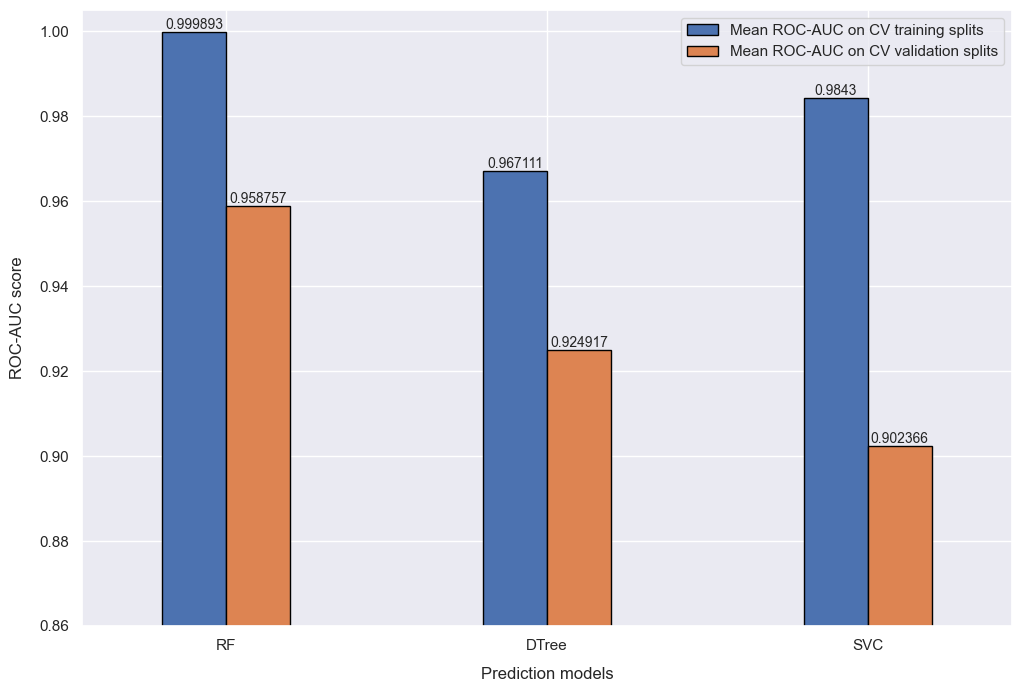

In [79]:
# For the top three models
ax = soil_pred_model_rocauc_compare[['Mean ROC-AUC on CV training splits', 'Mean ROC-AUC on CV validation splits']].iloc[:3,:].rename(
    index = soil_pred_model_rocauc_compare['Prediction model']).plot.bar(rot = 0, width = 0.4, figsize = (12, 8), edgecolor = 'black')

for container in ax.containers:
    ax.bar_label(container, fontsize = 10)

ax.set_xlabel("Prediction models", labelpad = 10)
ax.set_ylabel("ROC-AUC score", rotation = 90, labelpad = 10)
ax.set_ylim(0.86, 1.005)
plt.show()

#### 3. Comparing the ROC-AUC scores obtained from the validation split of each cross-validation run

Additionally, the performances of the eight models can also be compared on each specific validation split in cross-validation. As shown below, across all 10 cross-validation runs where each split was designated to be the validation split, the RF model stands out with the best ROC-AUC.

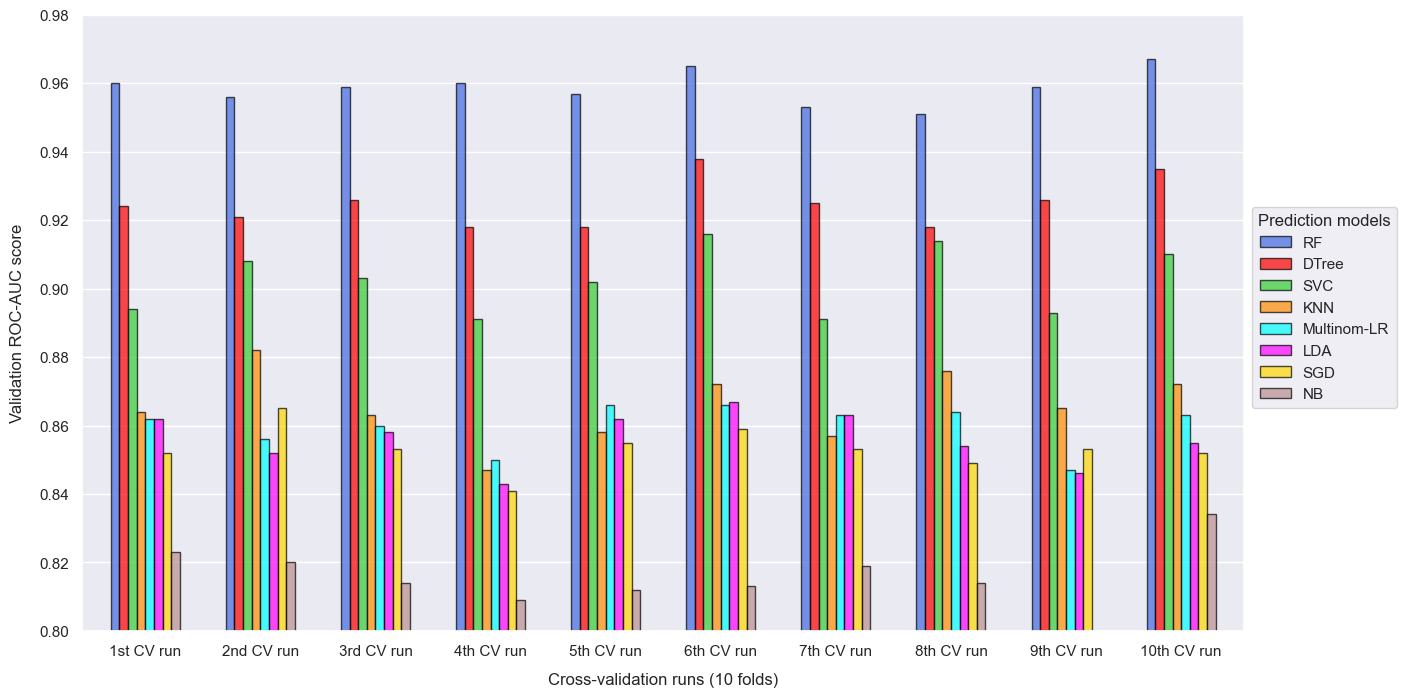

In [80]:
cv_run_order_list = []
for cv_run_index in range(soil_cv.get_n_splits()):
    cv_run_str = "1st" if cv_run_index == 0 else "2nd" if cv_run_index == 1 else "3rd" if cv_run_index == 2 else str(cv_run_index + 1) + "th"
    cv_run_order_list.append(cv_run_str)

soil_model_val_rocauc_cv = pd.DataFrame(data = list(soil_pred_model_rocauc_compare['Validation ROC-AUC in each CV run (10 splits)'].values),
                                        columns = [cv_run_order + " CV run" for cv_run_order in cv_run_order_list], 
                                        index = soil_pred_model_rocauc_compare['Prediction model'])

ax = soil_model_val_rocauc_cv.T.plot.bar(rot = 0, width = 0.6, figsize = (15, 8), alpha = 0.7, edgecolor = 'black',
                                         color = ["royalblue", 'red', 'limegreen', "darkorange", "aqua", 'magenta', 'gold', 'rosybrown'])

 
ax.set_xlabel("Cross-validation runs (10 folds)", labelpad = 10)
ax.set_ylabel("Validation ROC-AUC score", rotation = 90, labelpad = 10)
ax.set_ylim(0.8, 0.98)
ax.legend(title = "Prediction models", bbox_to_anchor = (1, 0.7))
ax.grid(visible = False, axis = 'x')
plt.show()

#### 4. Comparing the ROC curves for each forest type in the validation split of each cross-validation run

Looking even more closely, the comparison of the eight candidate models in each cross-validation run can even be inspected further for each class of the target variable (when one forest type becomes the positive class, the other two are merged to become the negative class). Below are a collection of class-wise ROC curve plots obtained from the validation splits of each cross-validation run, and they once again confirm that the RF model outperforms the others in all three forest types, and in all cross-validation run. Not only does the RF model out performs the other models in all three classes of 'forest_type' but it also maintains an excellent performances with all the ROC-AUC scores being greater than 0.9 in all cases (The validation ROC-AUC scores returned by the other models are all lower than 0.9 for the 'Mixed' forest type).

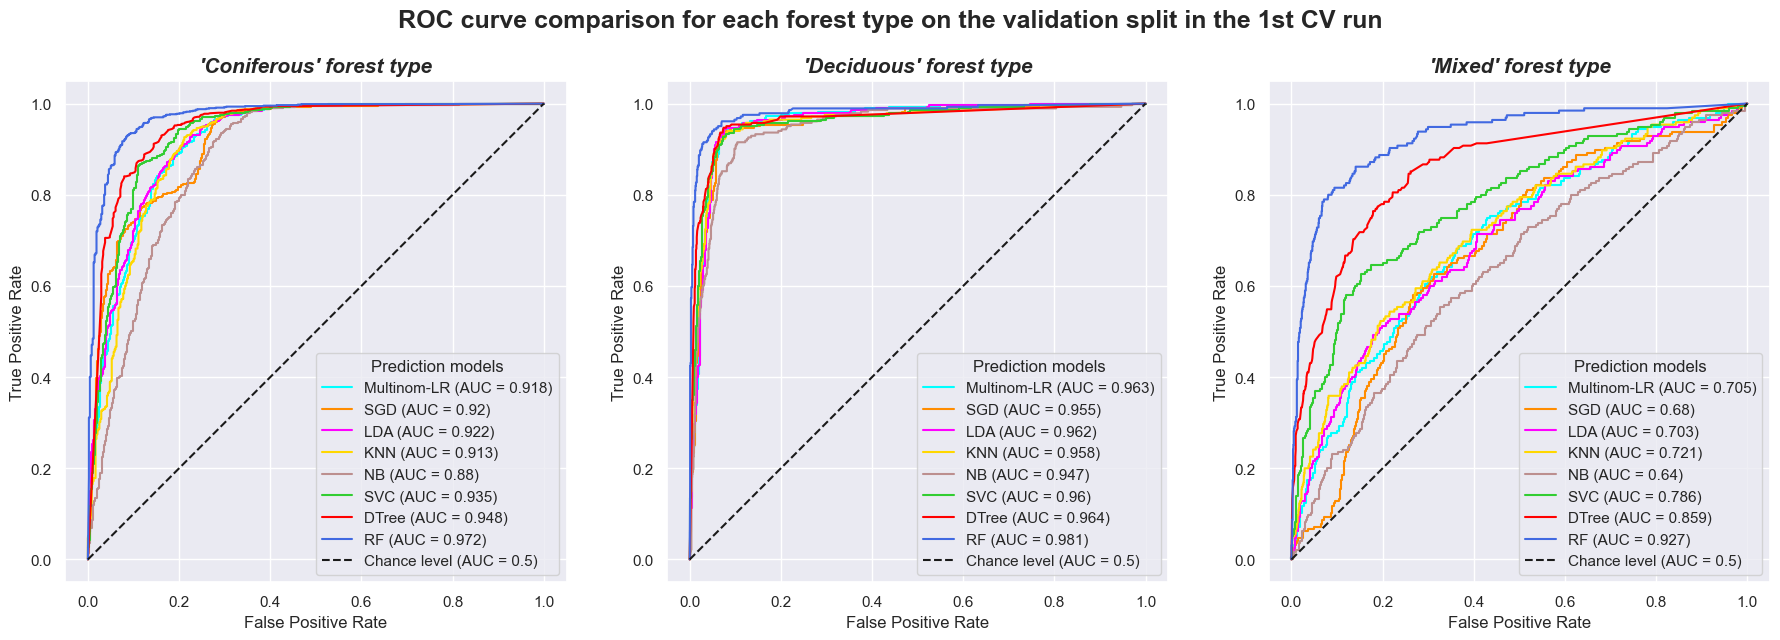

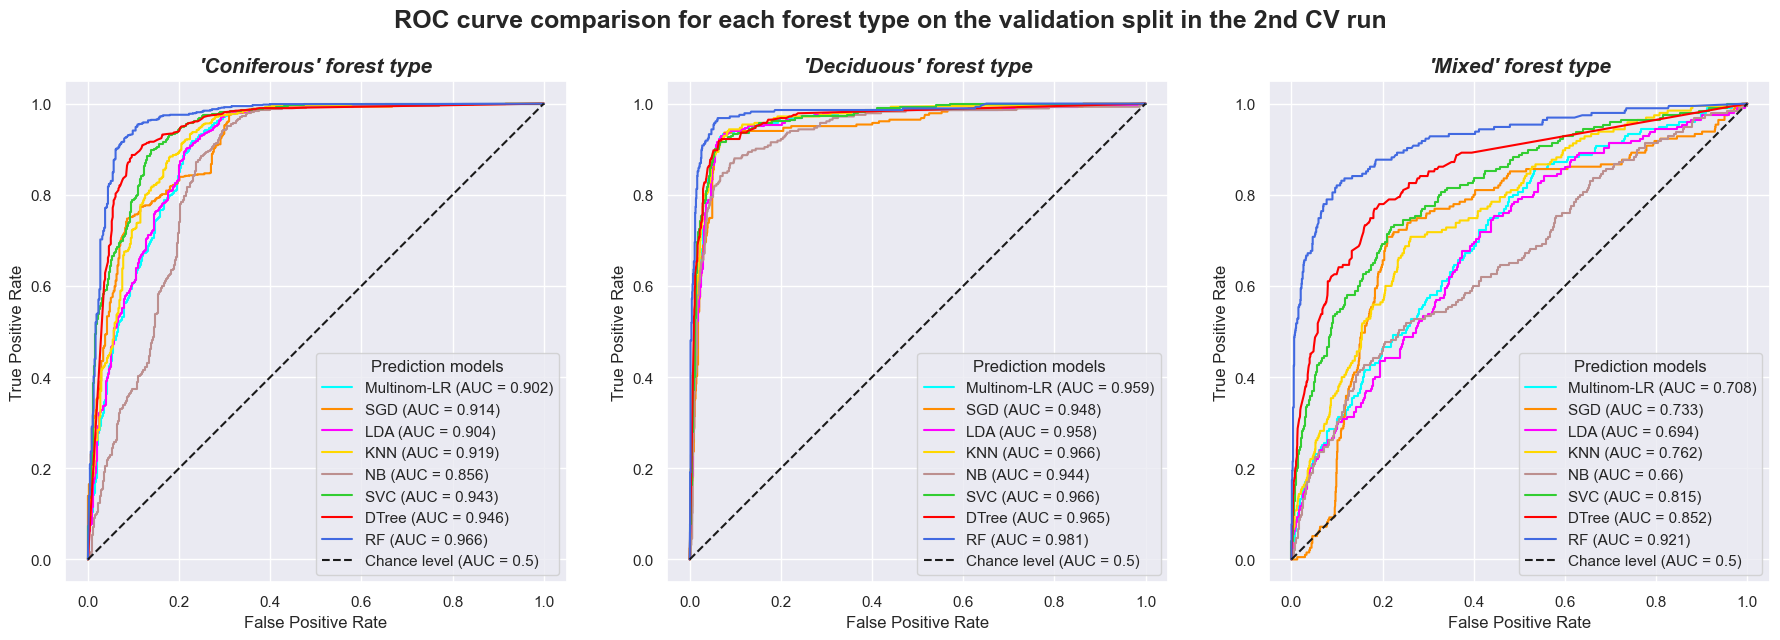

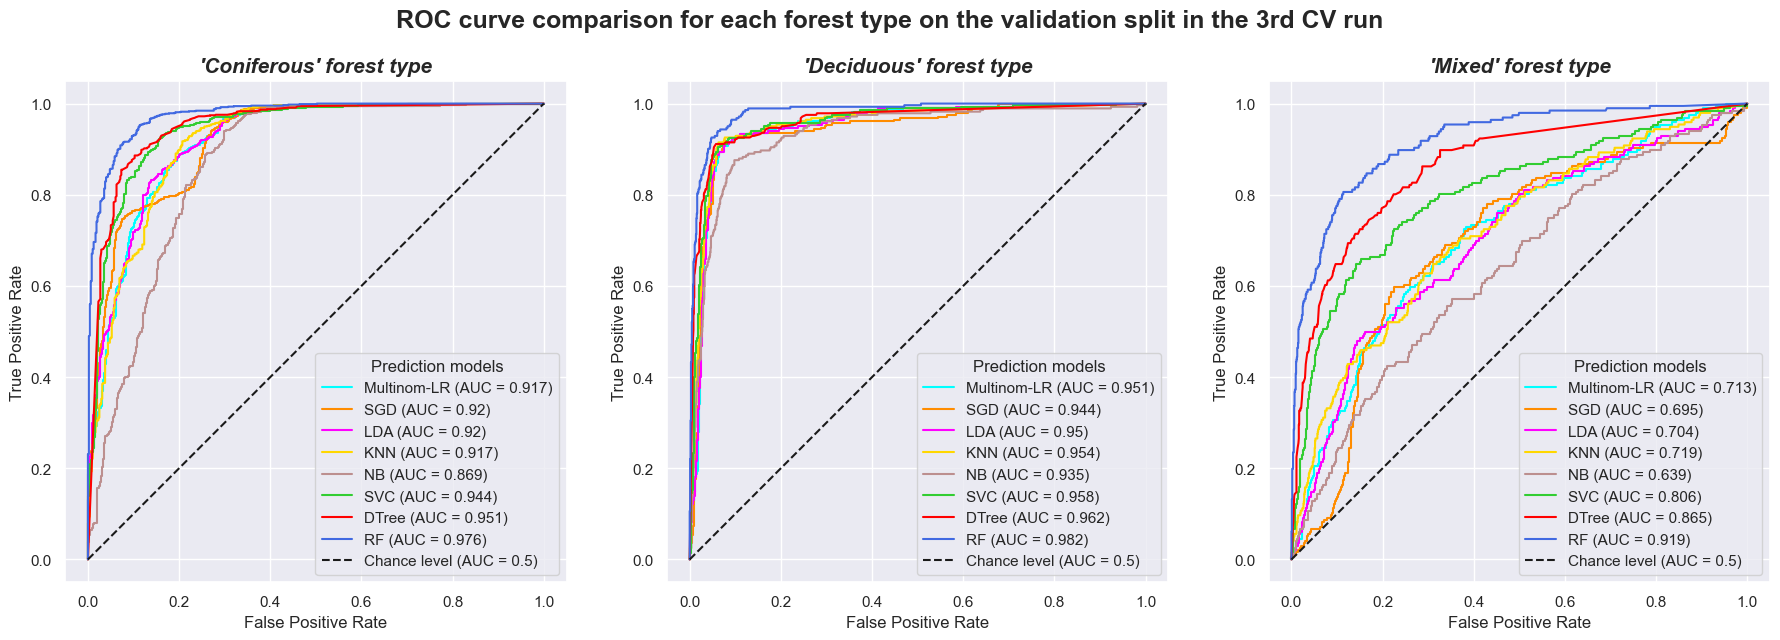

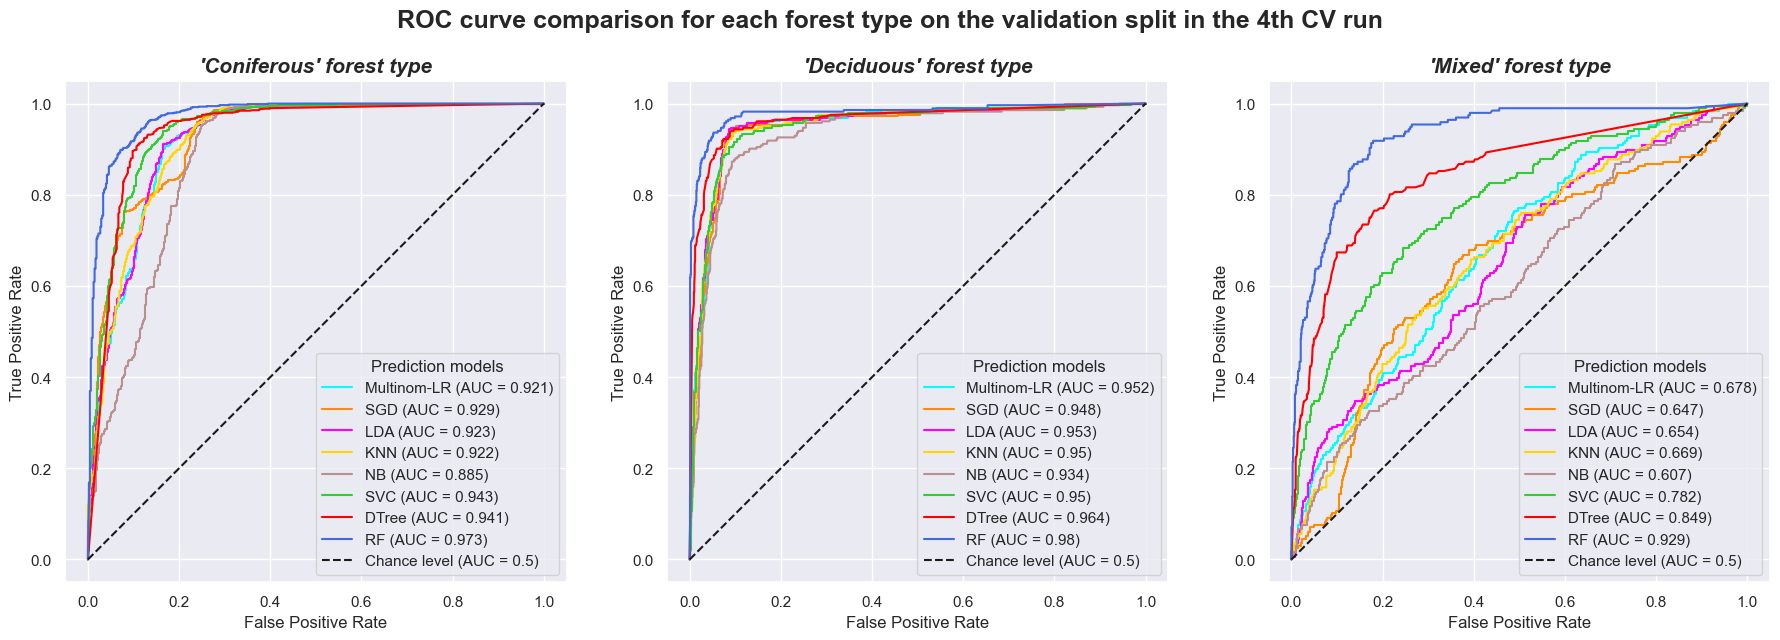

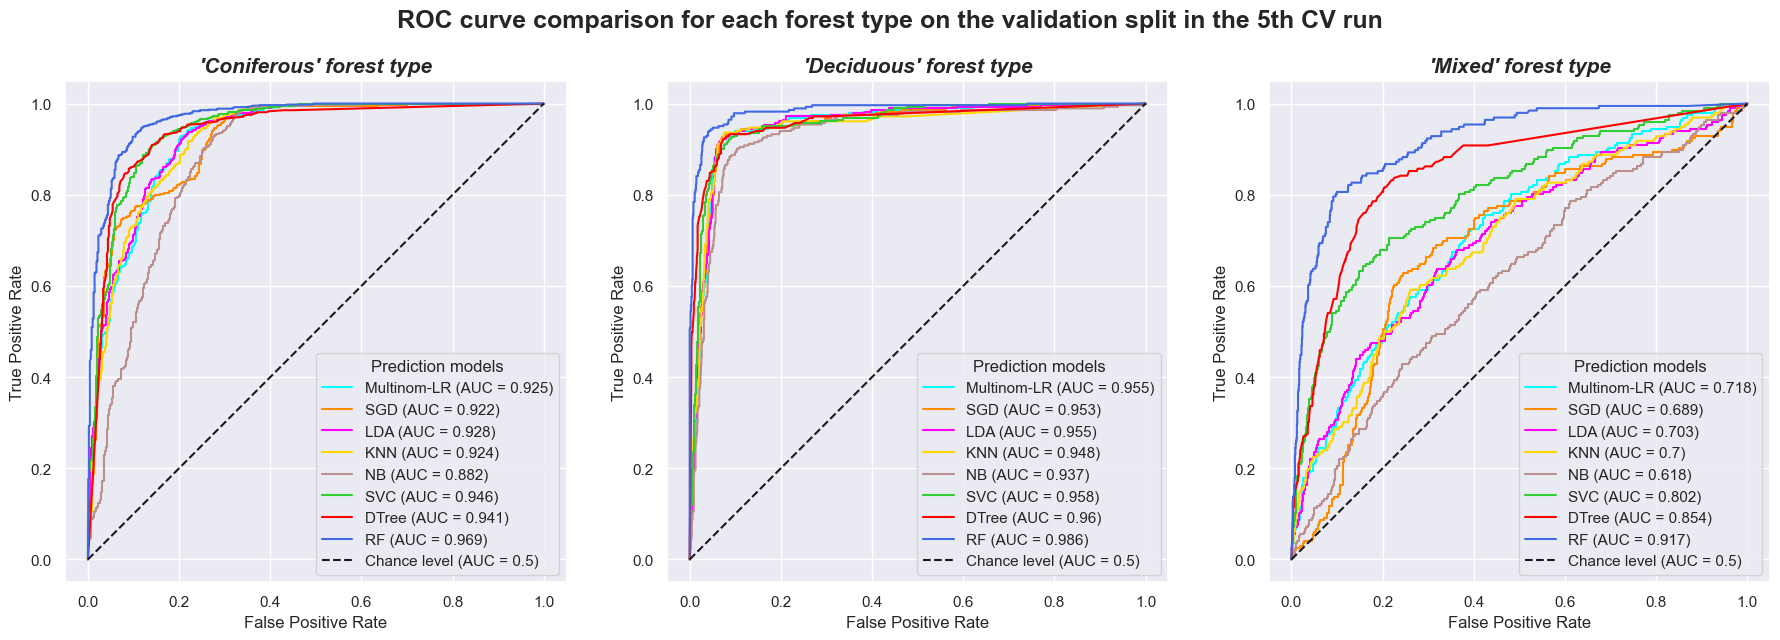

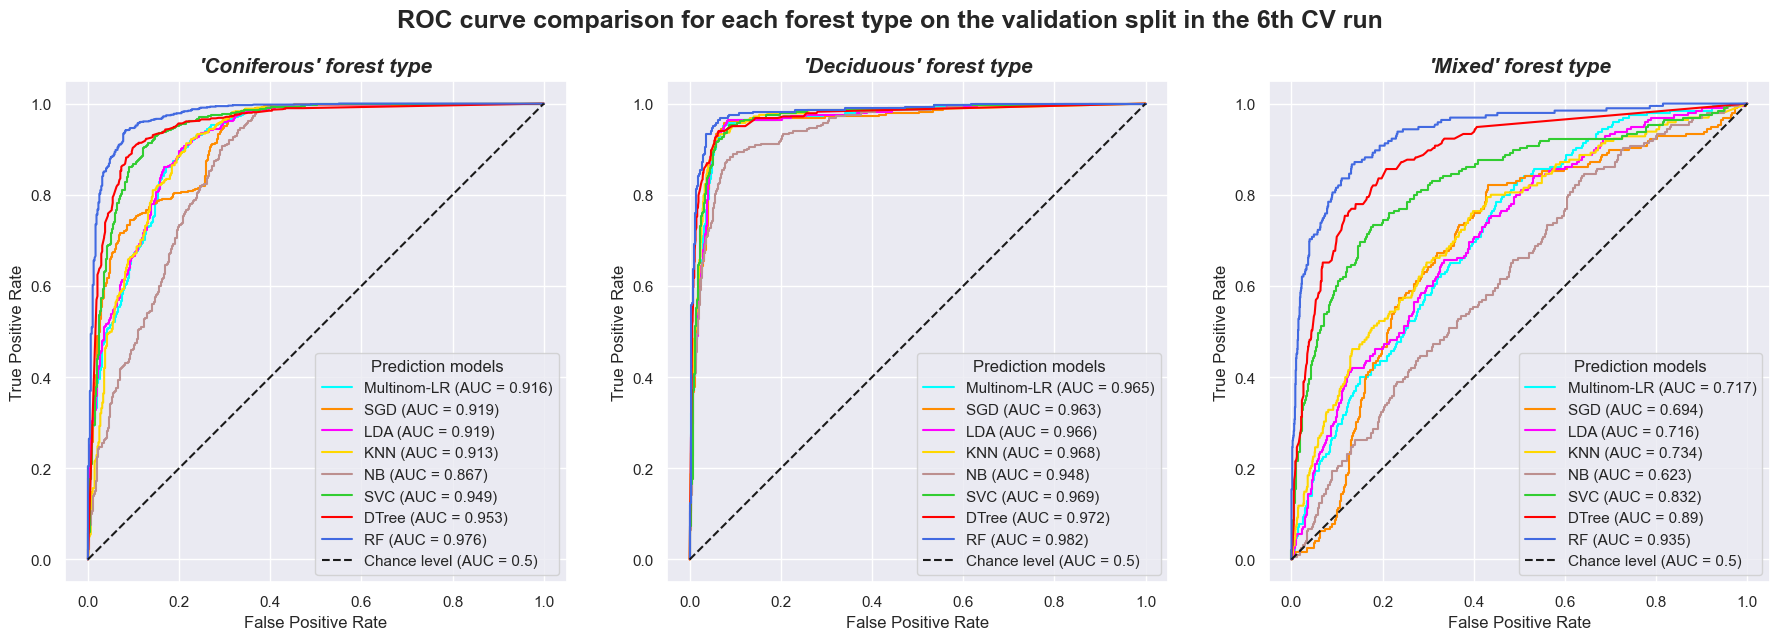

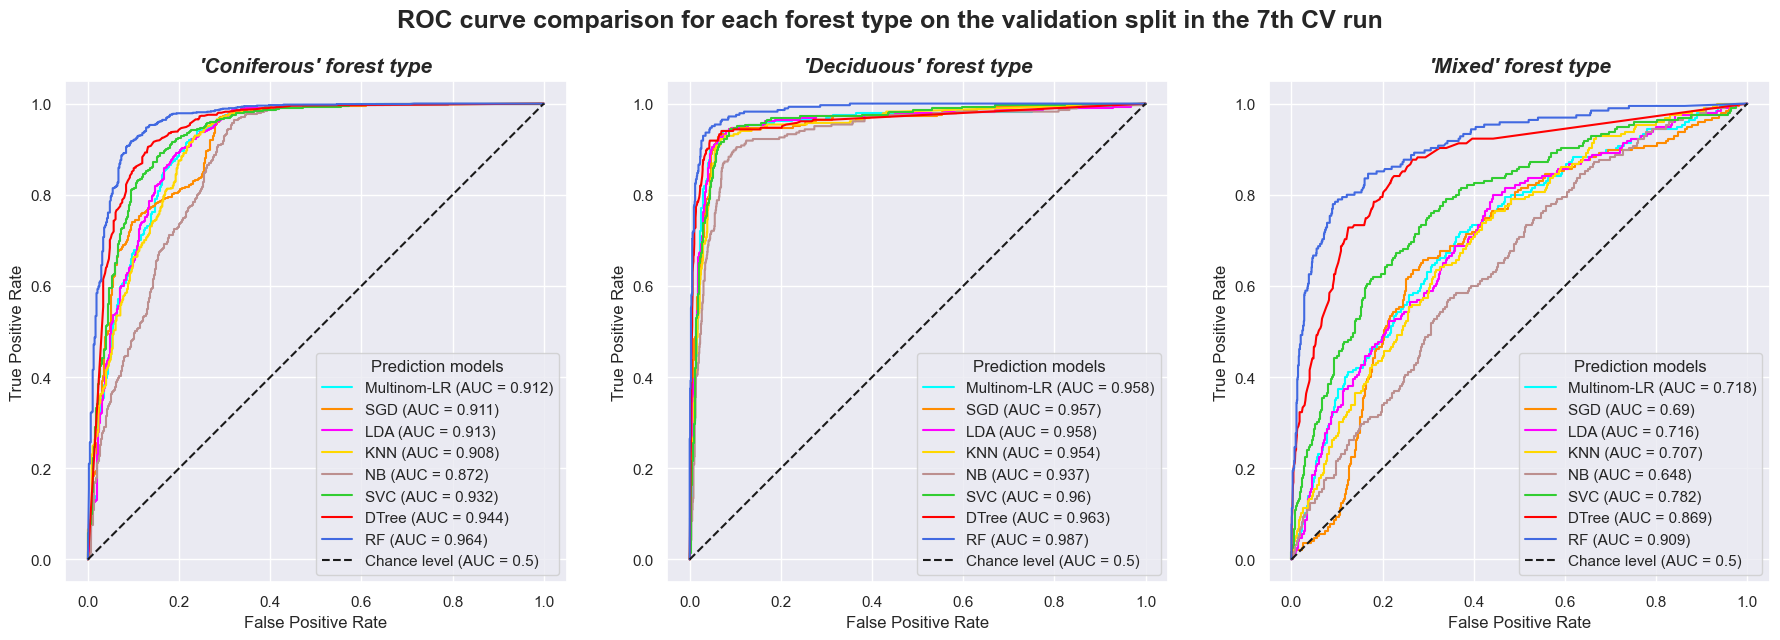

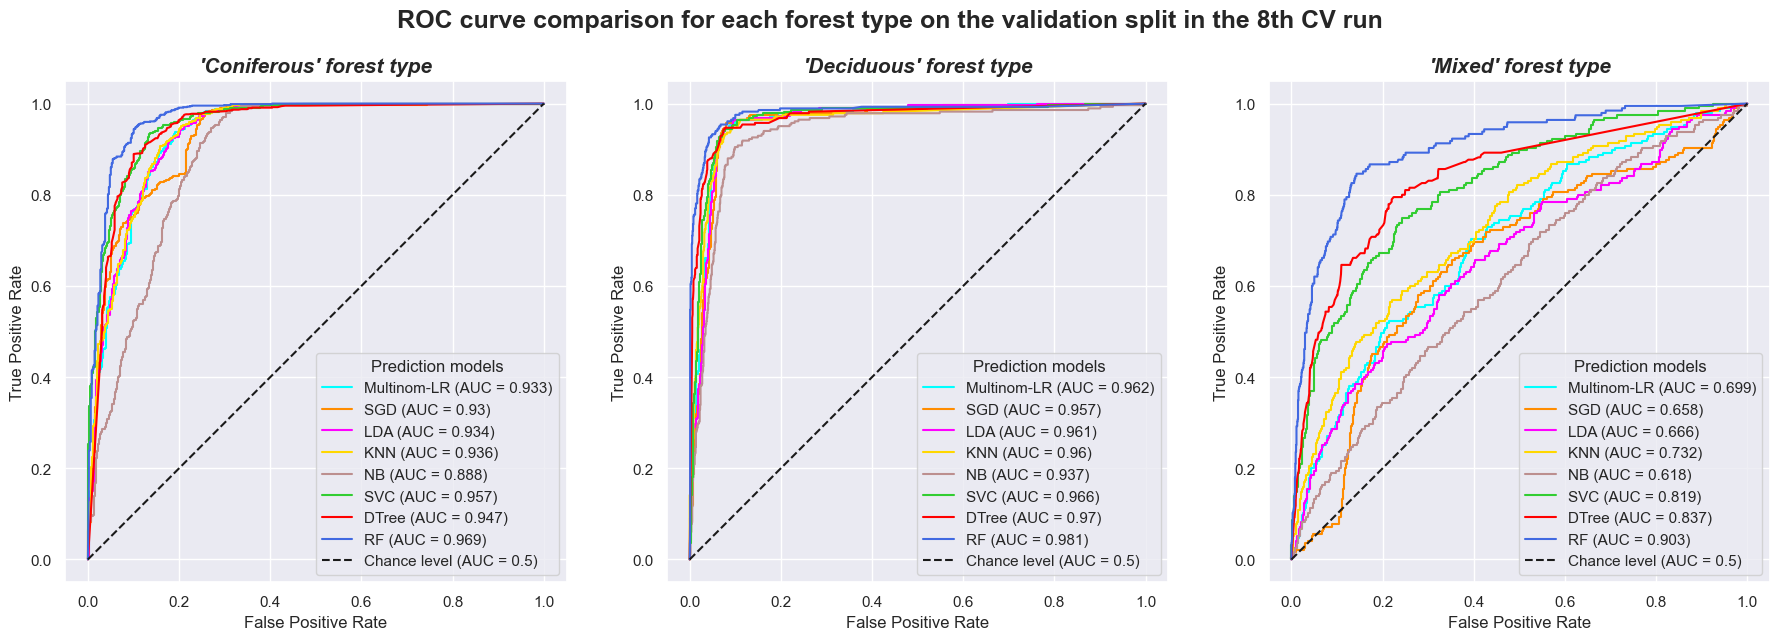

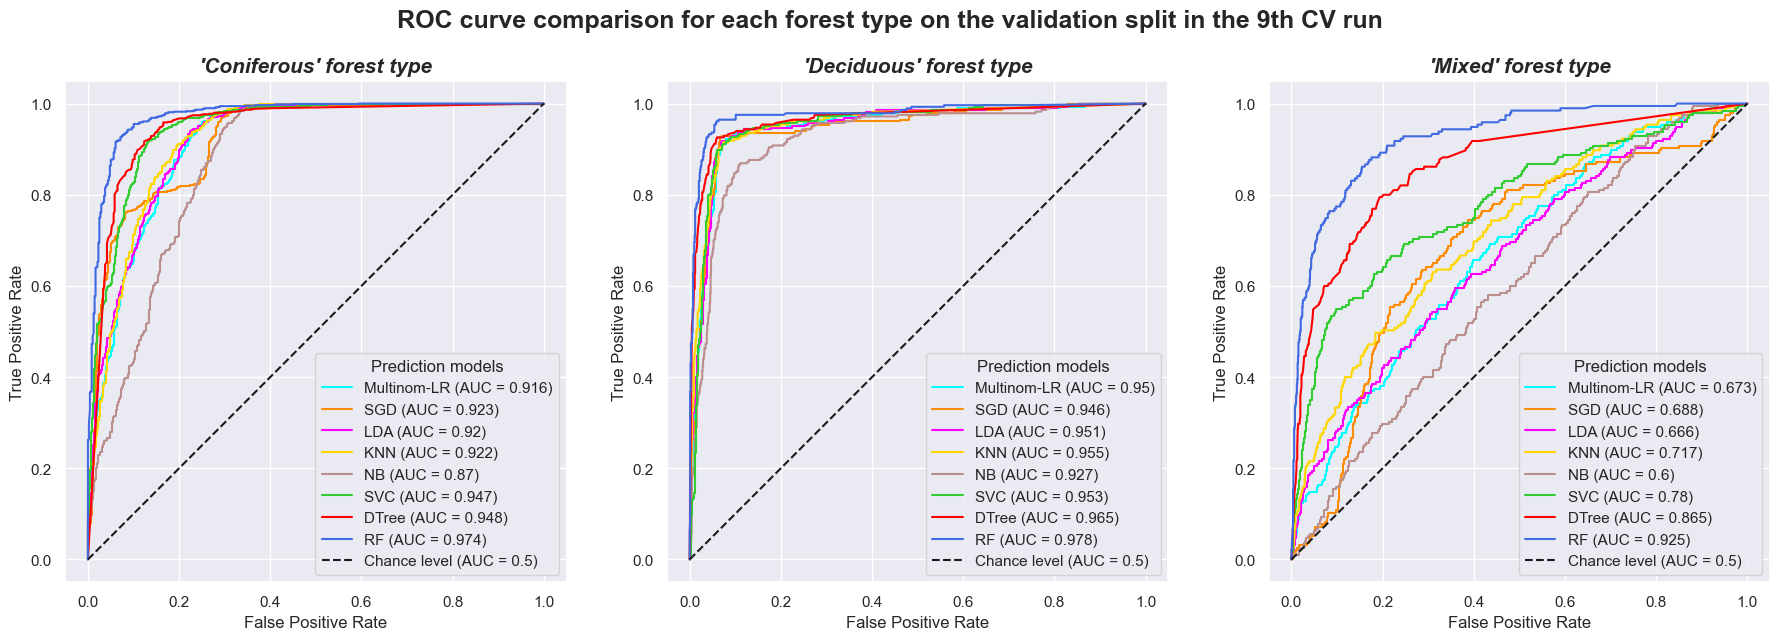

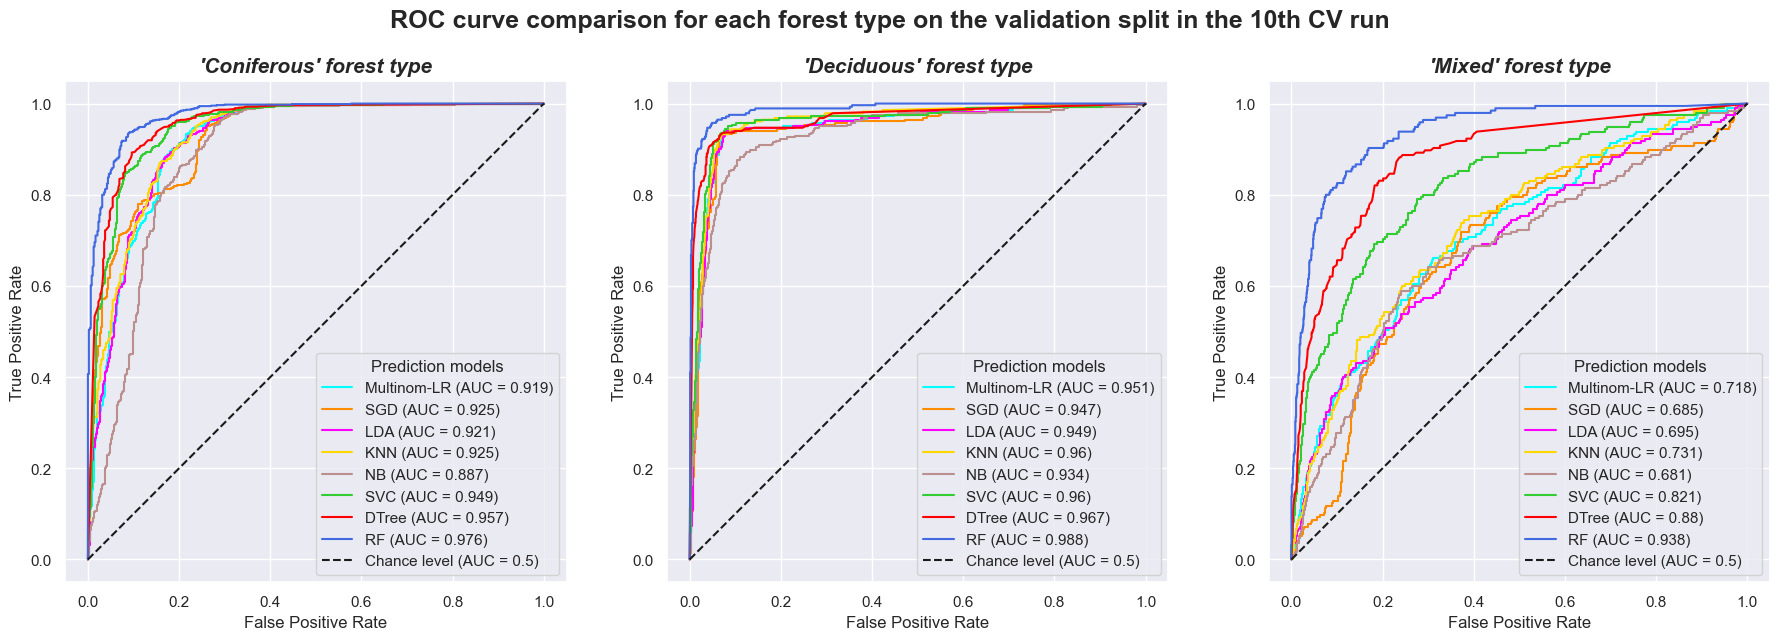

In [82]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

soil_label_binarizer = LabelBinarizer().fit(soil_y_train)

# Extracting the names of classes in the response variable
soil_y_classes = list(soil_label_binarizer.classes_)

soil_cv_splits = soil_cv.split(X = soil_X_train, y = soil_y_train)

for cv_run, (current_cv_fold_train_indexes, current_cv_fold_val_indexes) in enumerate(soil_cv_splits):
    current_cv_X_train_splits = soil_X_train.reset_index(drop = True).loc[current_cv_fold_train_indexes, :]
    current_cv_y_train_splits = soil_y_train.reset_index(drop = True)[current_cv_fold_train_indexes]
    current_cv_X_val_splits = soil_X_train.reset_index(drop = True).loc[current_cv_fold_val_indexes, :]
    current_cv_y_val_splits = soil_y_train.reset_index(drop = True)[current_cv_fold_val_indexes]
    current_cv_y_val_splits_onehot = soil_label_binarizer.transform(current_cv_y_val_splits)

    pred_probabilities_on_current_cv_val = {}
    for model_name in soil_pred_models.keys():
        fitted_pred_model_on_current_cv_train = deepcopy(soil_pred_models[model_name]).fit(
            X = current_cv_X_train_splits, 
            y = current_cv_y_train_splits)
        
        pred_probabilities_on_current_cv_val[model_name] = fitted_pred_model_on_current_cv_train.predict_proba(
            X = current_cv_X_val_splits)
        
    current_val_rocauc_each_class_each_model = {}
    for pred_model in list(soil_pred_models.keys()):
        current_val_rocauc_each_class_each_model[pred_model] = []

        for class_index in range(len(soil_y_classes)):
            fpr, tpr, thresholds = roc_curve(
                y_true = current_cv_y_val_splits,  
                y_score = pred_probabilities_on_current_cv_val[pred_model][:, class_index], 
                pos_label = soil_y_classes[class_index]) 

            class_rocauc = round(auc(fpr, tpr), 3)
            current_val_rocauc_each_class_each_model[pred_model].append(class_rocauc)

    fig, ax = plt.subplots(1, 3, figsize = (22, 15))
    fig.suptitle(t = "ROC curve comparison for each forest type on the validation split in the " + cv_run_order_list[cv_run] + " CV run", 
                 x = 0.5, y = 0.71, fontweight = 'bold', fontsize = 18)
                 
    for class_index in range(len(soil_y_classes)):
        line_colors = ["aqua", "darkorange", 'magenta', 'gold', 'rosybrown', 'limegreen', 'red', "royalblue"]

        for pred_model, color in zip(list(pred_probabilities_on_current_cv_val.keys()), line_colors):
            RocCurveDisplay.from_predictions(
                y_true = current_cv_y_val_splits_onehot[:, class_index],
                y_pred = pred_probabilities_on_current_cv_val[pred_model][:, class_index],
                label = pred_model + " (AUC = " + str(current_val_rocauc_each_class_each_model[pred_model][class_index]) + ")",
                color = color, ax = ax[class_index],
            )

        ax[class_index].plot([0, 1], [0, 1], "k--", label = "Chance level (AUC = 0.5)")
        ax[class_index].axis("square")
        ax[class_index].set_xlabel("False Positive Rate")
        ax[class_index].set_ylabel("True Positive Rate")
        ax[class_index].set_title(label = "'" + soil_y_classes[class_index] + "' forest type",
                                  fontdict = {'fontweight': "bold", 'fontstyle': "italic", 'fontsize': 15})
        ax[class_index].legend(title = 'Prediction models')

**Therefore, it can be concluded that among the eight models experimented, the RF model shows the best performance and it will be chosen to proceed to the final evaluation stage.**

## =======================

# H. Final evaluation on the chosen model

The RF model has been nominated as the best candidate, now it will undergo the final evaluation stage, where it will be experimented on the testing dataset to assess its performance on unseen data.

In [83]:
# Choosing the best-performing model and fitting it on the training data
soil_rf_fitted = soil_rf.fit(X = soil_X_train, y = soil_y_train)

In [84]:
from sklearn.metrics import confusion_matrix

soil_rf_test_cm = confusion_matrix(
    y_true = soil_y_test, 
    y_pred = soil_rf_fitted.predict(soil_X_test))
    
soil_rf_test_cm_df = pd.DataFrame(
    data = np.transpose(soil_rf_test_cm), 
    columns = pd.Index(soil_y_classes, name = 'Actuality'),
    index = pd.Index(soil_y_classes, name = 'Predictions'))

soil_rf_test_cm_df

Actuality    Coniferous  Deciduous  Mixed
Predictions                              
Coniferous         2143         24    120
Deciduous            25        652     76
Mixed                71         31    292

In [87]:
from sklearn.metrics import classification_report

# Generating a classification report
soil_rf_test_clf_report = classification_report(
    y_true = soil_y_test, 
    y_pred = soil_rf_fitted.predict(soil_X_test), 
    target_names = soil_y_classes,
    output_dict = True)

# Adding the ROC-AUC scores (macro avg, weighted avg, and for each class) to the classification report
soil_rf_test_rocauc_each_class = {}
for class_index in range(len(soil_y_classes)):
    soil_rf_y_test_pred_probabilities = soil_rf_fitted.predict_proba(soil_X_test)
    fpr, tpr, thresholds = roc_curve(
        soil_y_test,  
        soil_rf_y_test_pred_probabilities[:, class_index], 
        pos_label = soil_y_classes[class_index]) 
    soil_rf_test_rocauc_each_class[soil_y_classes[class_index]] = round(auc(fpr, tpr), 3)

for forest_type in soil_y_classes:
    soil_rf_test_clf_report[forest_type]['ROC-AUC (ovr)'] = soil_rf_test_rocauc_each_class[forest_type]

soil_rf_test_clf_report['macro avg']['ROC-AUC'] = np.array(list(soil_rf_test_rocauc_each_class.values())).mean()

soil_rf_test_clf_report['weighted avg']['ROC-AUC'] = np.average(
    a = list(soil_rf_test_rocauc_each_class.values()),
    weights = [soil_rf_test_clf_report[forest_type]['support'] for forest_type in soil_y_classes])

soil_rf_test_clf_report

{'Coniferous': {'precision': 0.9370354175776126,
  'recall': 0.9571237159446181,
  'f1-score': 0.9469730446310207,
  'support': 2239,
  'ROC-AUC (ovr)': 0.973},
 'Deciduous': {'precision': 0.8658698539176627,
  'recall': 0.9222065063649222,
  'f1-score': 0.8931506849315068,
  'support': 707,
  'ROC-AUC (ovr)': 0.983},
 'Mixed': {'precision': 0.7411167512690355,
  'recall': 0.5983606557377049,
  'f1-score': 0.6621315192743765,
  'support': 488,
  'ROC-AUC (ovr)': 0.917},
 'accuracy': 0.8989516598718695,
 'macro avg': {'precision': 0.8480073409214368,
  'recall': 0.8258969593490817,
  'f1-score': 0.8340850829456347,
  'support': 3434,
  'ROC-AUC': 0.9576666666666668},
 'weighted avg': {'precision': 0.8945420096957925,
  'recall': 0.8989516598718695,
  'f1-score': 0.8954136175251388,
  'support': 3434,
  'ROC-AUC': 0.9671007571345371}}

The overall accuracy, precision and recall all reach nearly 90%, but they do not tell the whole story. The scores for the 'Coniferous' and 'Deciduous' classes are impressive, but the scores for the 'Mixed' class are not quite good. Because the 'Mixed' class is outnumbered by the other two classes in the testing data, its low scores are not truely reflected in the overall scores. Hence, a closer look on the 'Mixed' class would be suitable for further improvements.

## =======================

# I. Feature importance

Both permutation-based and impurity-based feature importance scores are displayed and compared below. Because the categorical predictors were transformed to dummy variables during the model-fitting step, the impurity-based importance scores will be merged together for each categorical feature for a more straightforward comparison. It is clear that the feature 'veg_1' stands out as the most impactful feature, both permutation-wise and impurity-wise. Following that is the 'veg_3' and 'veg_6' features. These feature importance scores might be suggestive that the vegetation structures implemented on a forest section have a direct impact on its typologies.

In [88]:
soil_X_train_prepro_columns = list(soil_pipeline.fit_transform(soil_X_train, soil_y_train).columns)
soil_rf_feature_imp = pd.DataFrame([soil_X_train_prepro_columns, soil_rf_fitted['rf'].feature_importances_])
soil_rf_feature_imp = soil_rf_feature_imp.T.reset_index(drop = True)
soil_rf_feature_imp = soil_rf_feature_imp.rename(columns = {0: 'features', 1: 'impurity-based importance scores'})

# Merging all the dummy variables back to their original categorical feature in the dataset
soil_rf_feature_imp_final = deepcopy(soil_rf_feature_imp)

for categorical_feature in soil_rf_fitted['step_10'].categorical_predictors_list_: 
    # Getting the corresponding list of dummy variables for the current categorical feature
    corresponding_dummy_vars = [feature for feature in soil_rf_feature_imp['features'] 
                                if feature.startswith(categorical_feature + '_')]
    
    # Merging the impurity-based feature importance of the dummy variables 
    merged_feature_imp = soil_rf_feature_imp[soil_rf_feature_imp['features'].isin(
        corresponding_dummy_vars)].sum()['impurity-based importance scores']
    merged_feature_imp_df = pd.DataFrame.from_dict({'features': [categorical_feature],
                                                    'impurity-based importance scores': [merged_feature_imp]})

    # Deleting the dummy variables from the the feature-importance dataframe then adding the merged feature importance
    soil_rf_feature_imp_final = soil_rf_feature_imp_final[~soil_rf_feature_imp_final['features'].isin(corresponding_dummy_vars)]
    soil_rf_feature_imp_final = pd.concat([soil_rf_feature_imp_final, merged_feature_imp_df])

soil_rf_feature_imp_final.reset_index(inplace = True, drop = True)
soil_rf_feature_imp_final

features impurity-based importance scores
0             long                            0.026
1              lat                            0.028
2         altitude                            0.044
3            slope                            0.024
4           aspect                            0.023
5           ph_h2o                            0.017
6          ca_exch                            0.011
7           k_exch                            0.015
8             p_pa                            0.013
9           ca_tot                            0.014
10          mg_tot                            0.015
11           k_tot                            0.016
12           p_tot                            0.013
13              bs                            0.012
14           veg_1                            0.505
15           veg_3                            0.126
16           veg_5                            0.013
17           veg_6                            0.054
18           layer                            0.001
19             fvz                            0.008
20              es                            0.007
21             gsc                            0.009
22  ph_exch_method                            0.004

In [89]:
from sklearn.inspection import permutation_importance

soil_rf_per_imp_mean = permutation_importance(soil_rf_fitted, soil_X_test, soil_y_test, scoring = "roc_auc_ovr",
                                              n_repeats = 20, n_jobs = -1, random_state = 5409)['importances_mean']
soil_rf_per_imp = pd.DataFrame(data = {'features': list(soil_X_test.columns),
                                       'permutation-based importance scores': soil_rf_per_imp_mean})

soil_rf_per_imp = soil_rf_per_imp[soil_rf_per_imp['features'].isin(
    [feature for feature in soil_rf_fitted['step_10'].get_feature_names_out() 
     if not feature.startswith(tuple(soil_rf_fitted['step_10'].categorical_predictors_list_))] + 
    soil_rf_fitted['step_10'].categorical_predictors_list_)]

soil_rf_per_imp.reset_index(inplace = True, drop = True)
soil_rf_per_imp

features  permutation-based importance scores
0            layer                               -0.000
1             long                                0.015
2              lat                                0.017
3         altitude                                0.023
4            slope                                0.007
5           aspect                                0.008
6              fvz                                0.003
7               es                                0.004
8              gsc                                0.004
9           ph_h2o                                0.003
10  ph_exch_method                                0.001
11         ca_exch                                0.001
12          k_exch                                0.002
13            p_pa                                0.001
14          ca_tot                                0.000
15          mg_tot                                0.002
16           k_tot                                0.001
17           p_tot                                0.002
18              bs                                0.001
19           veg_1                                0.314
20           veg_3                                0.040
21           veg_5                                0.006
22           veg_6                                0.029

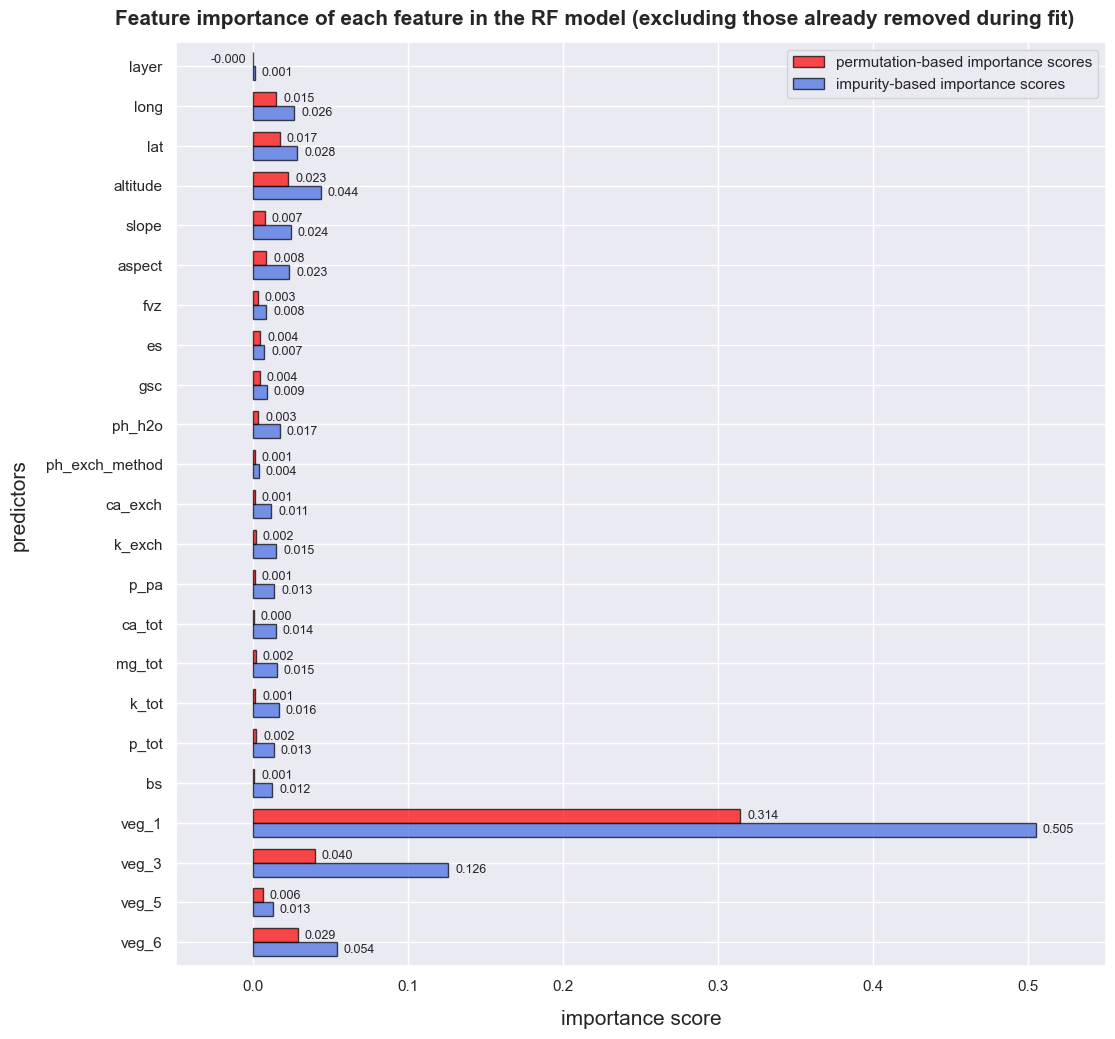

In [90]:
both_feature_importance_df = pd.merge(soil_rf_per_imp, soil_rf_feature_imp_final, on = "features", how = "inner")

ax = both_feature_importance_df.plot.barh(x = 'features', figsize = (12, 12), width = 0.7, alpha = 0.7,
                                          edgecolor = 'black', color = ["red", "royalblue"])

for container in ax.containers:
    ax.bar_label(container, fontsize = 9, padding = 5, fmt = "%.3f")

ax.invert_yaxis()
ax.set_xlabel(xlabel = 'importance score', fontdict = {'size': 15}, labelpad = 12)
ax.set_ylabel(ylabel = 'predictors', fontdict = {'size': 15}, labelpad = 12)
ax.set_xlim(-0.05, 0.55)
ax.set_title(label = "Feature importance of each feature in the RF model (excluding those already removed during fit)",
             fontdict = {'size': 15, 'weight': 'bold'}, x = 0.45, y = 1.01)
plt.show()

# =============

# References

*(Harvard referencing style)*

Ben-Shachar, MS, Patil, I, Thériault, R, Wiernik, BM & Lüdecke, D 2023, ‘Phi, Fei, Fo, Fum: Effect Sizes for Categorical Data That Use the Chi-Squared Statistic’, *Mathematics*, vol. 11, no. 9, article 1982.

Boehmke, B & Greenwell, BM 2019, *Hands-on machine learning with R*, 1st edn, Chapman and Hall/CRC, Boca Raton, Florida.

Castelli, M, Vanneschi L & Largo, ÁR 2019, ‘Supervised Learning: Classification’, in S Ranganathan, M Gribskov, K, Nakai, C Schönbach & M Cannataro (eds), *Encyclopedia of bioinformatics and computational biology*, vol. 1, *Methods*, Elsevier, Amsterdam, Netherlands.

Chawla, NV, Bowyer, KW, Hall, LO & Kegelmeyer, WP 2011, ‘SMOTE: Synthetic minority over-sampling technique’, *The Journal of Artificial Intelligence Research*, vol. 16, pp. 321-357.

Géron, A 2022, *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: concepts, tools, and techniques to build intelligent systems*, 3rd edn, O'Reilly Media, Sebastopol, California.

Hellebrandová, KN 2023, *Aggregated database of forest soil chemical properties in the Czech Republic based on surveys from 2000-2020*, DOI: 10.5281/zenodo.7852428.

Kaur, H, Pannu, H & Malhi, A 2019, ‘A systematic review on imbalanced data challenges in machine learning: Applications and solutions’, *ACM Computing Surveys*, vol. 52, no. 4, article 79.

Komprdová, K, Vašát, R, Hellebrandová, KN, Šrámek, V, Borůvka, L, Sáňka, M, Sáňka, O, Fadrhonsová, V & Čechmánková, J 2021, *Chemické vlastnosti svrchních minerálních vrstev lesních půd a ohrožení lesních půd acidifikací a nutriční degradací (Chemical properties of the upper mineral layers of forest soils and threats to forest soils by acidification and nutritional degradation)*, Výzkumný ústav lesního hospodářství a myslivosti, Jíloviště, The Czech Republic.

Koivu, A, Sairanen, M, Airola, A & Pahikkala, T 2020, ‘Synthetic minority oversampling of vital statistics data with generative adversarial networks’, *Journal of the American Medical Informatics Association*, vol. 27, no. 11, pp. 1667-1674.

Kuhn, M & Silge, J 2022, *Tidy modeling with R: A framework for modeling in the Tidyverse*, O’Reilly Media, Sebastopol, California.

Lee, DK 2016, ‘Alternatives to P value: confidence interval and effect size’, *Korean Journal of Anesthesiology*, vol. 69, no. 6, pp. 555-562.

Li, J, Cheng, K, Wang, S, Morstatter, F, Trevino, R, Tang, J & Liu, H 2018, ‘Feature selection: A data perspective’, *ACM Computing Surveys*, vol. 50, no. 6, pp. 1-45.

Liu, Z, Zhang, H, Ge, M, Hao, X, An, X & Tian, Y 2022, ‘Radiomics signature for the prediction of progression-free survival and radiotherapeutic benefits in pediatric medulloblastoma’, *Child’s Nervous System*, vol. 38, no. 6, pp. 1085-1094.

Macků, J 2001, Analýzy strukturovaných porostních typů, in O Lasák, J Kozel, A Pecháčková & V Krulišová (eds), *Lesnická práce: časopis vydávaný Čs.maticí lesnickou a věnovaný lesnické vědě a praxi (Forestry work: a magazine published by the Czech forestry register and dedicated to forestry science and practice)*, Lesnická práce, Kostelec nad Černými lesy, Czech Republic, vol. 80, no. 2, pp. 69-71.

Mukaka, MM 2012, ‘Statistics corner: A guide to appropriate use of correlation coefficient in medical research’, *Malawi Medical Journal*, vol. 24, no. 3, pp. 69-71.

Nahm, FS 2022, 'Receiver operating characteristic curve: overview and practical use for clinicians', *Korean Journal of Anesthesiology*, vol. 75, no. 1, pp. 25-36.

Pradhan, P & Setyawan, AD 2021, ‘Filtering multi-collinear predictor variables from multi-resolution rasters of WorldClim 2.1 for ecological niche modeling in Indonesian context’, *Asian Journal of Forestry*, vol 5, no. 2, pp. 111-122.

Roccetti, M, Delnevo, G, Casini, L & Mirri, S 2021, ‘An alternative approach to dimension reduction for pareto distributed data: a case study’, Journal of Big Data, vol. 8, no. 1, article 39.

Schober, P, Boer, C & Schwarte, LA 2018, ‘Correlation Coefficients: Appropriate Use and Interpretation’, *Anesthesia and Analgesia*, vol. 126, no. 5, pp. 1763-1768.

Šrámek, V, Fadrhonsová, V, Hellebrandová, KN, Čechmánková, J, Borůvka, L, Sáňka, M & Novotný, R 2020, *Kontrola kvality dat v rozsáhlých databázích chemických vlastností lesních půd (Data quality control in extensive databases of chemical properties of forest soils)*, Výzkumný ústav lesního hospodářství a myslivosti, Jíloviště, The Czech Republic.
